#  How to use 🐼 pandas filter 🎨 in survey EDA 📊

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from IPython.display import set_matplotlib_formats
set_matplotlib_formats("retina")

plt.style.use("seaborn-whitegrid")

In [2]:
raw = pd.read_csv("kaggle_survey_2020_responses.csv", low_memory=False)
# raw = pd.read_csv(r"../input/kaggle-survey-2020/kaggle_survey_2020_responses.csv")
raw.shape

(20037, 355)

In [3]:
raw.head()

Time from Start to Finish (seconds)                           Q1  \
0               Duration (in seconds)  What is your age (# years)?   
1                                1838                        35-39   
2                              289287                        30-34   
3                                 860                        35-39   
4                                 507                        30-34   

                                       Q2  \
0  What is your gender? - Selected Choice   
1                                     Man   
2                                     Man   
3                                     Man   
4                                     Man   

                                          Q3  \
0  In which country do you currently reside?   
1                                   Colombia   
2                   United States of America   
3                                  Argentina   
4                   United States of America   

                                                  Q4  \
0  What is the highest level of formal education ...   
1                                    Doctoral degree   
2                                    Master’s degree   
3                                  Bachelor’s degree   
4                                    Master’s degree   

                                                  Q5  \
0  Select the title most similar to your current ...   
1                                            Student   
2                                      Data Engineer   
3                                  Software Engineer   
4                                     Data Scientist   

                                                  Q6  \
0  For how many years have you been writing code ...   
1                                         5-10 years   
2                                         5-10 years   
3                                        10-20 years   
4                                         5-10 years   

                                           Q7_Part_1  \
0  What programming languages do you use on a reg...   
1                                             Python   
2                                             Python   
3                                                NaN   
4                                             Python   

                                           Q7_Part_2  \
0  What programming languages do you use on a reg...   
1                                                  R   
2                                                  R   
3                                                NaN   
4                                                NaN   

                                           Q7_Part_3  ...  \
0  What programming languages do you use on a reg...  ...   
1                                                SQL  ...   
2                                                SQL  ...   
3                                                NaN  ...   
4                                                SQL  ...   

                                        Q35_B_Part_2  \
0  In the next 2 years, do you hope to become mor...   
1                                                NaN   
2                                                NaN   
3                                                NaN   
4                                                NaN   

                                        Q35_B_Part_3  \
0  In the next 2 years, do you hope to become mor...   
1                                                NaN   
2                                                NaN   
3                                                NaN   
4                                                NaN   

                                        Q35_B_Part_4  \
0  In the next 2 years, do you hope to become mor...   
1                                                NaN   
2                                                NaN   
3                                                NaN   
4              

In [4]:
question = raw.iloc[0]
question

Time from Start to Finish (seconds)                                Duration (in seconds)
Q1                                                           What is your age (# years)?
Q2                                                What is your gender? - Selected Choice
Q3                                             In which country do you currently reside?
Q4                                     What is the highest level of formal education ...
                                                             ...                        
Q35_B_Part_7                           In the next 2 years, do you hope to become mor...
Q35_B_Part_8                           In the next 2 years, do you hope to become mor...
Q35_B_Part_9                           In the next 2 years, do you hope to become mor...
Q35_B_Part_10                          In the next 2 years, do you hope to become mor...
Q35_B_OTHER                            In the next 2 years, do you hope to become mor...
Name: 0, Length: 355,

In [5]:
answer = raw.drop([0])
answer

Time from Start to Finish (seconds)     Q1     Q2  \
1                                    1838  35-39    Man   
2                                  289287  30-34    Man   
3                                     860  35-39    Man   
4                                     507  30-34    Man   
5                                      78  30-34    Man   
...                                   ...    ...    ...   
20032                                 126  18-21    Man   
20033                                 566  55-59  Woman   
20034                                 238  30-34    Man   
20035                                 625  22-24    Man   
20036                                1031  22-24    Man   

                                                      Q3  \
1                                               Colombia   
2                               United States of America   
3                                              Argentina   
4                               United States of America   
5                                                  Japan   
...                                                  ...   
20032                                             Turkey   
20033  United Kingdom of Great Britain and Northern I...   
20034                                             Brazil   
20035                                              India   
20036                                           Pakistan   

                                                      Q4  \
1                                        Doctoral degree   
2                                        Master’s degree   
3                                      Bachelor’s degree   
4                                        Master’s degree   
5                                        Master’s degree   
...                                                  ...   
20032  Some college/university study without earning ...   
20033                                    Master’s degree   
20034                                    Master’s degree   
20035                                  Bachelor’s degree   
20036                                    Master’s degree   

                              Q5           Q6 Q7_Part_1 Q7_Part_2 Q7_Part_3  \
1                        Student   5-10 years    Python         R       SQL   
2                  Data Engineer   5-10 years    Python         R       SQL   
3              Software Engineer  10-20 years       NaN       NaN       NaN   
4                 Data Scientist   5-10 years    Python       NaN       SQL   
5              Software Engineer    3-5 years    Python       NaN       NaN   
...                          ...          ...       ...       ...       ...   
20032                        NaN          NaN       NaN       NaN       NaN   
20033     Currently not employed    20+ years    Python       NaN       NaN   
20034         Research Scientist    < 1 years    Python       NaN       NaN   
20035          Software Engineer    3-5 years    Python       NaN       SQL   
20036  Machine Learning Engineer    < 1 years    Python       NaN       NaN   

       ...        Q35_B_Part_2 Q35_B_Part_3 Q35_B_Part_4   Q35_B_Part_5  \
1      ...                 NaN          NaN          NaN   TensorBoard    
2      ...                 NaN          NaN          NaN            NaN   
3      ...                 NaN          NaN          NaN            NaN   
4      ...                 NaN          NaN          NaN            NaN   
5      ...                 NaN          NaN          NaN            NaN   
...    ...                 ...          ...          ...            ...   
20032  ...                 NaN          NaN          NaN            NaN   
20033  ...                 NaN          NaN          NaN            NaN   
20034  ...                 NaN          NaN          NaN            NaN   
20035  ...   Weights & Biases           NaN          NaN   TensorBoard    
20036  ...   Weights & Biases           NaN          NaN            NaN   

     

In [6]:
answer.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20036 entries, 1 to 20036
Columns: 355 entries, Time from Start to Finish (seconds) to Q35_B_OTHER
dtypes: object(355)
memory usage: 54.4+ MB


## Q1 What is your age (# years)?

In [7]:
Q1 = answer['Q1'].value_counts().sort_index()
Q1

18-21    3469
22-24    3786
25-29    4011
30-34    2811
35-39    1991
40-44    1397
45-49     988
50-54     698
55-59     411
60-69     398
70+        76
Name: Q1, dtype: int64

Text(0.5, 1.0, 'What is your age (# years)?')

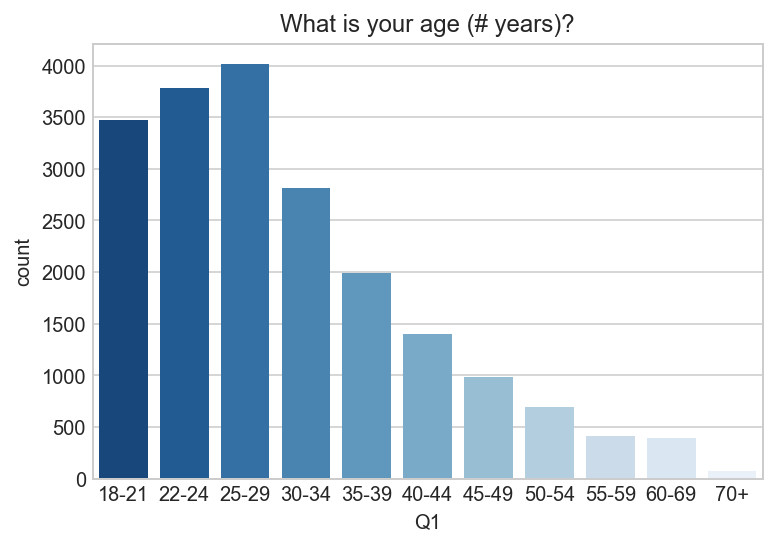

In [8]:
sns.countplot(data=answer.sort_values("Q1"), x="Q1", palette="Blues_r").set_title(question["Q1"])

## Q2 What is your gender? - Selected Choice

In [9]:
question_no = "Q2"
question[question_no]

'What is your gender? - Selected Choice'

In [10]:
Q1 = answer['Q2'].value_counts().sort_index()
Q1

Man                        15789
Nonbinary                     52
Prefer not to say            263
Prefer to self-describe       54
Woman                       3878
Name: Q2, dtype: int64

Text(0.5, 1.0, 'What is your gender? - Selected Choice')

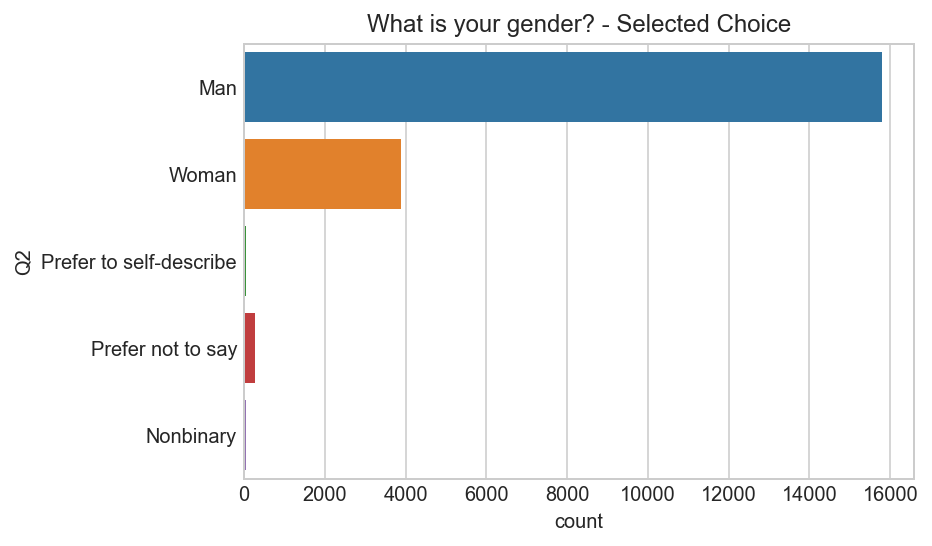

In [11]:
question_no = "Q2"
sns.countplot(data=answer, 
              y=question_no).set_title(question[question_no])

## Q3 In which country do you currently reside?

In [12]:
question_no = "Q3"
question[question_no]

'In which country do you currently reside?'

### 📊define show_countplot_by_qno

In [13]:
def show_countplot_by_qno(qno, fsize=(10, 6), order=None):
    """
    qno : question_no, ex) Q12
    fsize : figsize default (10, 6)
    order : optional order list, default value_counts().index
    """
    if not order :
        order = answer[qno].value_counts().index
        
    plt.figure(figsize=fsize)
    sns.countplot(data=answer, 
                  y=qno,
                  order=order,
                  palette="Blues_r"
                 ).set_title(question[qno])

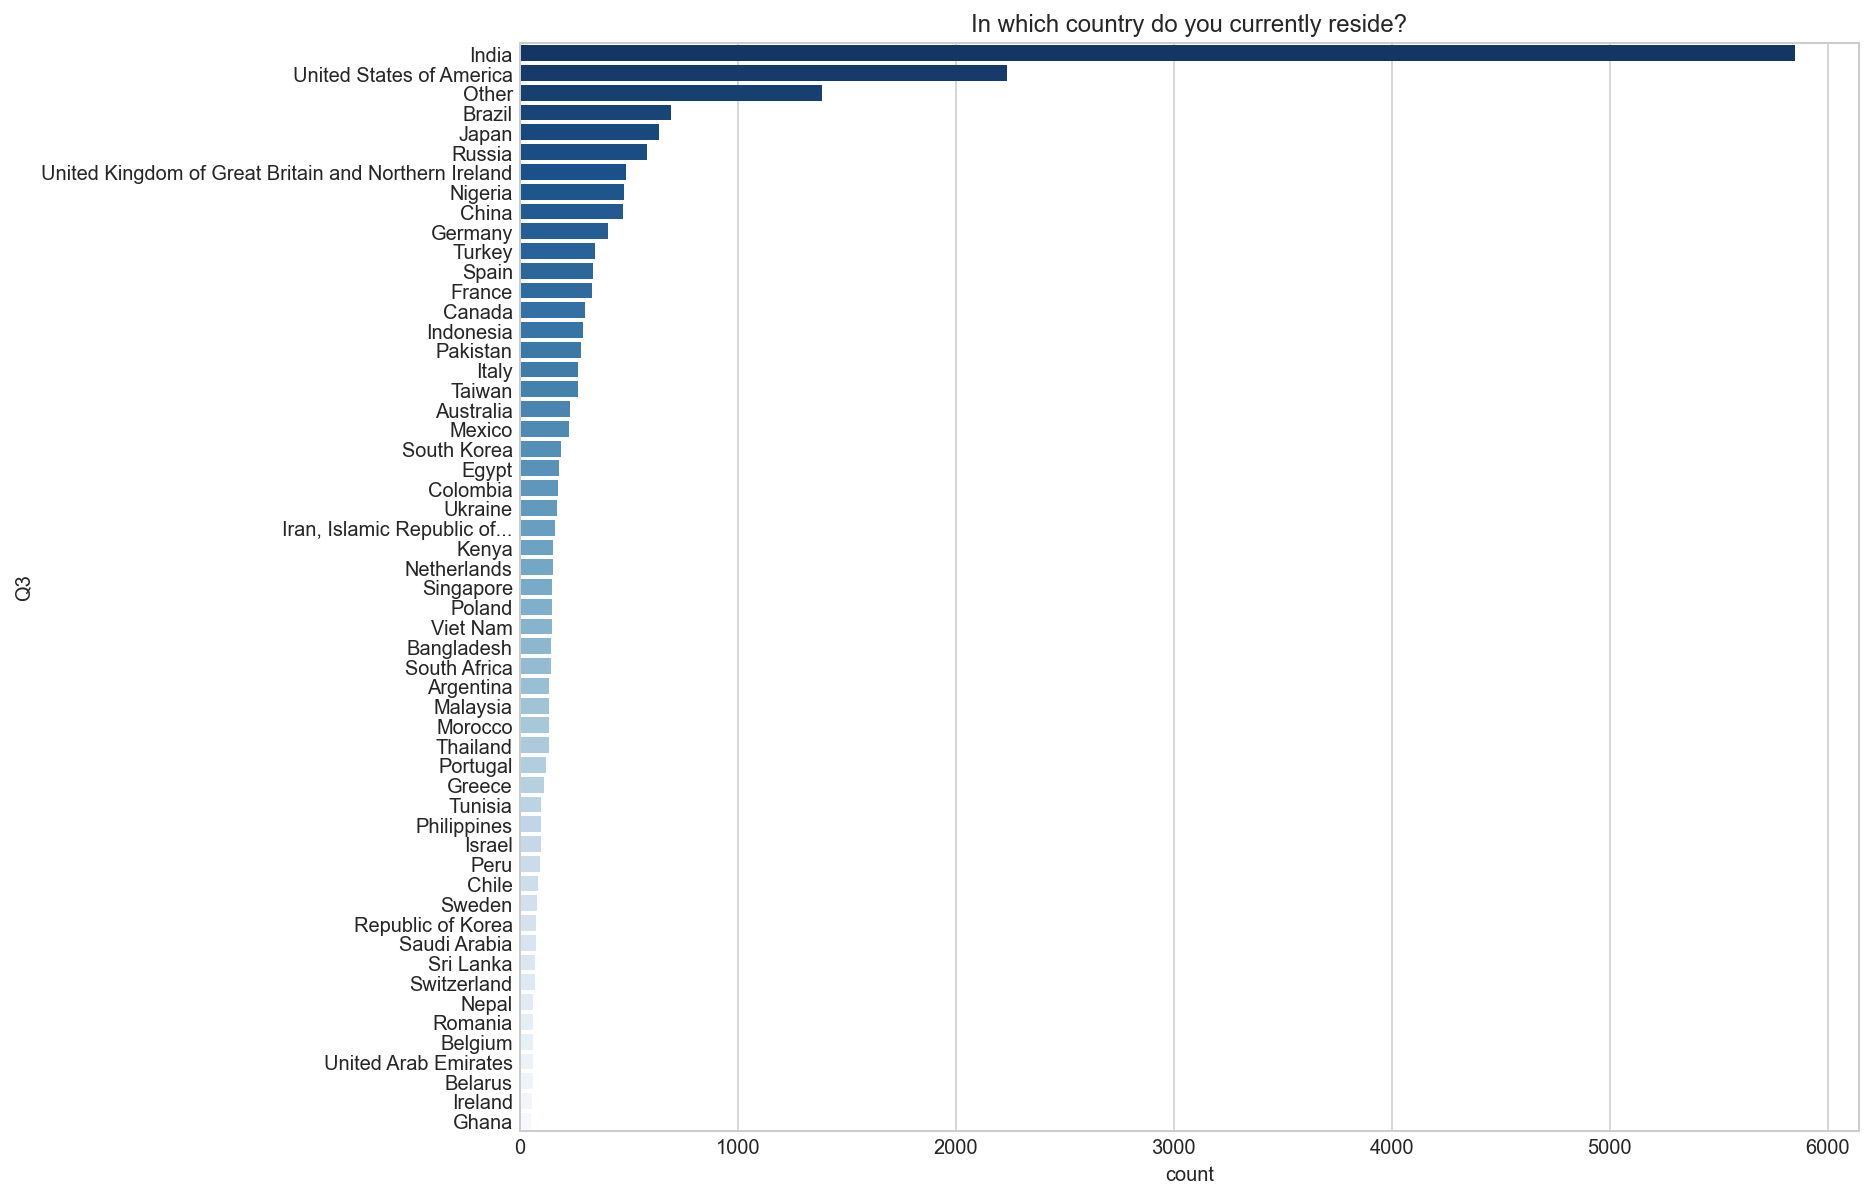

In [14]:
show_countplot_by_qno("Q3", (12, 10))

## Q4 🎓 What is the highest level of formal education that you have attained or plan to attain within the next 2 years?

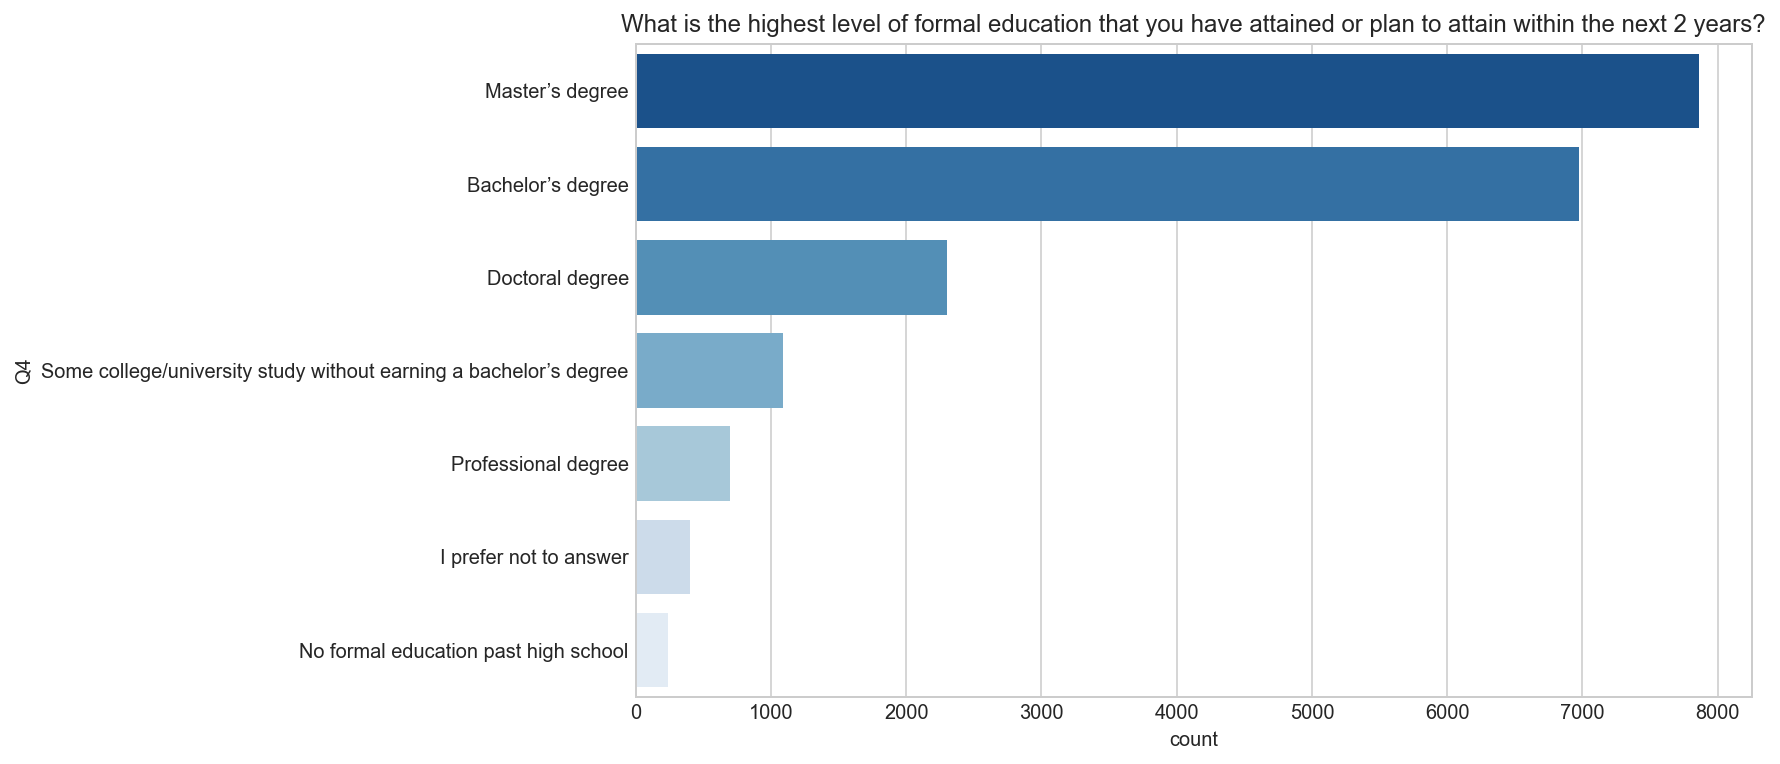

In [15]:
show_countplot_by_qno("Q4")

## Q5 Select the title most similar to your current role (or most recent title if retired):

In [16]:
question_no = "Q5"
question[question_no]

'Select the title most similar to your current role (or most recent title if retired): - Selected Choice'

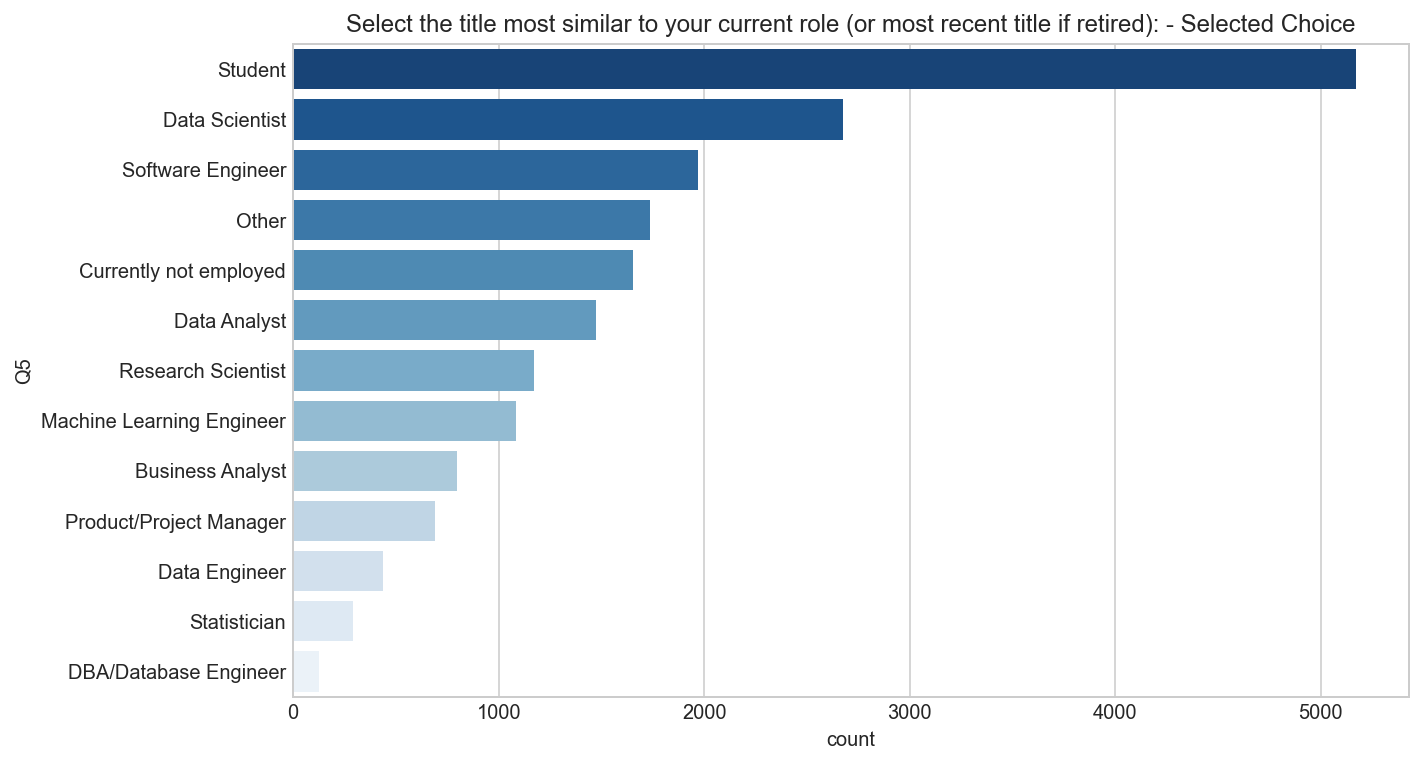

In [17]:
show_countplot_by_qno("Q5")

### Q5 & Q2

In [18]:
q2q5 = pd.crosstab(answer["Q2"], answer["Q5"])
q2q5.loc[["Man", "Woman"]]

Q5     Business Analyst  Currently not employed  DBA/Database Engineer  \
Q2                                                                       
Man                 627                    1235                    103   
Woman               156                     376                     16   

Q5     Data Analyst  Data Engineer  Data Scientist  Machine Learning Engineer  \
Q2                                                                              
Man            1110            369            2194                        928   
Woman           348             60             438                        136   

Q5     Other  Product/Project Manager  Research Scientist  Software Engineer  \
Q2                                                                             
Man     1418                      603                 899               1670   
Woman    292                       78                 239                260   

Q5     Statistician  Student  
Q2                            
Man             219     3843  
Woman            69     1245

In [19]:
q2_gender = answer.loc[answer["Q2"].isin(["Man","Woman"])]

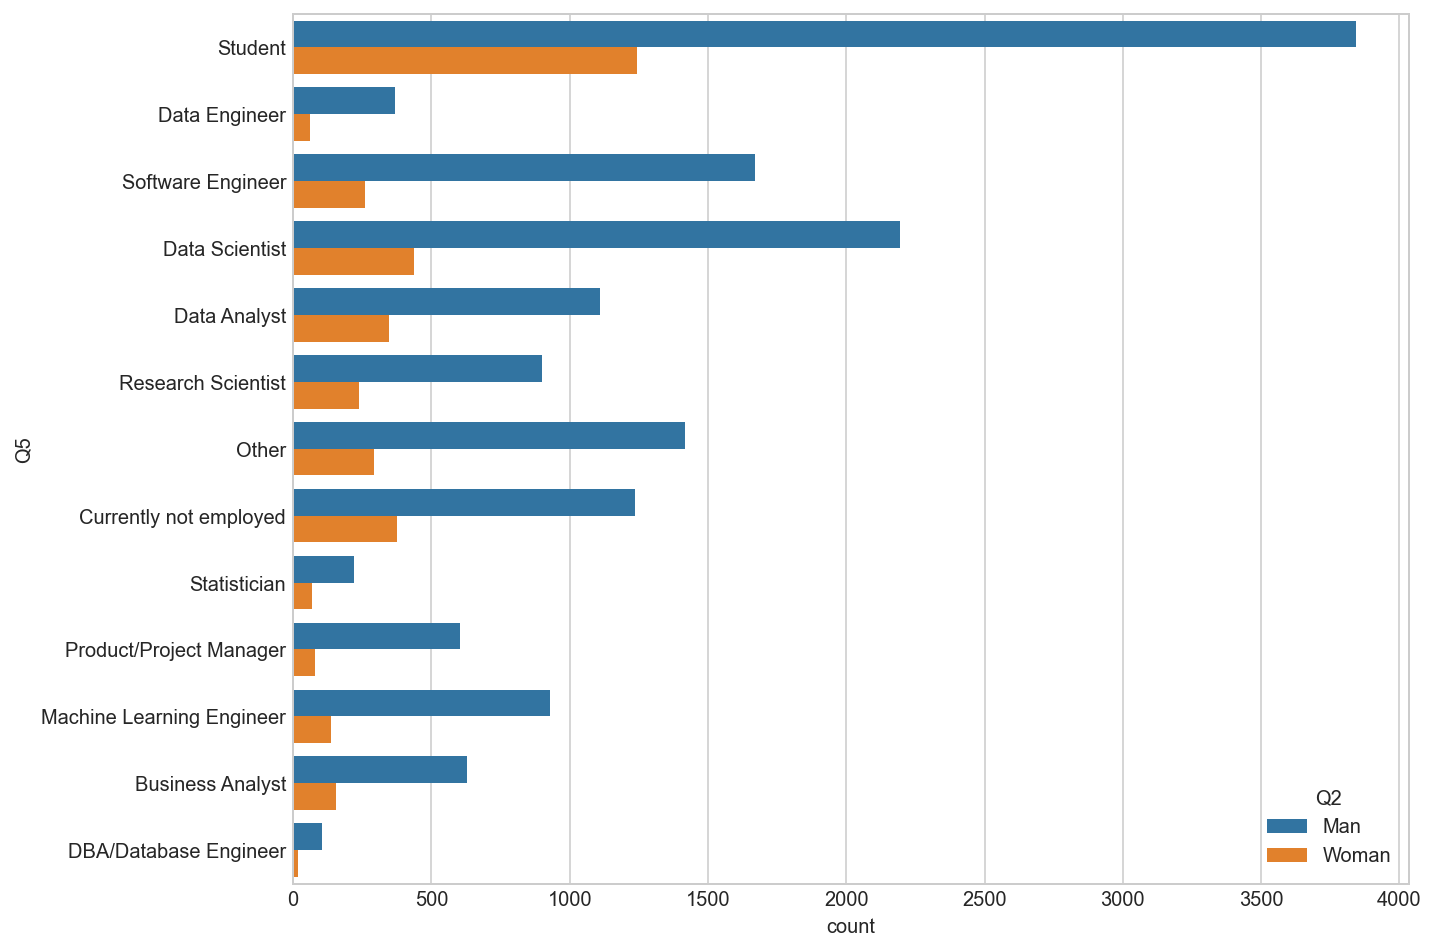

In [20]:
plt.figure(figsize=(10, 8))
sns.countplot(data=q2_gender, y="Q5", hue="Q2")

## Q6 For how many years have you been writing code and/or programming?

In [21]:
question_no = "Q6"
question[question_no]

'For how many years have you been writing code and/or programming?'

In [22]:
answer[question_no].unique()

array(['5-10 years', '10-20 years', '3-5 years', '< 1 years', '1-2 years',
       '20+ years', 'I have never written code', nan], dtype=object)

In [23]:
q6_cols = ['I have never written code', '< 1 years', '1-2 years', '3-5 years', '5-10 years',  
       '10-20 years', '20+ years']

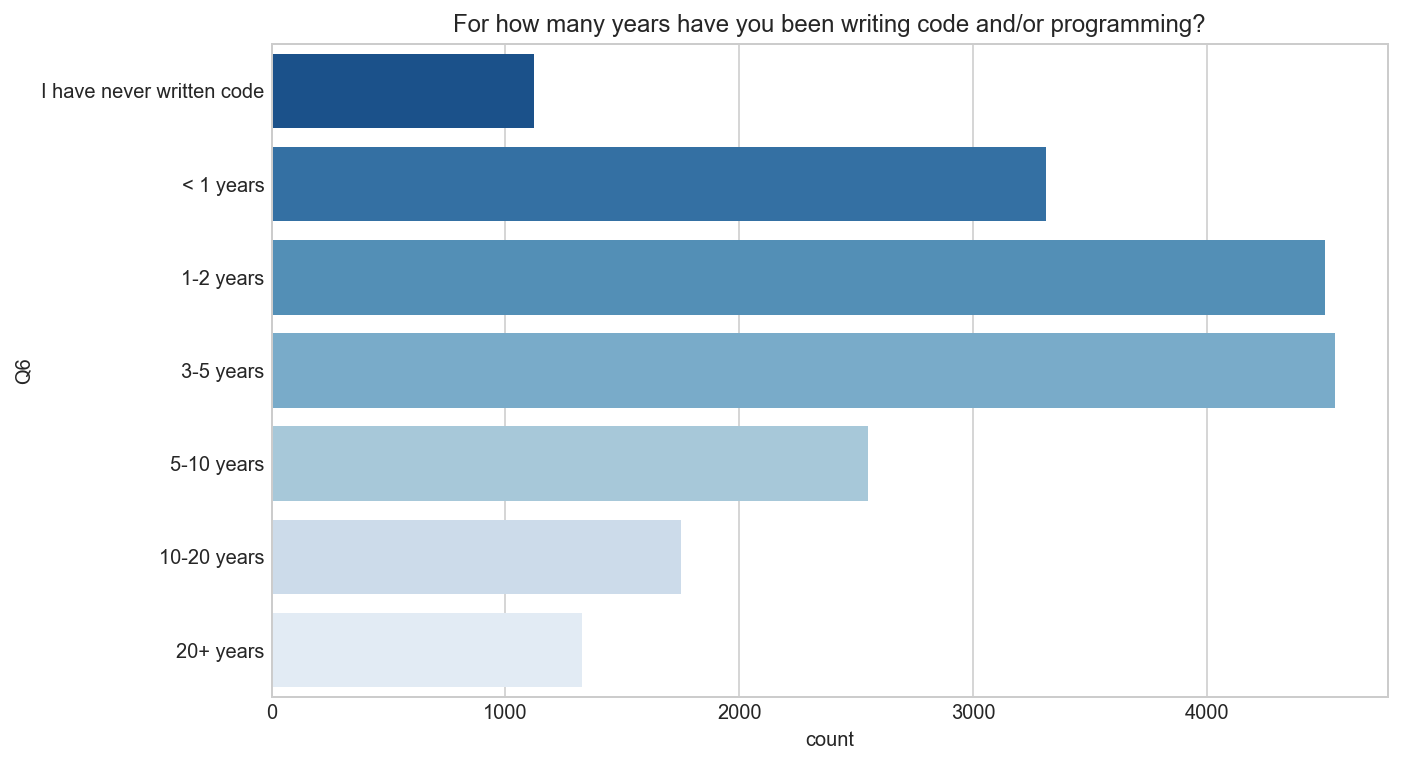

In [24]:
show_countplot_by_qno("Q6", order=q6_cols)

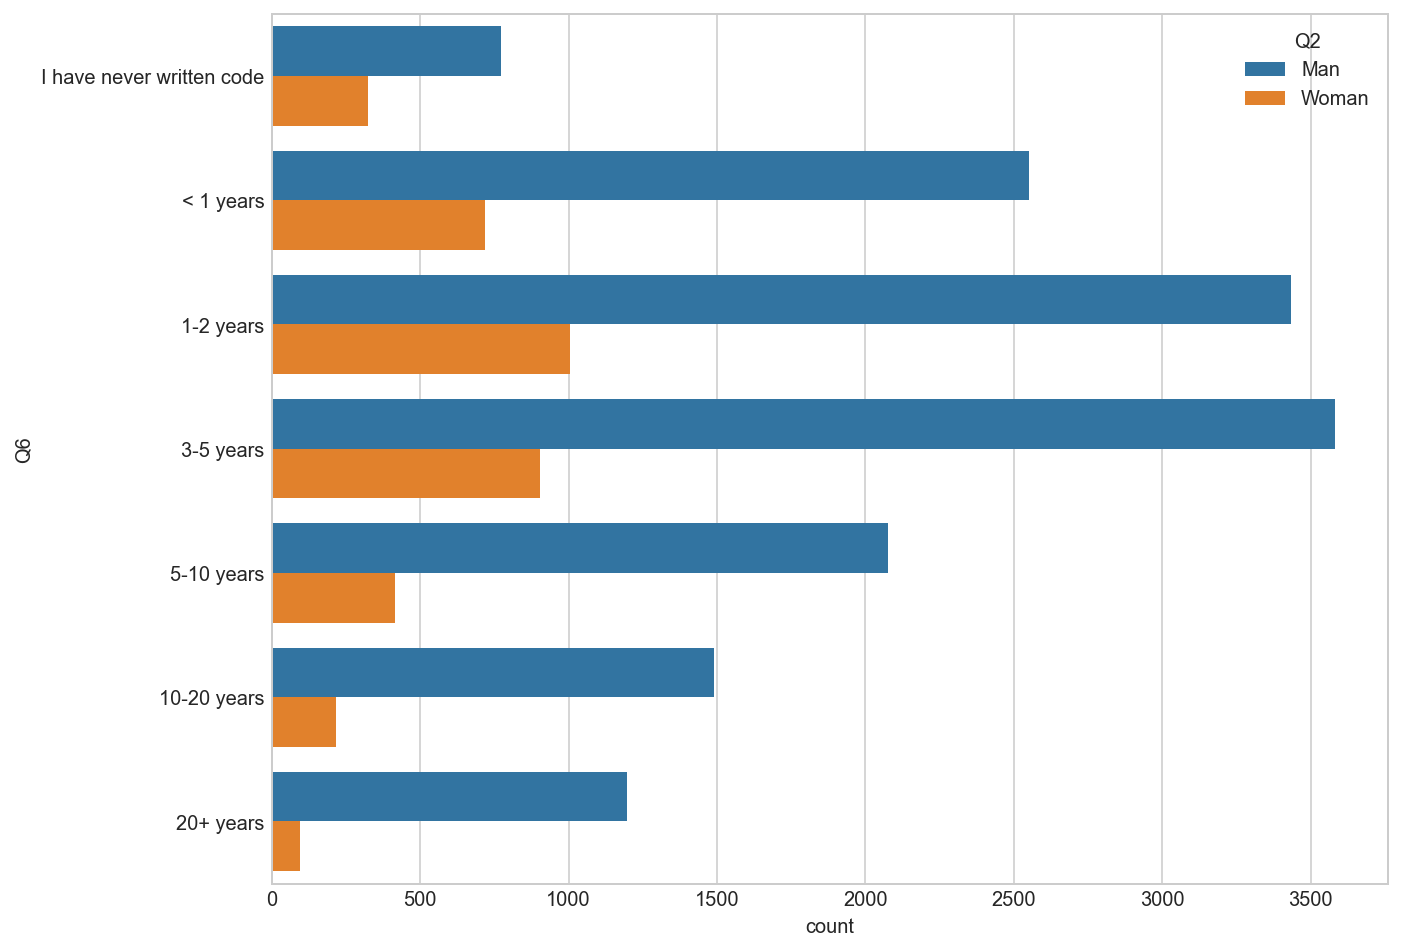

In [25]:
plt.figure(figsize=(10, 8))
sns.countplot(data=q2_gender, y="Q6", hue="Q2", order=q6_cols)

In [26]:
q2q6 = pd.crosstab(q2_gender["Q2"], q2_gender["Q6"])
q2q6.loc["gender_ratio"] = q2q6.loc["Woman"] / q2q6.loc["Man"] * 100
q2q6[q6_cols]

Q6            I have never written code    < 1 years    1-2 years  \
Q2                                                                  
Man                          772.000000  2550.000000  3433.000000   
Woman                        326.000000   717.000000  1004.000000   
gender_ratio                  42.227979    28.117647    29.245558   

Q6              3-5 years   5-10 years  10-20 years    20+ years  
Q2                                                                
Man           3580.000000  2077.000000  1490.000000  1197.000000  
Woman          903.000000   416.000000   217.000000    97.000000  
gender_ratio    25.223464    20.028888    14.563758     8.103592

## Q7 What programming languages do you use on a regular basis? (Select all that apply)

### 🐼 pandas filter & describe 🗂

In [27]:
answer_Q7 = answer.filter(regex="Q7")
answer_Q7

Q7_Part_1 Q7_Part_2 Q7_Part_3 Q7_Part_4 Q7_Part_5 Q7_Part_6   Q7_Part_7  \
1        Python         R       SQL         C       NaN       NaN  Javascript   
2        Python         R       SQL       NaN       NaN       NaN         NaN   
3           NaN       NaN       NaN       NaN       NaN      Java  Javascript   
4        Python       NaN       SQL       NaN       NaN       NaN         NaN   
5        Python       NaN       NaN       NaN       NaN       NaN         NaN   
...         ...       ...       ...       ...       ...       ...         ...   
20032       NaN       NaN       NaN       NaN       NaN       NaN         NaN   
20033    Python       NaN       NaN       NaN       NaN       NaN         NaN   
20034    Python       NaN       NaN       NaN       NaN       NaN         NaN   
20035    Python       NaN       SQL         C       NaN      Java  Javascript   
20036    Python       NaN       NaN       NaN       NaN       NaN         NaN   

      Q7_Part_8 Q7_Part_9 Q7_Part_10 Q7_Part_11 Q7_Part_12 Q7_OTHER  
1           NaN       NaN        NaN     MATLAB        NaN    Other  
2           NaN       NaN        NaN        NaN        NaN      NaN  
3           NaN       NaN       Bash        NaN        NaN      NaN  
4           NaN       NaN       Bash        NaN        NaN      NaN  
5           NaN       NaN        NaN        NaN        NaN      NaN  
...         ...       ...        ...        ...        ...      ...  
20032       NaN       NaN        NaN        NaN        NaN      NaN  
20033       NaN       NaN        NaN        NaN        NaN      NaN  
20034       NaN       NaN        NaN        NaN        NaN      NaN  
20035       NaN       NaN        NaN        NaN        NaN      NaN  
20036       NaN       NaN        NaN        NaN        NaN      NaN  

[20036 rows x 13 columns]

In [28]:
answer_Q7_desc = answer_Q7.describe()
answer_Q7_desc

Q7_Part_1 Q7_Part_2 Q7_Part_3 Q7_Part_4 Q7_Part_5 Q7_Part_6  \
count      15530      4277      7535      3315      3827      3367   
unique         1         1         1         1         1         1   
top       Python         R       SQL         C       C++      Java   
freq       15530      4277      7535      3315      3827      3367   

         Q7_Part_7 Q7_Part_8 Q7_Part_9 Q7_Part_10 Q7_Part_11 Q7_Part_12  \
count         2995       262       198       1776       2217        206   
unique           1         1         1          1          1          1   
top     Javascript     Julia     Swift       Bash     MATLAB       None   
freq          2995       262       198       1776       2217        206   

       Q7_OTHER  
count      1945  
unique        1  
top       Other  
freq       1945

In [29]:
answer_Q7_count = answer_Q7_desc.loc[["top", "count"]].T
answer_Q7_count = answer_Q7_count.set_index("top")
answer_Q7_count = answer_Q7_count.sort_values("count", ascending=False)
answer_Q7_count

count
top              
Python      15530
SQL          7535
R            4277
C++          3827
Java         3367
C            3315
Javascript   2995
MATLAB       2217
Other        1945
Bash         1776
Julia         262
None          206
Swift         198

### 🗂 How to get title in multiple choice question

In [30]:
question.filter(regex="Q7")[0]

'What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - Python'

Text(0.5, 1.0, 'What programming languages do you use on a regular basis?')

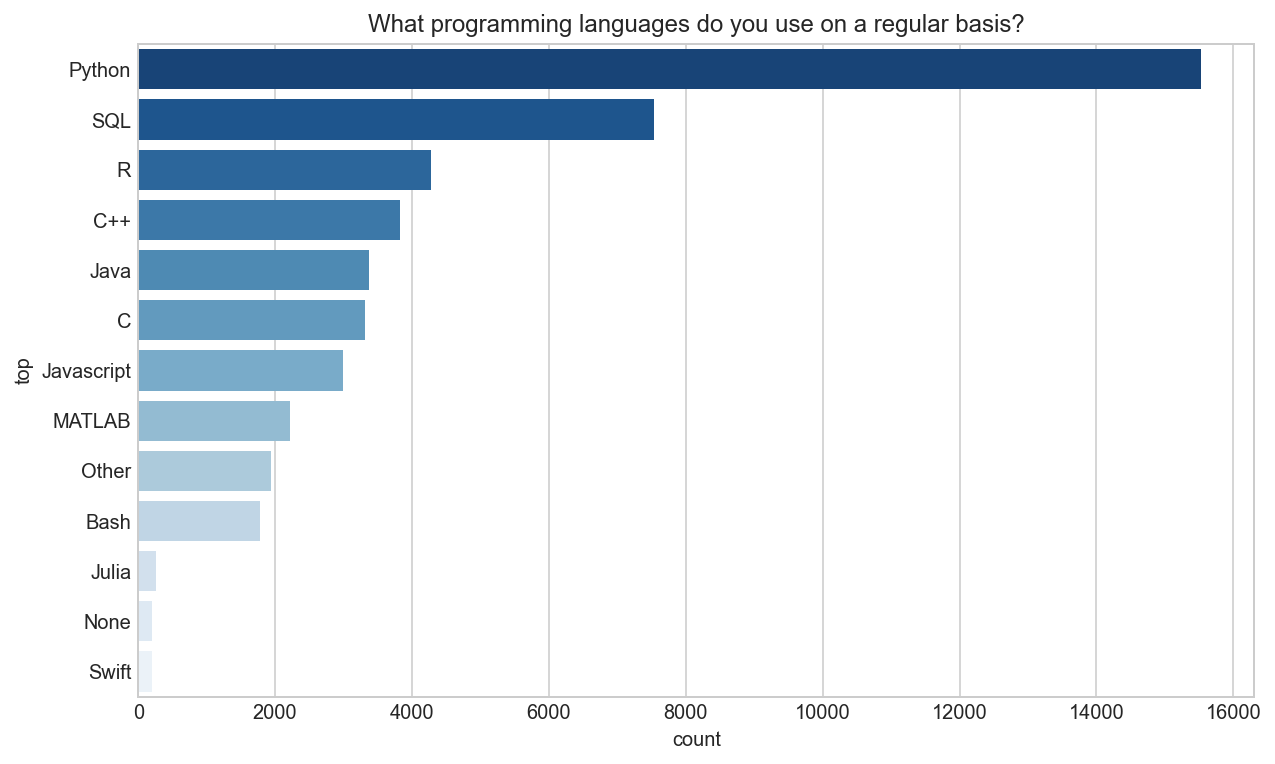

In [31]:
plt.figure(figsize=(10, 6))
sns.barplot(data=answer_Q7_count, y=answer_Q7_count.index,
              x="count", palette="Blues_r"
             ).set_title("What programming languages do you use on a regular basis?")

### 🏷 define get_question_title function

In [32]:
def get_question_title_by_qno(qno):
    if qno in question.index:
        return question[qno]
    else:
        q_no = answer.filter(regex=qno).columns[0]
        q_no = question[q_no].split("-")[0]
        return q_no

In [33]:
question_title = get_question_title_by_qno("Q7")
question_title

'What programming languages do you use on a regular basis? (Select all that apply) '

In [34]:
question_title = get_question_title_by_qno("Q9")
question_title

"Which of the following integrated development environments (IDE's) do you use on a regular basis?  (Select all that apply) "

### define get_multiple_choice_answer

In [35]:
def get_multiple_choice_answer_by_qno(qno):  
    df_answer = answer.filter(regex=qno)
    answer_desc = df_answer.describe()
    answer_count = answer_desc.loc[["top", "count"]].T.set_index("top")
    answer_count = answer_count.sort_values("count", ascending=False)
    return answer_count

In [36]:
get_multiple_choice_answer_by_qno("Q7")

count
top              
Python      15530
SQL          7535
R            4277
C++          3827
Java         3367
C            3315
Javascript   2995
MATLAB       2217
Other        1945
Bash         1776
Julia         262
None          206
Swift         198

### 📊 define show_multiple_choice_bar_plot_by_qno function

In [37]:
def show_multiple_choice_bar_plot_by_qno(qno):   
    multiple_choice_answer = get_multiple_choice_answer_by_qno(qno)

    plt.figure(figsize=(10, 6))
    sns.barplot(data=multiple_choice_answer, y=multiple_choice_answer.index,
                  x="count", palette="Blues_r"
                 ).set_title(get_question_title_by_qno(qno))

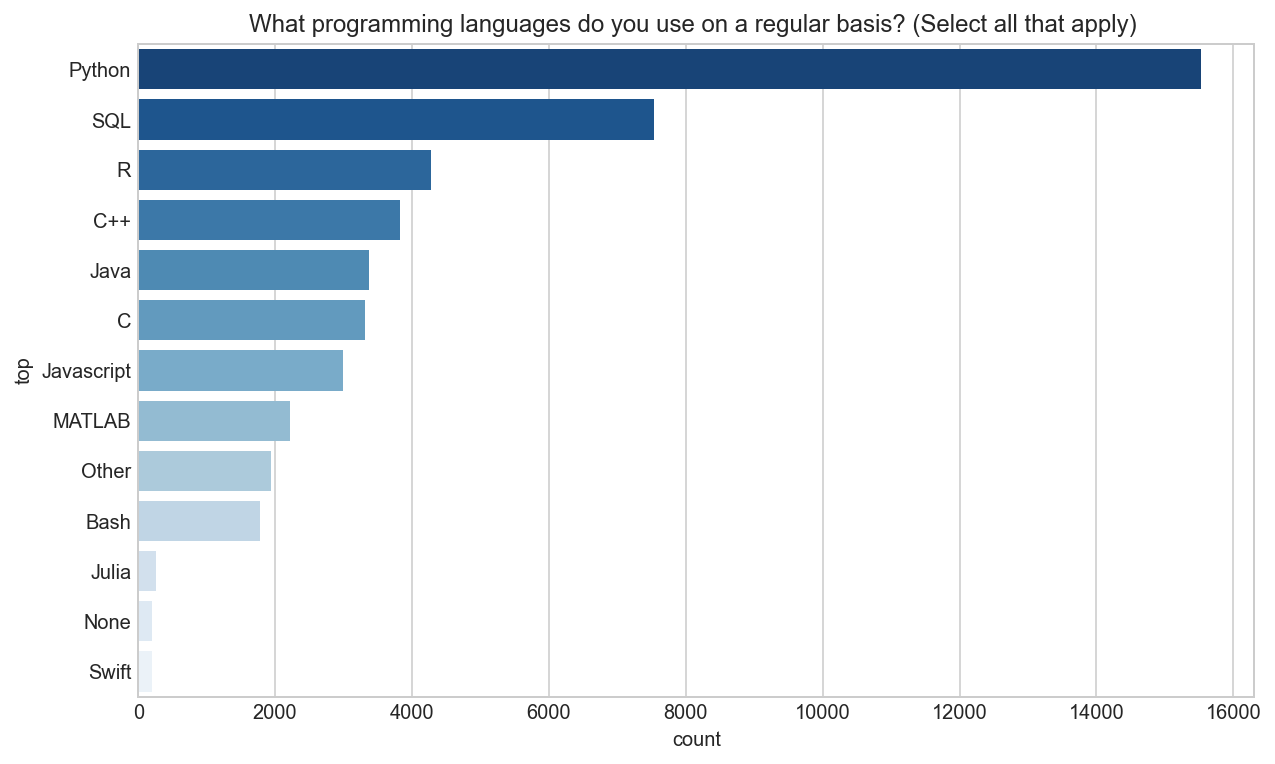

In [38]:
show_multiple_choice_bar_plot_by_qno("Q7")

In [39]:
def show_plot_by_qno(qno):
    if qno in question.index:
        show_countplot_by_qno(qno)
    else:
        show_multiple_choice_bar_plot_by_qno(qno)

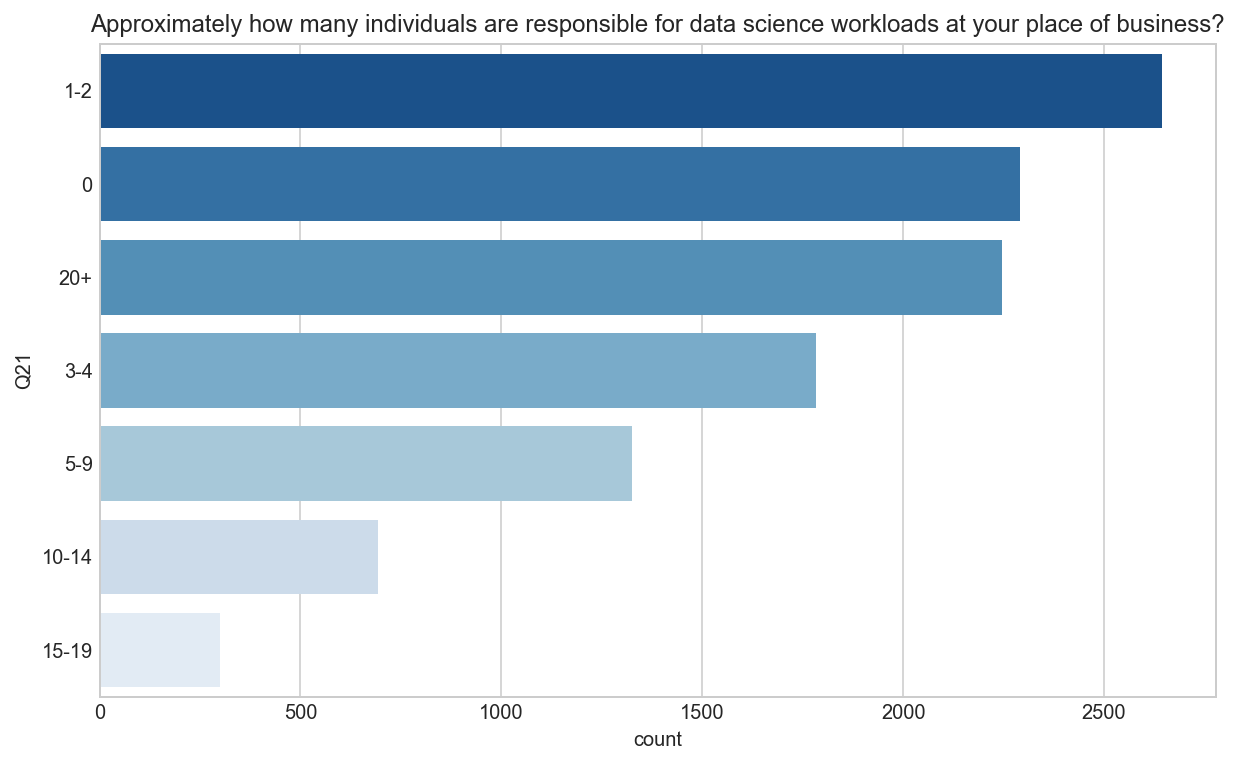

In [40]:
show_plot_by_qno("Q21")

### Q2 & Q7 - Age & Programming Language

In [41]:
q2q7 = answer.filter(regex="Q2$|Q7")
q2q7 = q2q7.groupby(["Q2"]).count()
q2q7

Q7_Part_1  Q7_Part_2  Q7_Part_3  Q7_Part_4  \
Q2                                                                    
Man                          12530       3299       5940       2552   
Nonbinary                       41         14         20          8   
Prefer not to say              182         48         97         36   
Prefer to self-describe         41          8         18         12   
Woman                         2736        908       1460        707   

                         Q7_Part_5  Q7_Part_6  Q7_Part_7  Q7_Part_8  \
Q2                                                                    
Man                           3063       2641       2487        238   
Nonbinary                       10          1          6          1   
Prefer not to say               43         42         41          5   
Prefer to self-describe         13          9         12          2   
Woman                          698        674        449         16   

                         Q7_Part_9  Q7_Part_10  Q7_Part_11  Q7_Part_12  \
Q2                                                                       
Man                            171        1561        1679         149   
Nonbinary                        2          10           7           0   
Prefer not to say                4          31          28           6   
Prefer to self-describe          1          10           6           0   
Woman                           20         164         497          51   

                         Q7_OTHER  
Q2                                 
Man                          1634  
Nonbinary                       7  
Prefer not to say              31  
Prefer to self-describe         7  
Woman                         266

In [42]:
q7_desc = answer.filter(regex="Q7").describe()
q7_cols = q7_desc.loc["top"].values.tolist()
q7_cols

['Python',
 'R',
 'SQL',
 'C',
 'C++',
 'Java',
 'Javascript',
 'Julia',
 'Swift',
 'Bash',
 'MATLAB',
 'None',
 'Other']

In [43]:
q2q7.columns = q7_cols
q2q7

Python     R   SQL     C   C++  Java  Javascript  \
Q2                                                                          
Man                       12530  3299  5940  2552  3063  2641        2487   
Nonbinary                    41    14    20     8    10     1           6   
Prefer not to say           182    48    97    36    43    42          41   
Prefer to self-describe      41     8    18    12    13     9          12   
Woman                      2736   908  1460   707   698   674         449   

                         Julia  Swift  Bash  MATLAB  None  Other  
Q2                                                                
Man                        238    171  1561    1679   149   1634  
Nonbinary                    1      2    10       7     0      7  
Prefer not to say            5      4    31      28     6     31  
Prefer to self-describe      2      1    10       6     0      7  
Woman                       16     20   164     497    51    266

In [44]:
gender_lang = q2q7.loc[["Man", "Woman"]]
gender_lang

Python     R   SQL     C   C++  Java  Javascript  Julia  Swift  Bash  \
Q2                                                                            
Man     12530  3299  5940  2552  3063  2641        2487    238    171  1561   
Woman    2736   908  1460   707   698   674         449     16     20   164   

       MATLAB  None  Other  
Q2                          
Man      1679   149   1634  
Woman     497    51    266

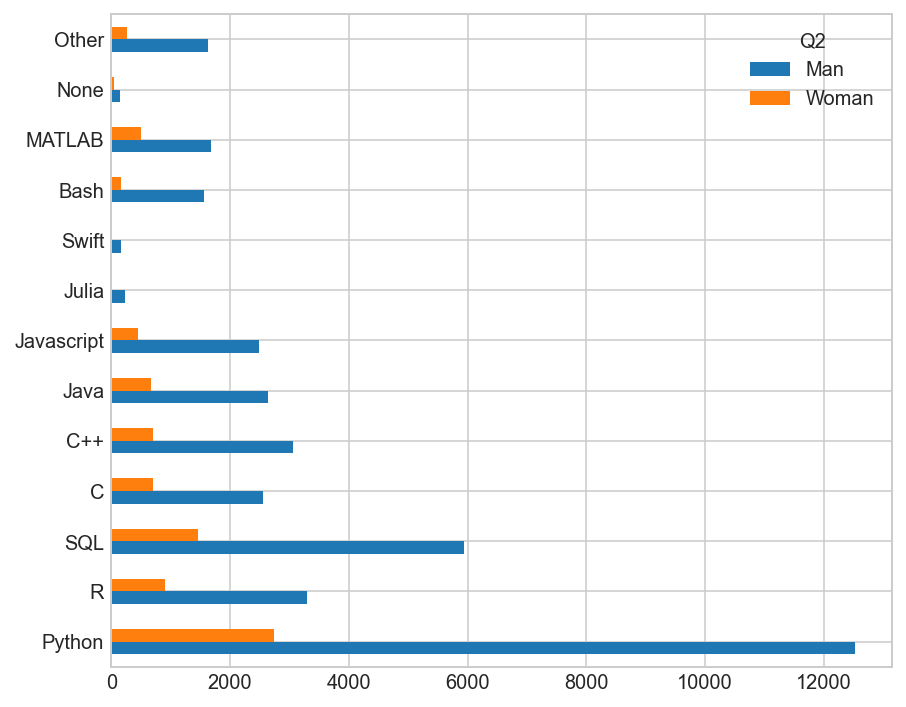

In [45]:
gender_lang.T.plot.barh(figsize=(7, 6))

## Q8 What programming language would you recommend an aspiring data scientist to learn first? - Selected Choice

In [46]:
question_no = "Q8"
question[question_no]

'What programming language would you recommend an aspiring data scientist to learn first? - Selected Choice'

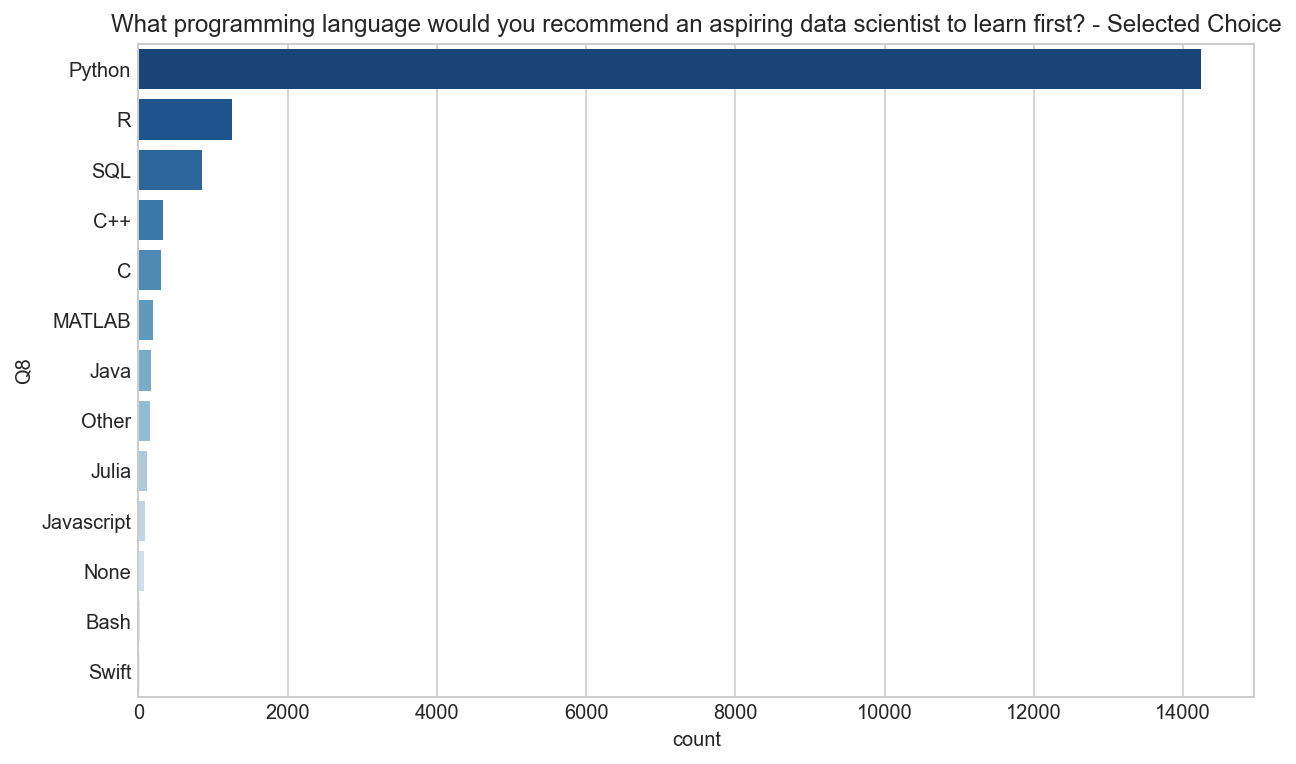

In [47]:
show_countplot_by_qno("Q8")

In [48]:
q2q8 = pd.crosstab(answer["Q2"], answer["Q8"])
q2q8

Q8                       Bash    C  C++  Java  Javascript  Julia  MATLAB  \
Q2                                                                         
Man                        18  226  250   125          60    109     145   
Nonbinary                   0    2    1     0           0      0       1   
Prefer not to say           2    7    4     0           4      3       5   
Prefer to self-describe     2    1    2     1           0      0       1   
Woman                       4   65   68    41          24      9      43   

Q8                       None  Other  Python    R  SQL  Swift  
Q2                                                             
Man                        59    111   11483  975  624     15  
Nonbinary                   1      3      31    4    1      0  
Prefer not to say           2      3     164   11   10      1  
Prefer to self-describe     1      0      34    0    3      0  
Woman                      18     34    2529  269  211      1

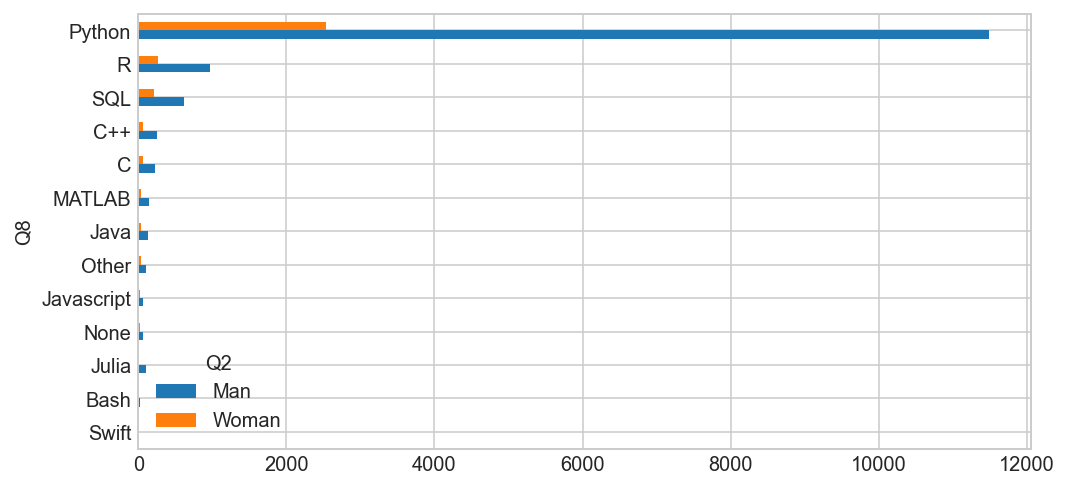

In [49]:
q2q8.loc[["Man", "Woman"]].T.sort_values(by="Woman").plot.barh(figsize=(8, 4))

## Q9 Which of the following integrated development environments (IDE's) do you use on a regular basis?  (Select all that apply)

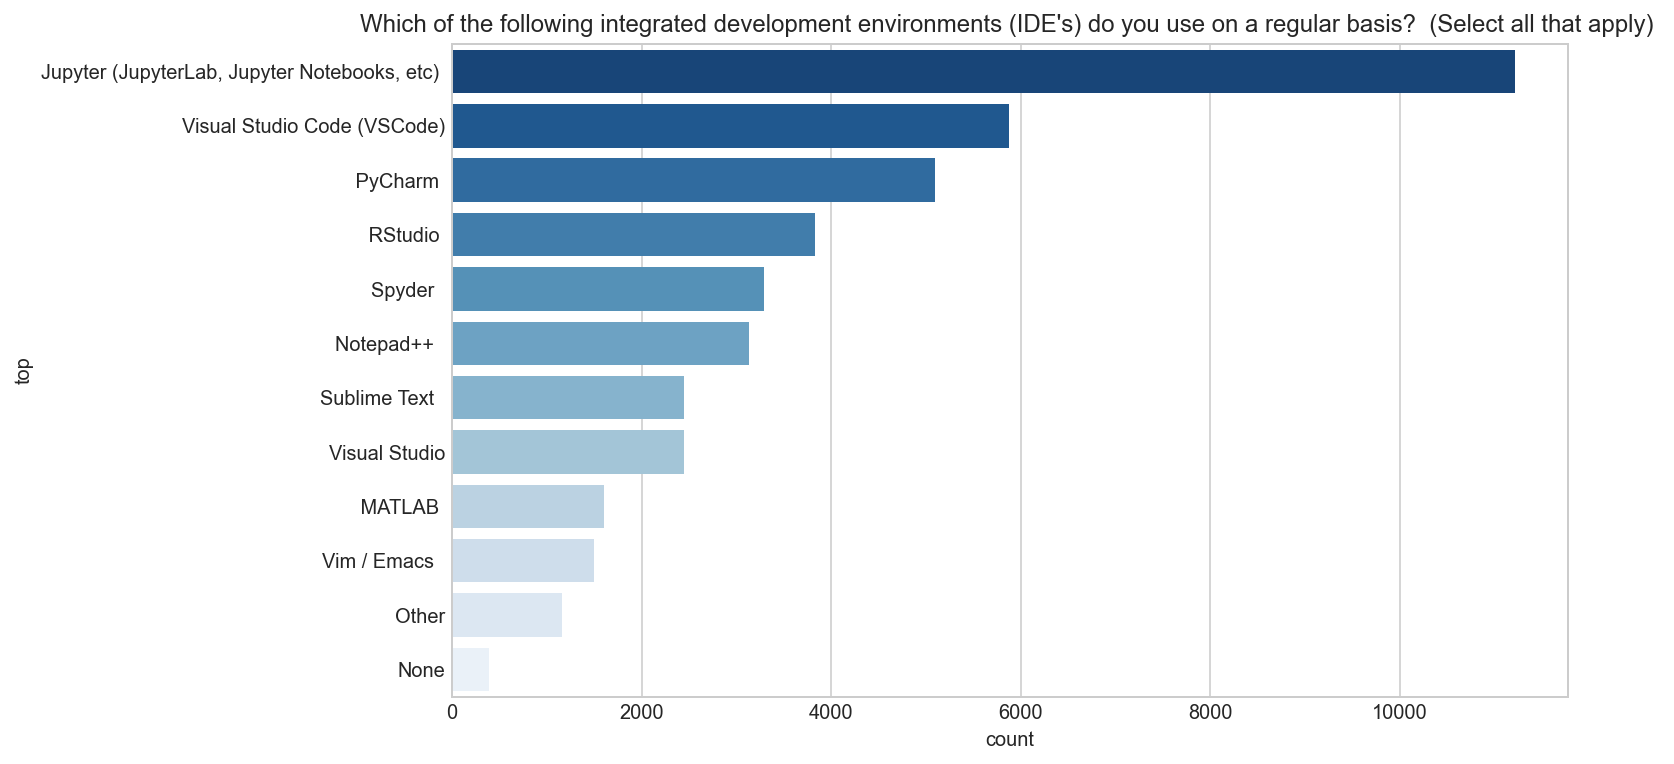

In [50]:
show_multiple_choice_bar_plot_by_qno("Q9")

In [51]:
q9_desc = answer.filter(regex="Q9").describe()
q9_cols = q9_desc.loc["top"].tolist()
len(q9_cols)

12

In [52]:
q2q9 = answer.filter(regex="Q2$|Q9")
q2q9_count = q2q9.groupby("Q2").count()
q2q9_count.columns = q9_cols
q2q9_count

Jupyter (JupyterLab, Jupyter Notebooks, etc)   \
Q2                                                                       
Man                                                               9019   
Nonbinary                                                           22   
Prefer not to say                                                  123   
Prefer to self-describe                                             33   
Woman                                                             2014   

                          RStudio   Visual Studio  \
Q2                                                  
Man                           2946           1956   
Nonbinary                       12              6   
Prefer not to say               49             25   
Prefer to self-describe          6              7   
Woman                          813            451   

                         Visual Studio Code (VSCode)   PyCharm     Spyder    \
Q2                                                                            
Man                                             4993       4190        2636   
Nonbinary                                         17         10           3   
Prefer not to say                                 75         62          43   
Prefer to self-describe                           17         14           9   
Woman                                            771        823         599   

                           Notepad++      Sublime Text      Vim / Emacs    \
Q2                                                                          
Man                               2423              1973             1303   
Nonbinary                           14                 6                8   
Prefer not to say                   61                32               36   
Prefer to self-describe             11                 9                7   
Woman                              623               432              148   

                          MATLAB   None  Other  
Q2                                              
Man                          1173   269    929  
Nonbinary                       5     1      6  
Prefer not to say              23     7     18  
Prefer to self-describe         1     0      8  
Woman                         402   109    201

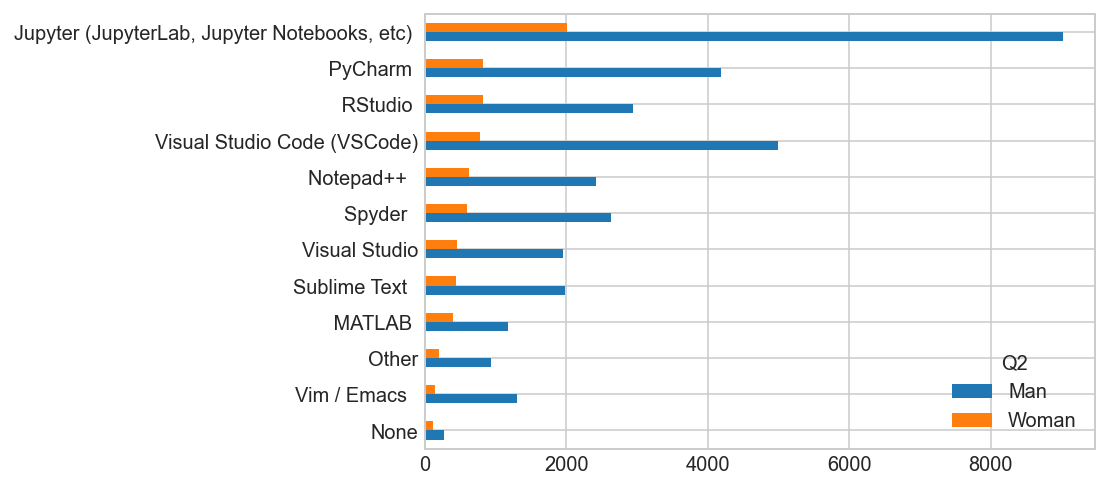

In [53]:
q2q9_count.loc[["Man", "Woman"]].T.sort_values("Woman").plot.barh()

## Q10 Which of the following hosted notebook products do you use on a regular basis?  (Select all that apply)

In [54]:
answer_Q10 = get_multiple_choice_answer_by_qno("Q10")
answer_Q10

count
top                                       
Colab Notebooks                       6329
 Kaggle Notebooks                     5992
None                                  5282
 Binder / JupyterHub                  2072
Google Cloud Datalab Notebooks        1231
Google Cloud AI Platform Notebooks    1218
Azure Notebooks                        857
 IBM Watson Studio                     846
 Amazon Sagemaker Studio               497
Other                                  485
 Databricks Collaborative Notebooks    394
 Amazon EMR Notebooks                  245
 Paperspace / Gradient                 180
 Code Ocean                            105

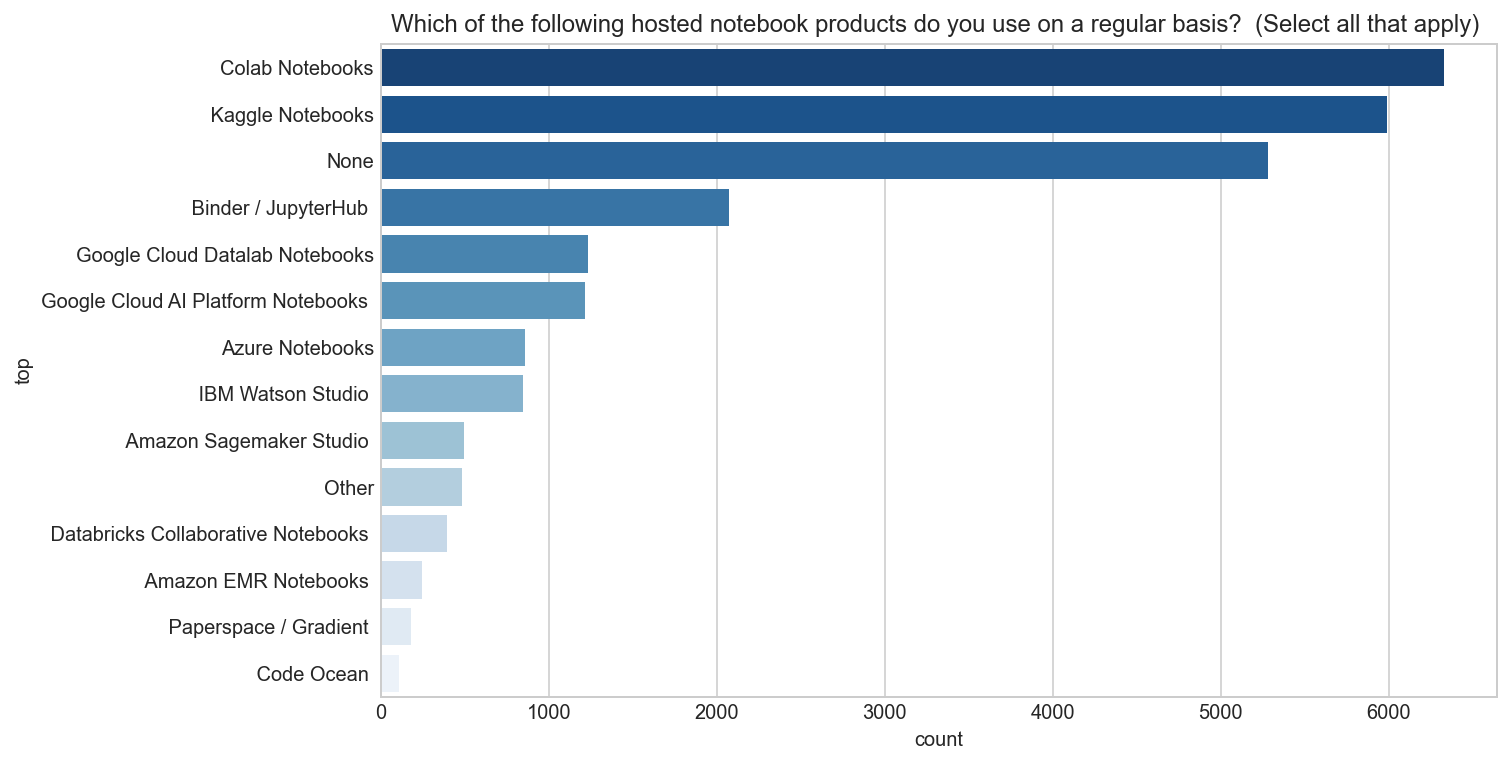

In [55]:
show_multiple_choice_bar_plot_by_qno("Q10")

## Q11 What type of computing platform do you use most often for your data science projects? - Selected Choice

In [56]:
question_no = "Q11"
question[question_no]

'What type of computing platform do you use most often for your data science projects? - Selected Choice'

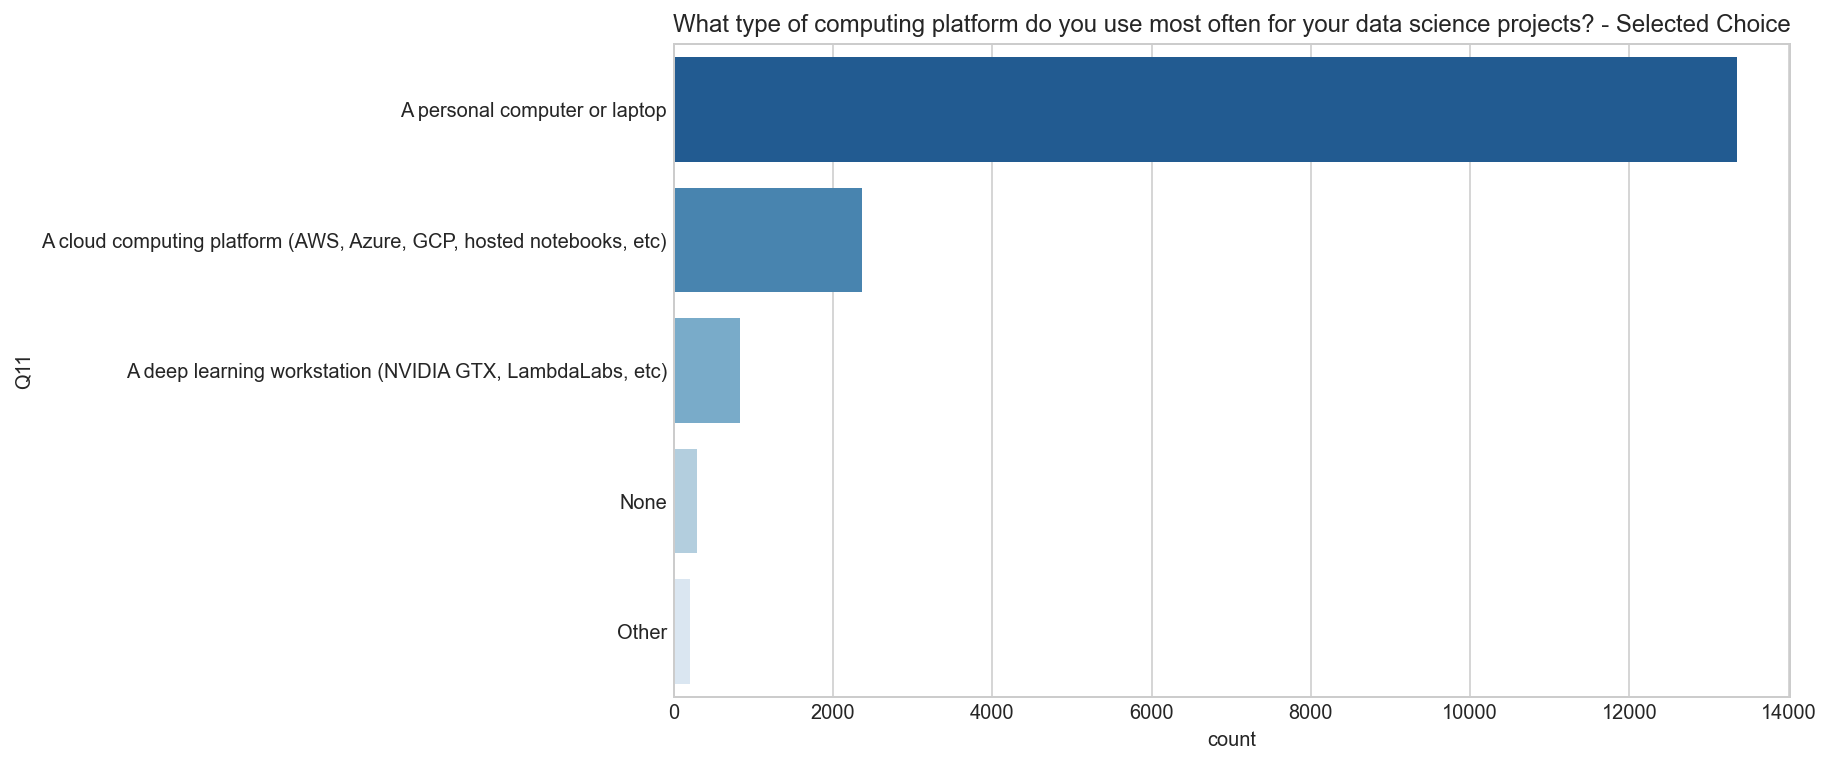

In [57]:
show_countplot_by_qno("Q11")

## Q12 Which types of specialized hardware do you use on a regular basis?

In [58]:
answer_Q12 = get_multiple_choice_answer_by_qno("Q12")
answer_Q12

count
top        
GPUs   8310
None   7891
TPUs    960
Other   666

Text(0.5, 1.0, "Which of the following integrated development environments (IDE's) do you use on a regular basis?  (Select all that apply) ")

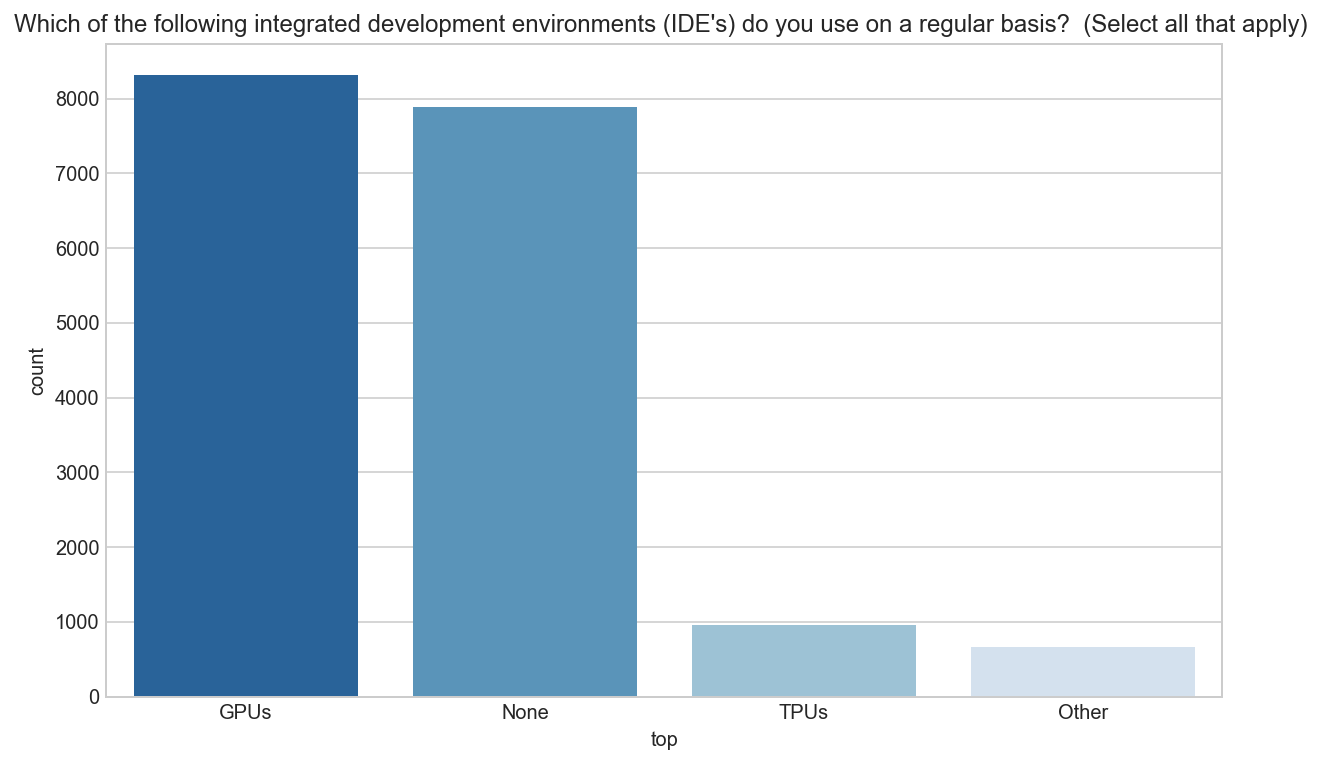

In [59]:
plt.figure(figsize=(10, 6))
sns.barplot(data=answer_Q12, x=answer_Q12.index,
              y="count", palette="Blues_r"
             ).set_title(question_title)

## Q13  🧮  Approximately how many times have you used a TPU (tensor processing unit)?

In [60]:
question_no = "Q13"
question[question_no]

'Approximately how many times have you used a TPU (tensor processing unit)?'

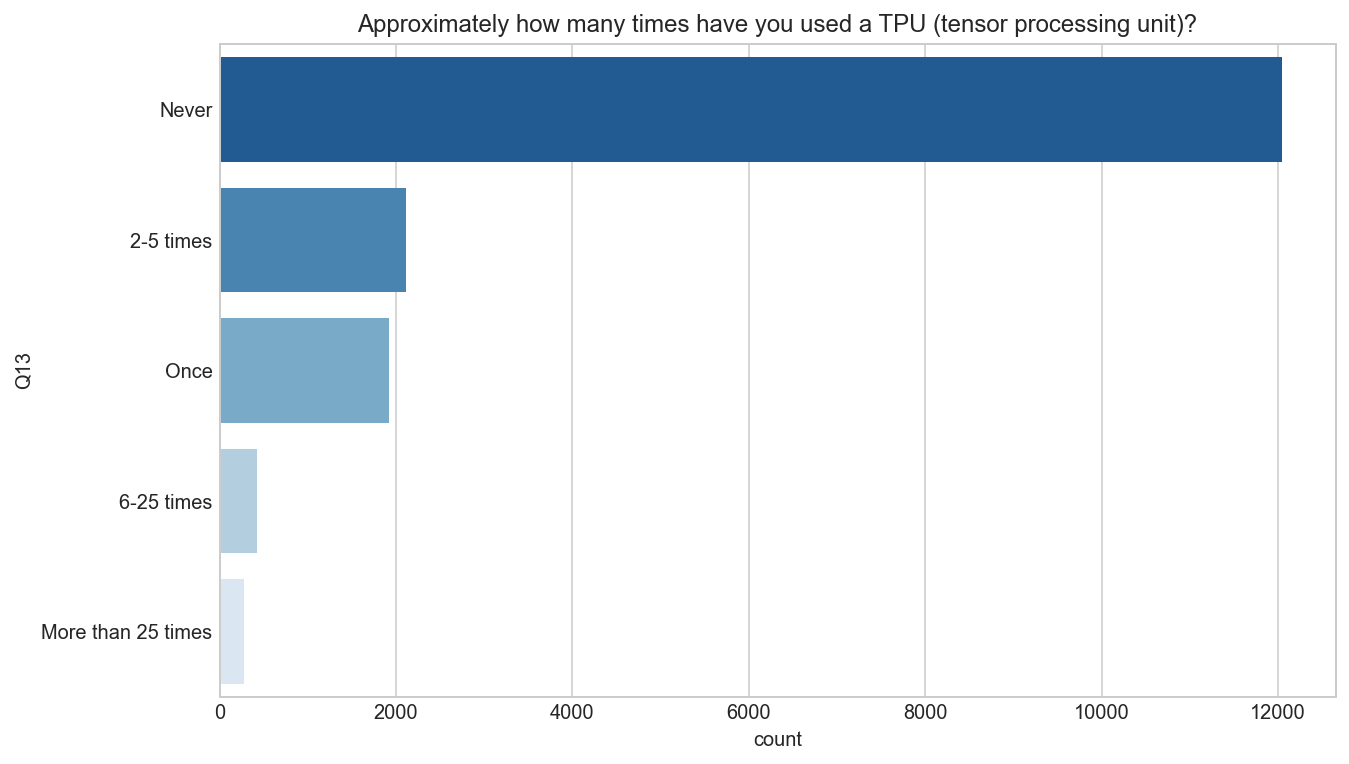

In [61]:
show_countplot_by_qno("Q13")

## Q14 🎨 What data visualization libraries or tools do you use on a regular basis?  (Select all that apply)

In [62]:
answer_Q14 = get_multiple_choice_answer_by_qno("Q14")
answer_Q14

count
top                             
 Matplotlib                12342
 Seaborn                    8821
 Plotly / Plotly Express    4130
 Ggplot / ggplot2           4120
None                        1897
 Shiny                      1137
 Bokeh                       920
 Geoplotlib                  850
 D3 js                       829
 Leaflet / Folium            596
Other                        565
 Altair                      233

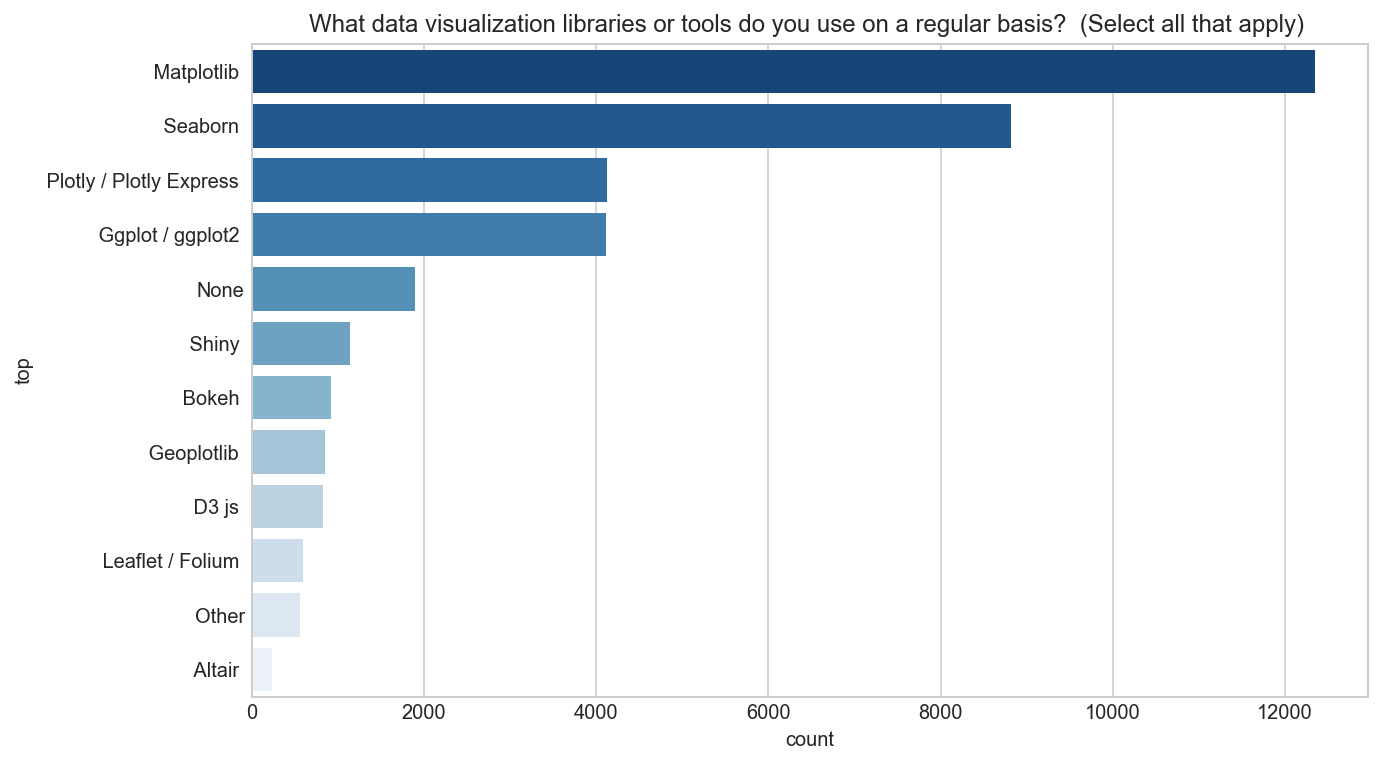

In [63]:
show_multiple_choice_bar_plot_by_qno("Q14")

## Q15 For how many years have you used machine learning methods?

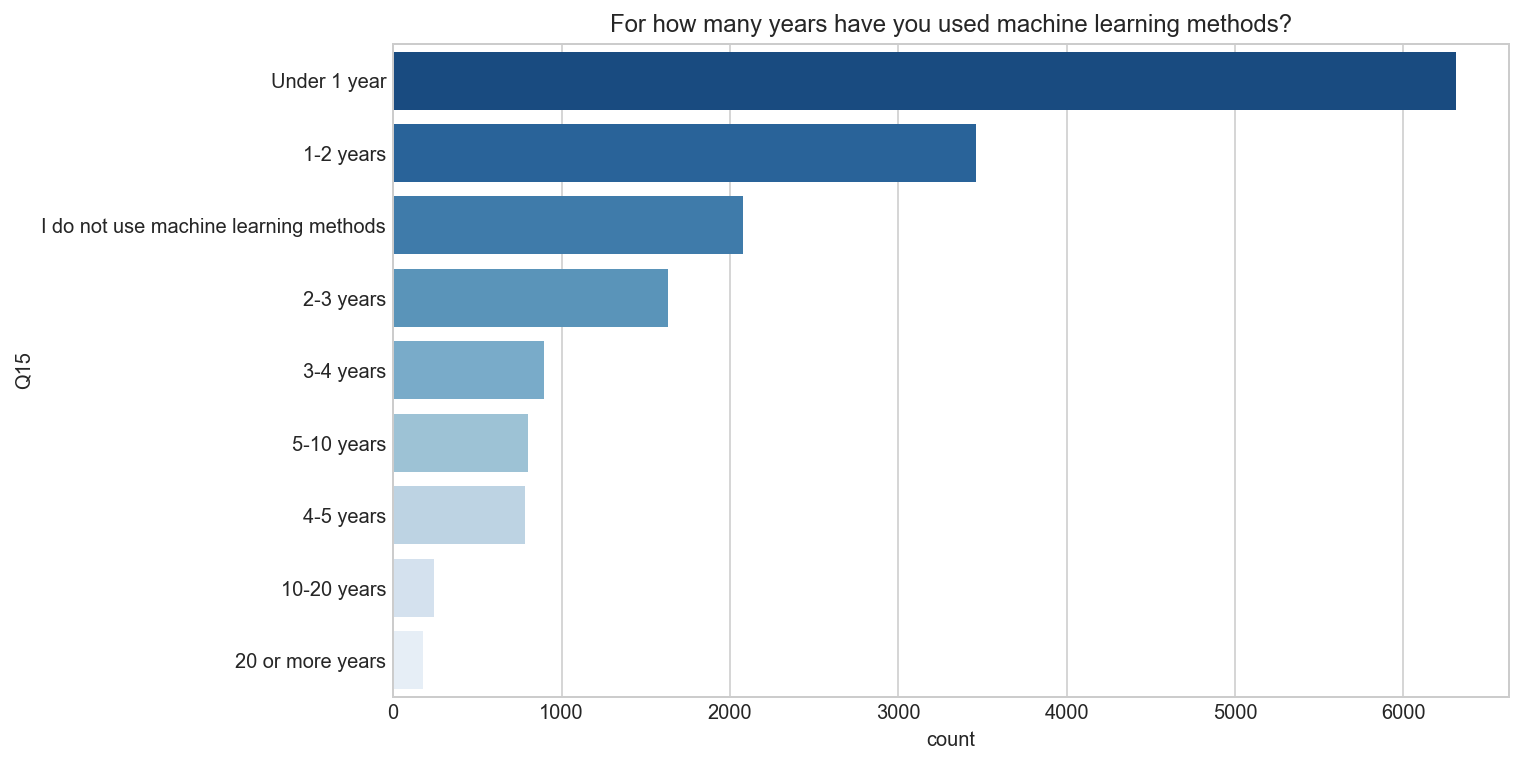

In [64]:
show_plot_by_qno("Q15")

## Q16 Which of the following machine learning frameworks do you use on a regular basis? (Select all that apply)

In [65]:
question_no = "Q16"
get_question_title_by_qno(question_no)

'Which of the following machine learning frameworks do you use on a regular basis? (Select all that apply) '

In [66]:
answer_Q16 = get_multiple_choice_answer_by_qno(question_no)
answer_Q16

count
top                   
  Scikit-learn   10250
  TensorFlow      6934
 Keras            6192
 PyTorch          4189
 Xgboost          3935
 LightGBM         1799
None              1208
 CatBoost          957
 Caret             939
 Fast.ai           742
 Prophet           532
 Tidymodels        484
Other              371
 H2O 3             344
 MXNet             218
 JAX                84

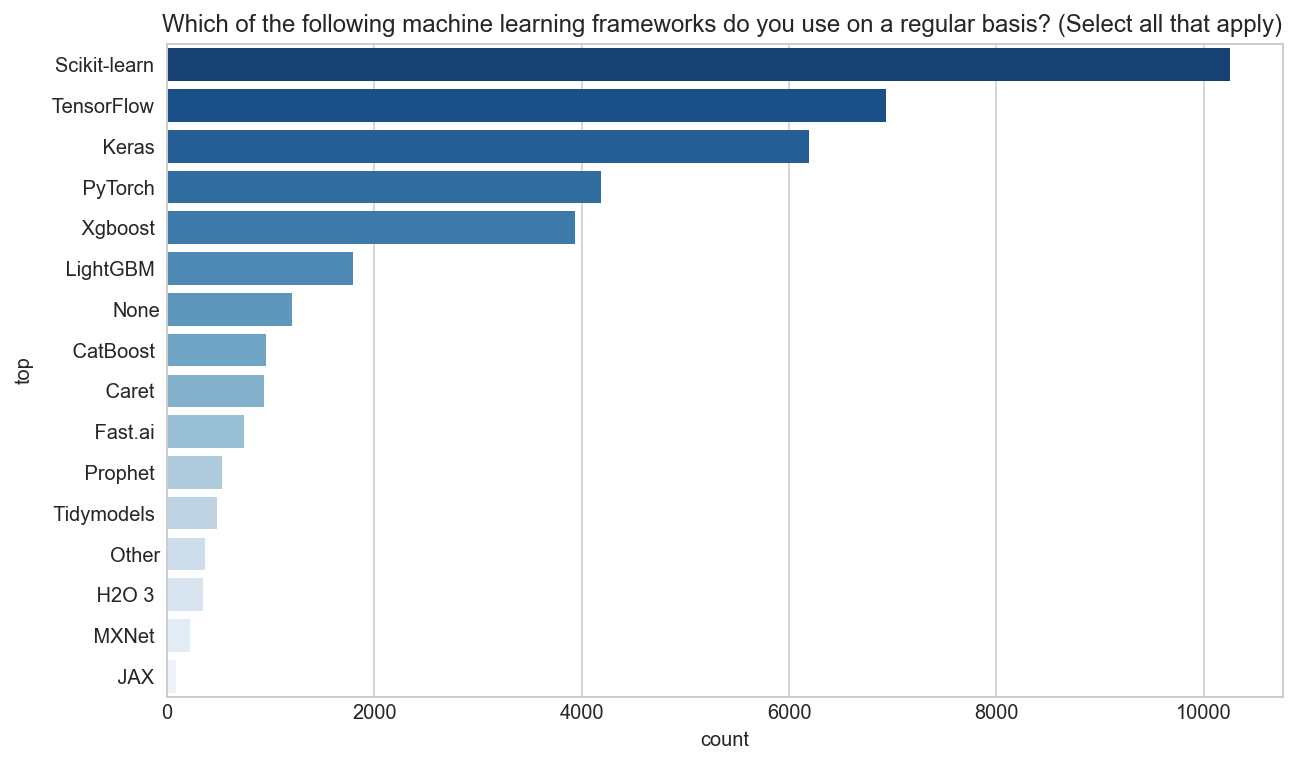

In [67]:
show_multiple_choice_bar_plot_by_qno("Q16")

## Q17 Which of the following ML algorithms do you use on a regular basis? (Select all that apply):

In [68]:
get_question_title_by_qno("Q17")

'Which of the following ML algorithms do you use on a regular basis? (Select all that apply): '

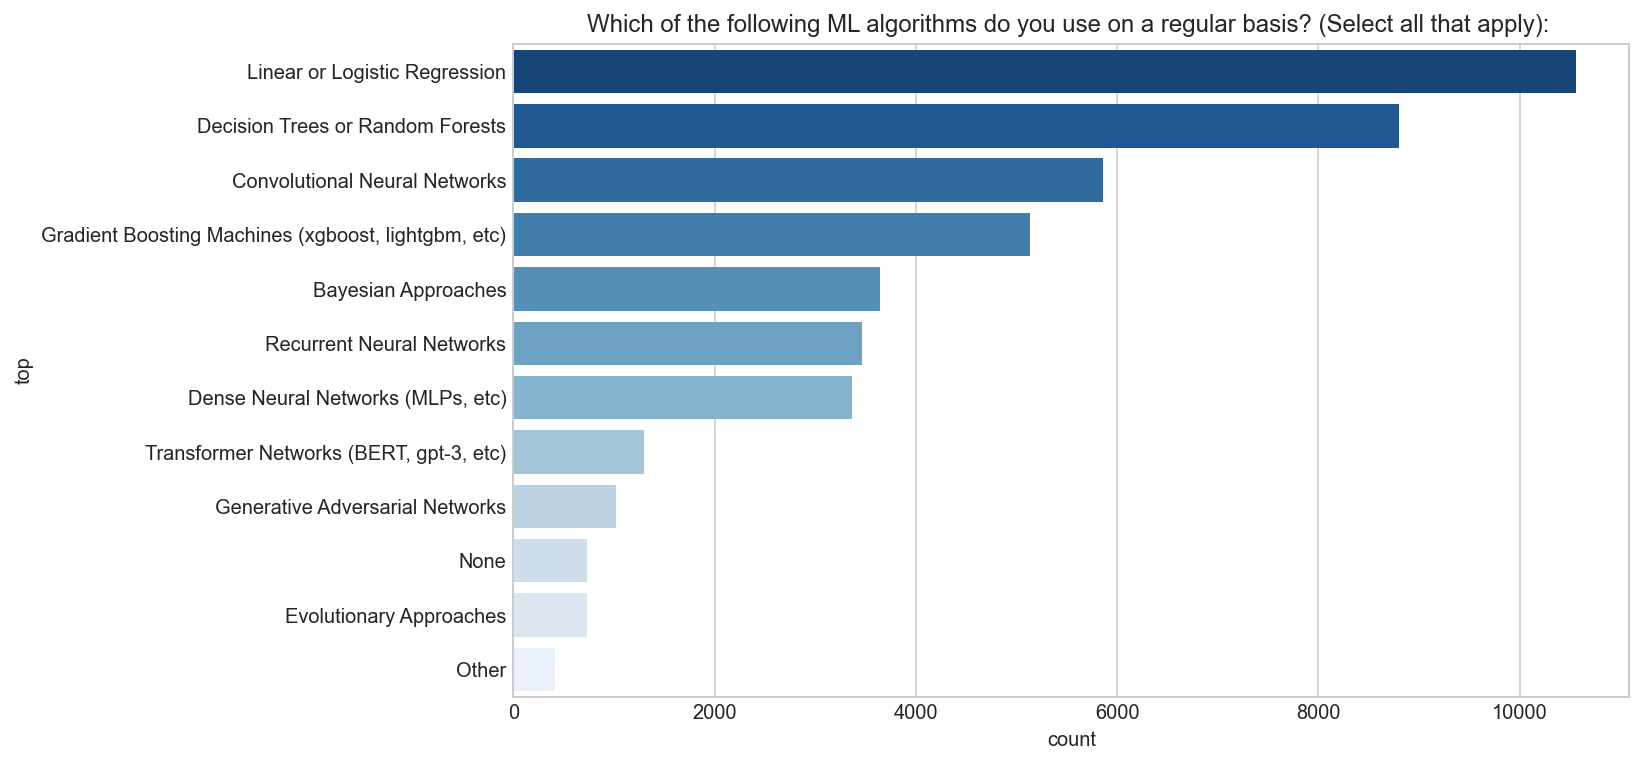

In [69]:
show_multiple_choice_bar_plot_by_qno("Q17")

## Q18 Which categories of computer vision methods do you use on a regular basis?  (Select all that apply)

In [70]:
get_question_title_by_qno("Q18")

'Which categories of computer vision methods do you use on a regular basis?  (Select all that apply) '

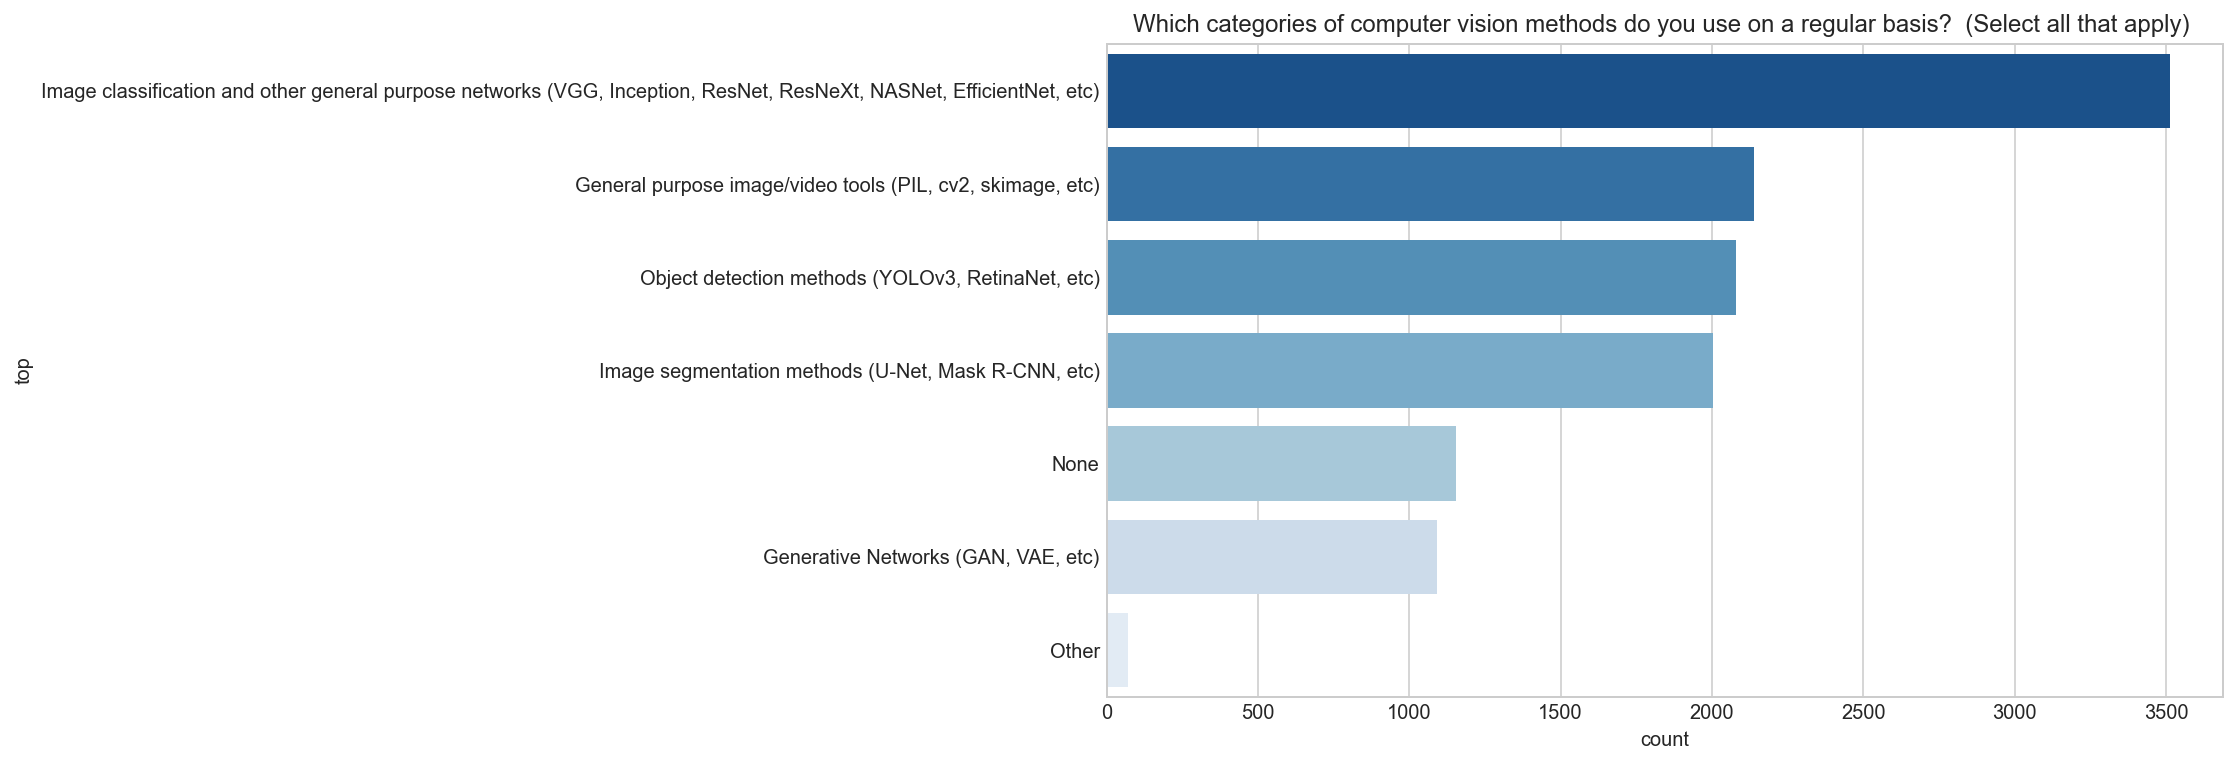

In [71]:
show_multiple_choice_bar_plot_by_qno("Q18")

## Q19 📚 Which of the following natural language processing (NLP) methods do you use on a regular basis?  (Select all that apply)

In [72]:
get_question_title_by_qno("Q19")

'Which of the following natural language processing (NLP) methods do you use on a regular basis?  (Select all that apply) '

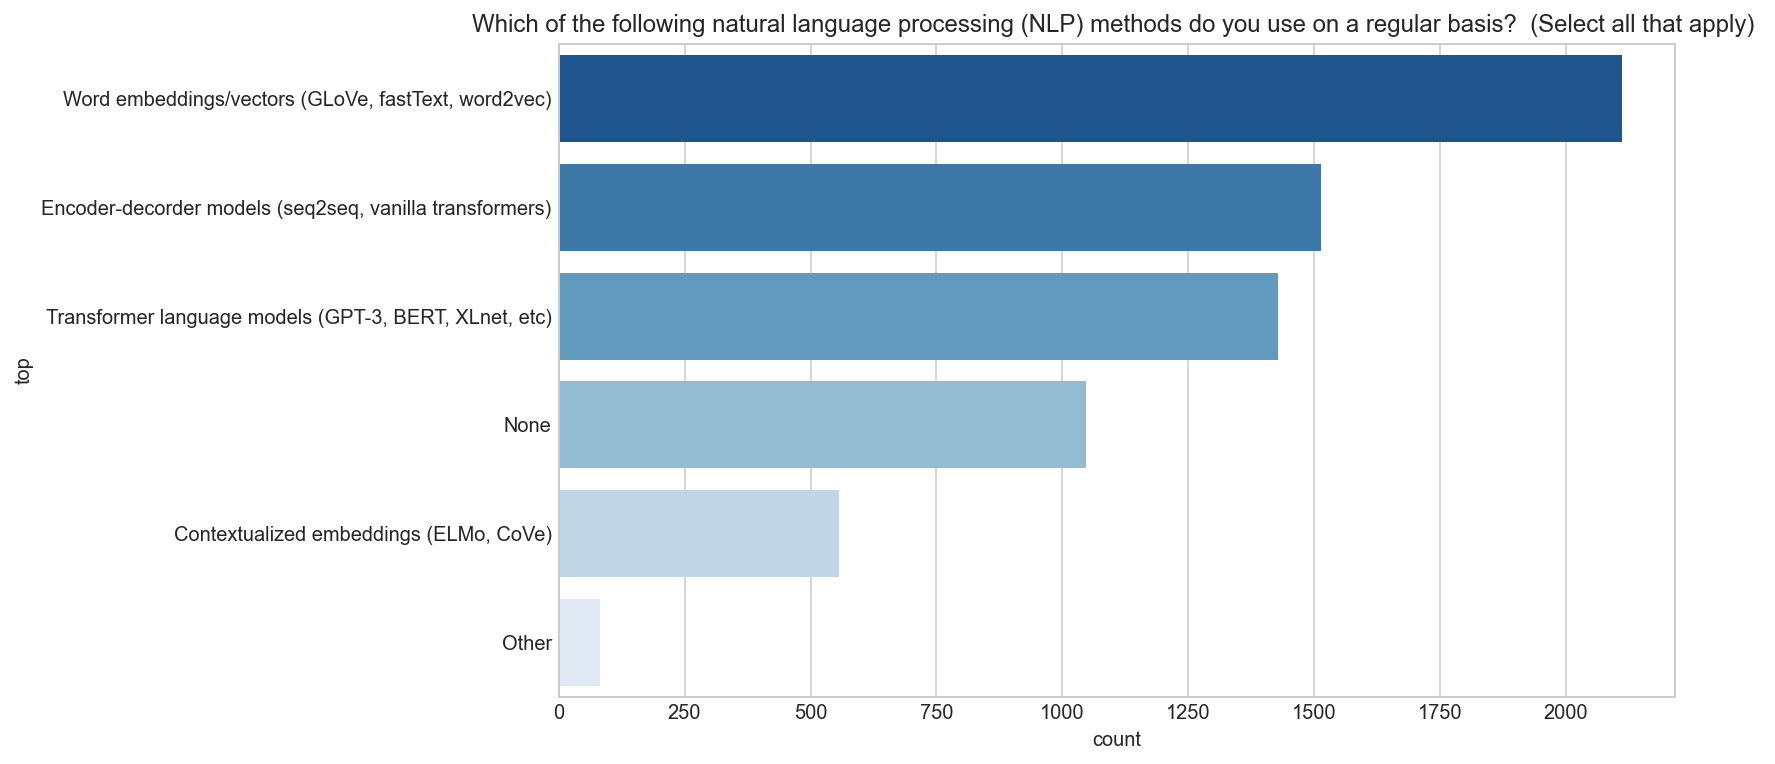

In [73]:
show_multiple_choice_bar_plot_by_qno("Q19")

## Q20 🏢 What is the size of the company where you are employed?

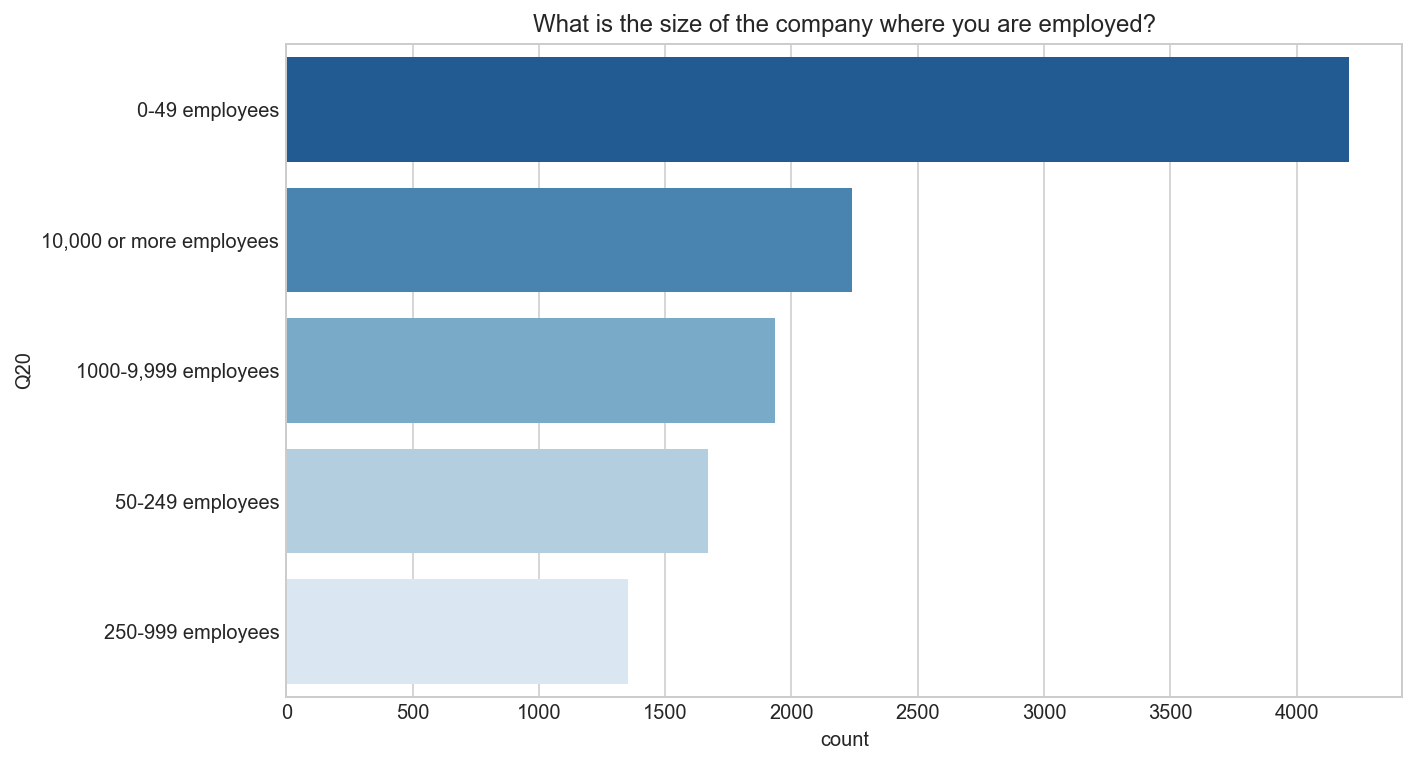

In [74]:
show_plot_by_qno("Q20")

## Q21 Approximately how many individuals are responsible for data science workloads at your place of business?

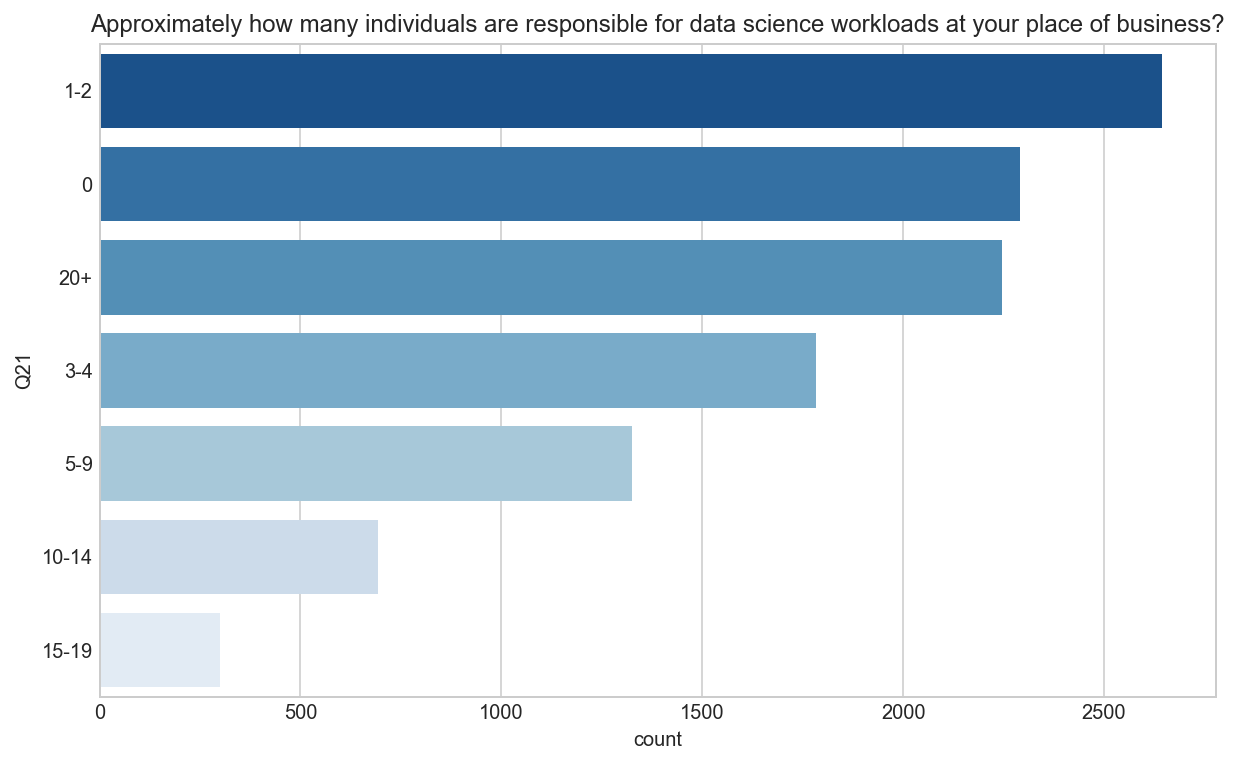

In [75]:
show_plot_by_qno("Q21")

## Q22 Does your current employer incorporate machine learning methods into their business?

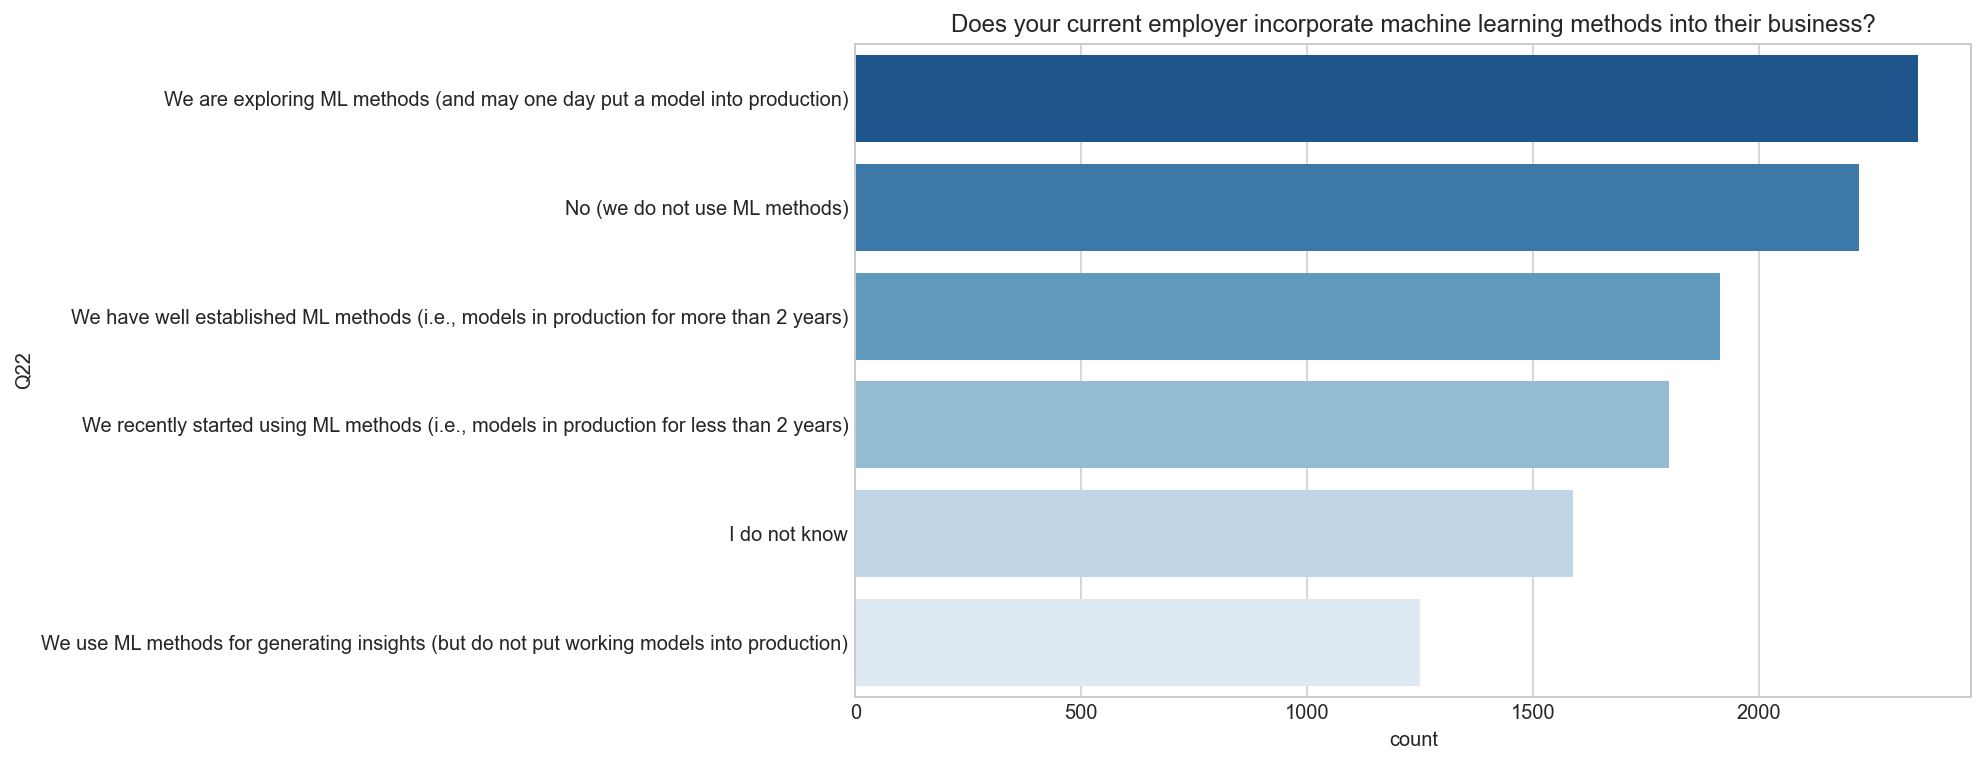

In [76]:
show_plot_by_qno("Q22")

## Q23 Select any activities that make up an important part of your role at work: (Select all that apply) 

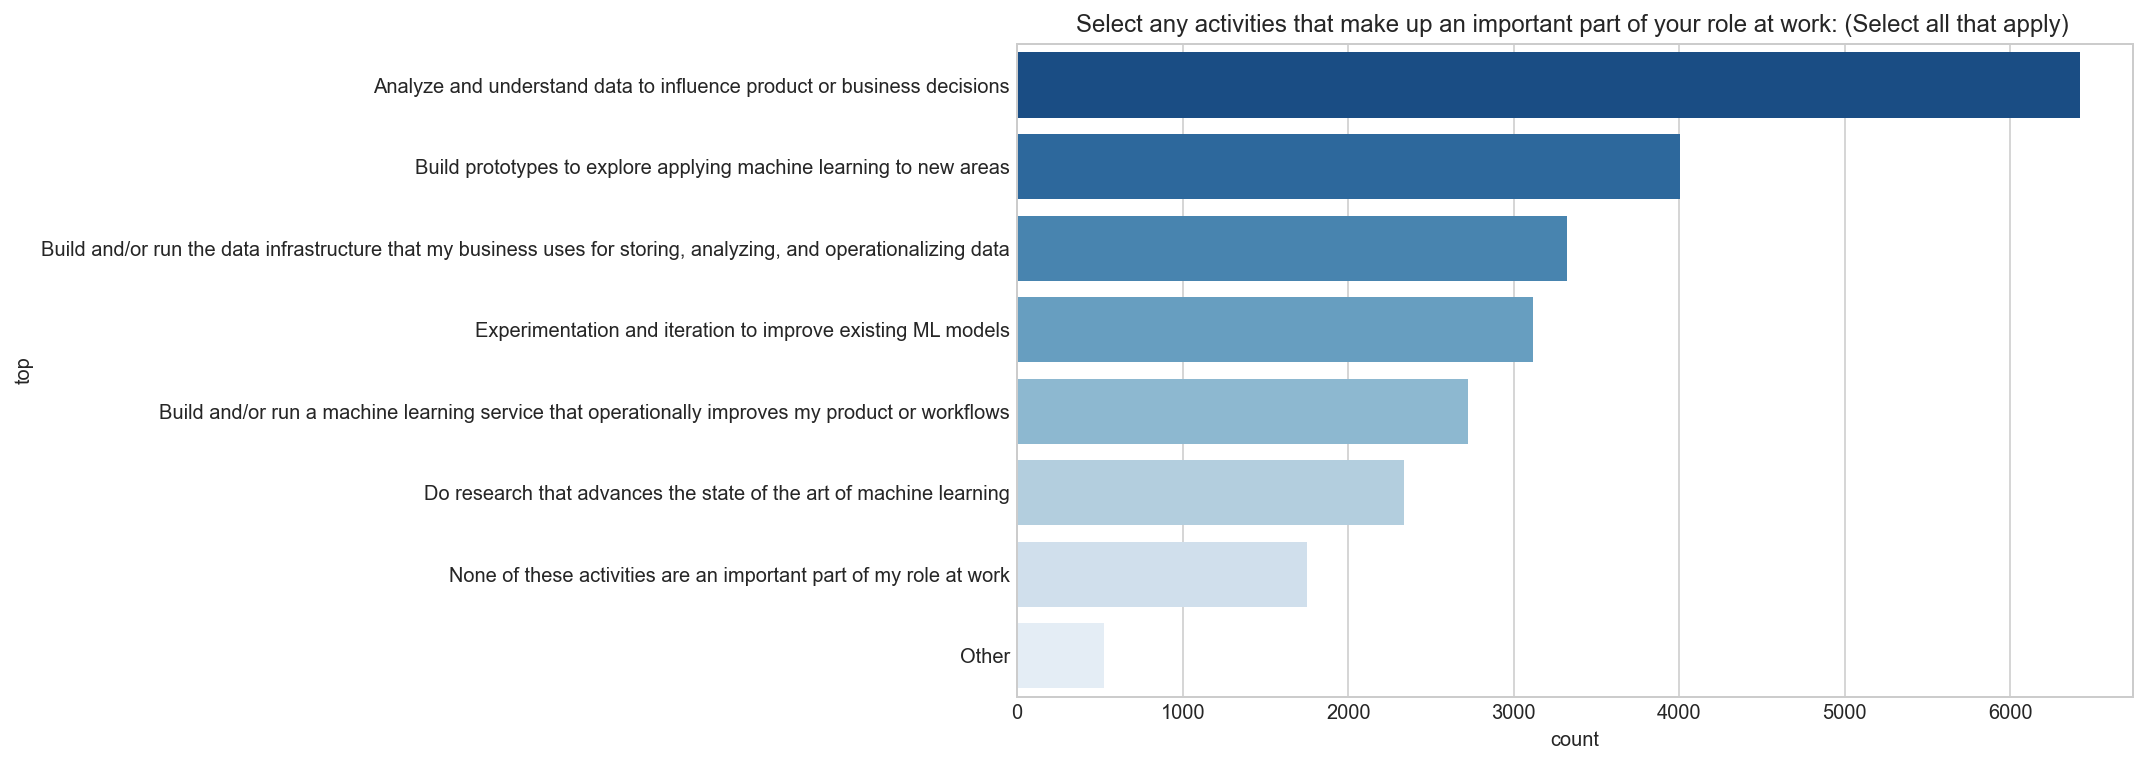

In [77]:
show_plot_by_qno("Q23")

## Q24 What is your current yearly compensation (approximate $USD)

In [78]:
df_q24 = answer["Q24"].value_counts().reset_index()
df_q24.columns = ["range", "count"]
df_q24

range  count
0            $0-999   2128
1     10,000-14,999    665
2       1,000-1,999    581
3   100,000-124,999    573
4     40,000-49,999    552
5     30,000-39,999    540
6     50,000-59,999    510
7       5,000-7,499    488
8     15,000-19,999    449
9     60,000-69,999    408
10    20,000-24,999    404
11    70,000-79,999    394
12      7,500-9,999    371
13  150,000-199,999    347
14      2,000-2,999    330
15  125,000-149,999    315
16    25,000-29,999    310
17    90,000-99,999    280
18      4,000-4,999    279
19    80,000-89,999    273
20      3,000-3,999    264
21  200,000-249,999    115
22  300,000-500,000     55
23       > $500,000     50
24  250,000-299,999     48

In [79]:
df_q24["min"] = df_q24["range"].str.split("-", expand=True)[0]
df_q24["max"] = df_q24["range"].str.split("-", expand=True)[1]
df_q24["min"] = df_q24["min"].str.replace("[\$|,|>]", "").astype(int)
df_q24 = df_q24.sort_values("min")
salary_index = df_q24["range"].tolist()

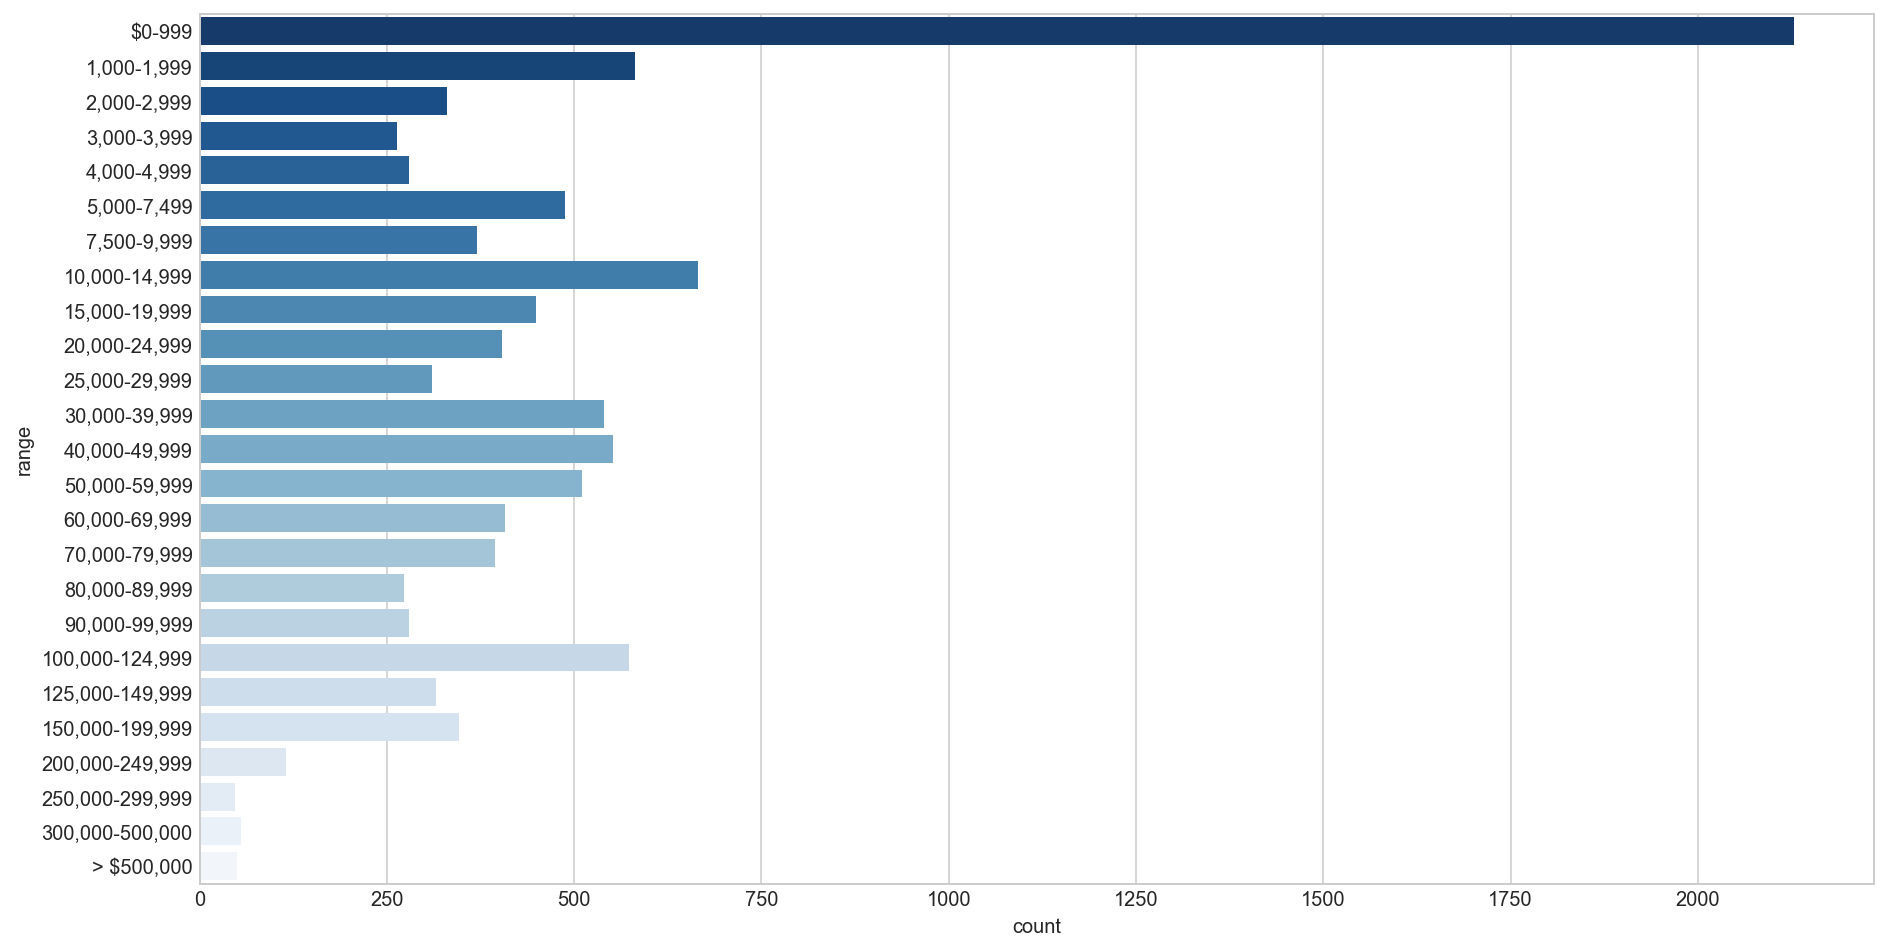

In [80]:
plt.figure(figsize=(15, 8))
sns.barplot(data=df_q24, x="count", y="range", palette="Blues_r")

Text(0.5, 1.0, 'What is your current yearly compensation (approximate $USD)?')

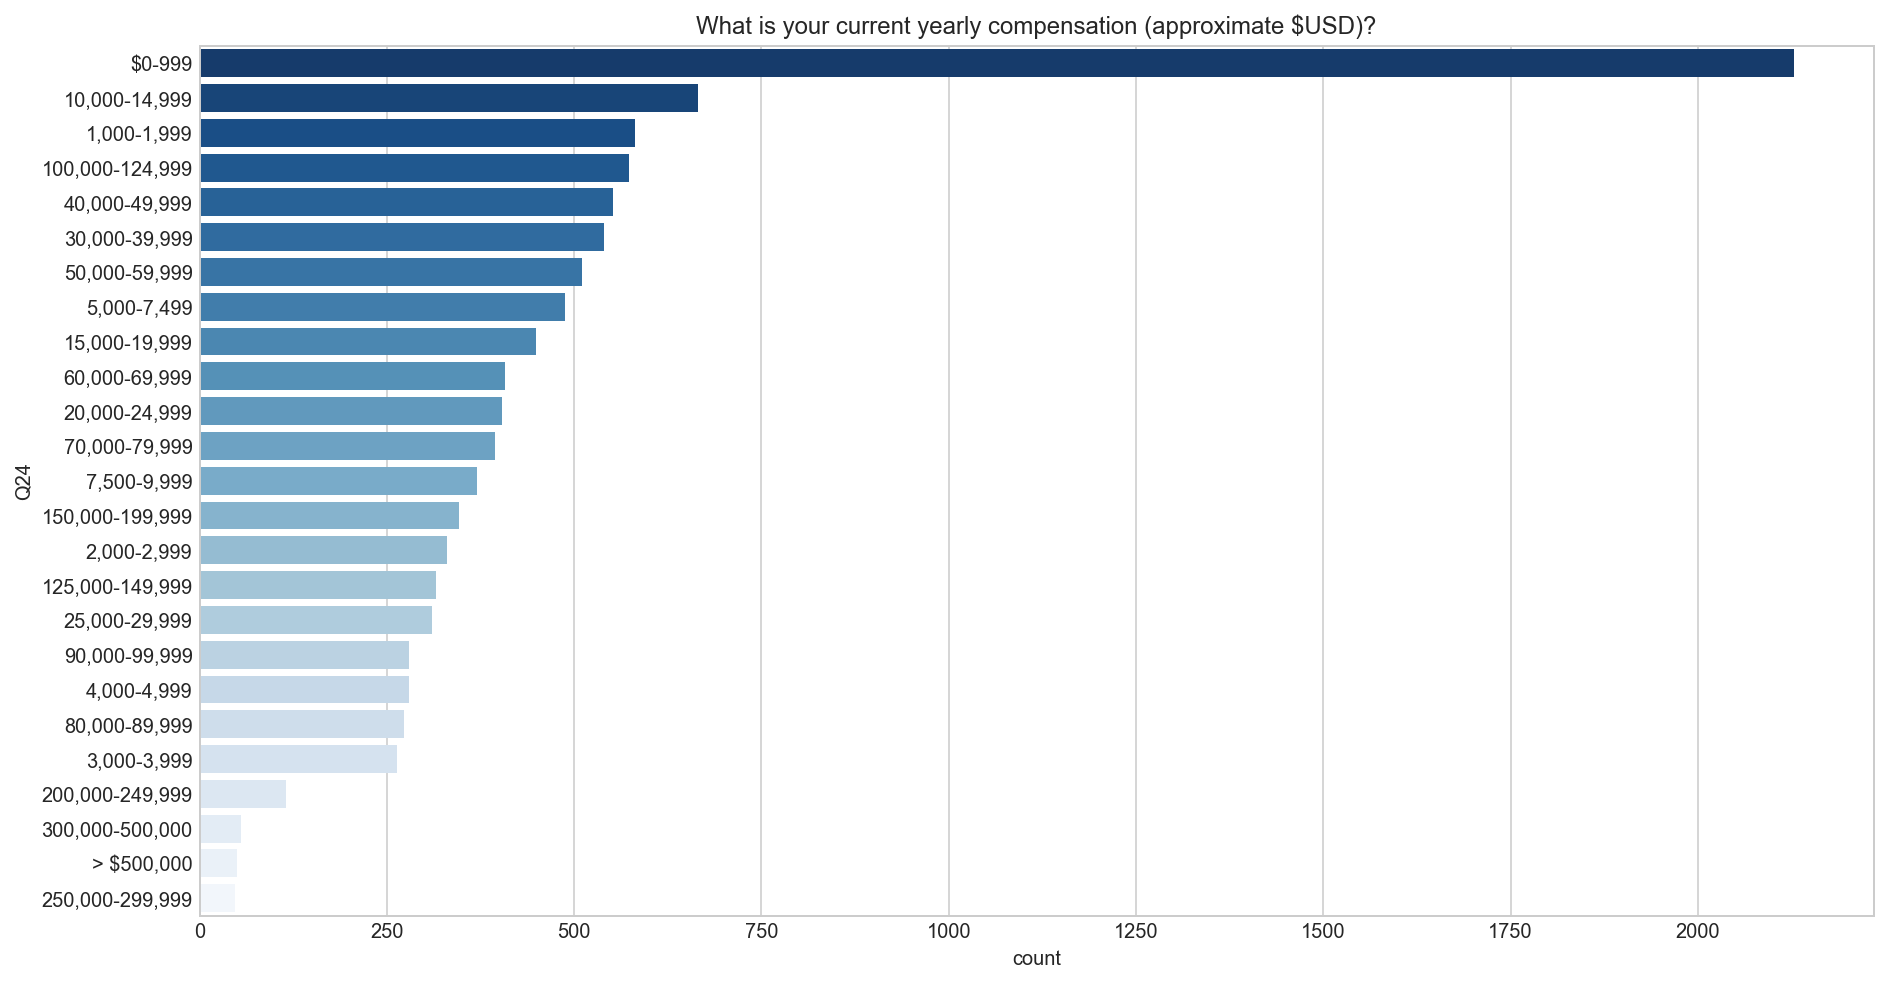

In [81]:
question_no = "Q24"
plt.figure(figsize=(15, 8))
sns.countplot(data=answer, y=question_no, 
              order=answer[question_no].value_counts().index,
              palette="Blues_r"
             ).set_title(get_question_title_by_qno(question_no))

### Q24 & Q3

In [82]:
q3_top = answer["Q3"].value_counts().head(10)
q3_top.index

Index(['India', 'United States of America', 'Other', 'Brazil', 'Japan',
       'Russia', 'United Kingdom of Great Britain and Northern Ireland',
       'Nigeria', 'China', 'Germany'],
      dtype='object')

In [83]:
q3_q24 = pd.crosstab(answer.loc[answer["Q3"].isin(q3_top.index), "Q3"], 
                     answer["Q24"])
q3_q24 = q3_q24[salary_index]
q3_q24

Q24                                                 $0-999  1,000-1,999  \
Q3                                                                        
Brazil                                                  66           43   
China                                                   43            7   
Germany                                                 20            2   
India                                                  681          140   
Japan                                                   59           10   
Nigeria                                                136           23   
Other                                                  178           63   
Russia                                                  73           26   
United Kingdom of Great Britain and Northern Ir...      23            2   
United States of America                               102           10   

Q24                                                 2,000-2,999  3,000-3,999  \
Q3                                                                             
Brazil                                                       27           14   
China                                                         7            8   
Germany                                                       4            6   
India                                                        71           65   
Japan                                                         4           11   
Nigeria                                                      22           13   
Other                                                        31           20   
Russia                                                       15            6   
United Kingdom of Great Britain and Northern Ir...            1            1   
United States of America                                      4            3   

Q24                                                 4,000-4,999  5,000-7,499  \
Q3                                                                             
Brazil                                                       12           21   
China                                                         2            5   
Germany                                                       2            0   
India                                                       124          216   
Japan                                                        14           27   
Nigeria                                                       9           14   
Other                                                        20           42   
Russia                                                        3           20   
United Kingdom of Great Britain and Northern Ir...            0            1   
United States of America                                      2            7   

Q24                                                 7,500-9,999  \
Q3                                                                
Brazil                                                       21   
China                                                         9   
Germany                                                       0   
India                                                       147   
Japan                                                        13   
Nigeria                                                       5   
Other                                                        29   
Russia                                                       17   
United Kingdom of Great Britain and Northern Ir...            1   
United States of America                                      3   

Q24                                                 10,000-14,999  \
Q3                                                                  
Brazil                                                         42   
China                                                          11   
Germany                                                         4   
India                      

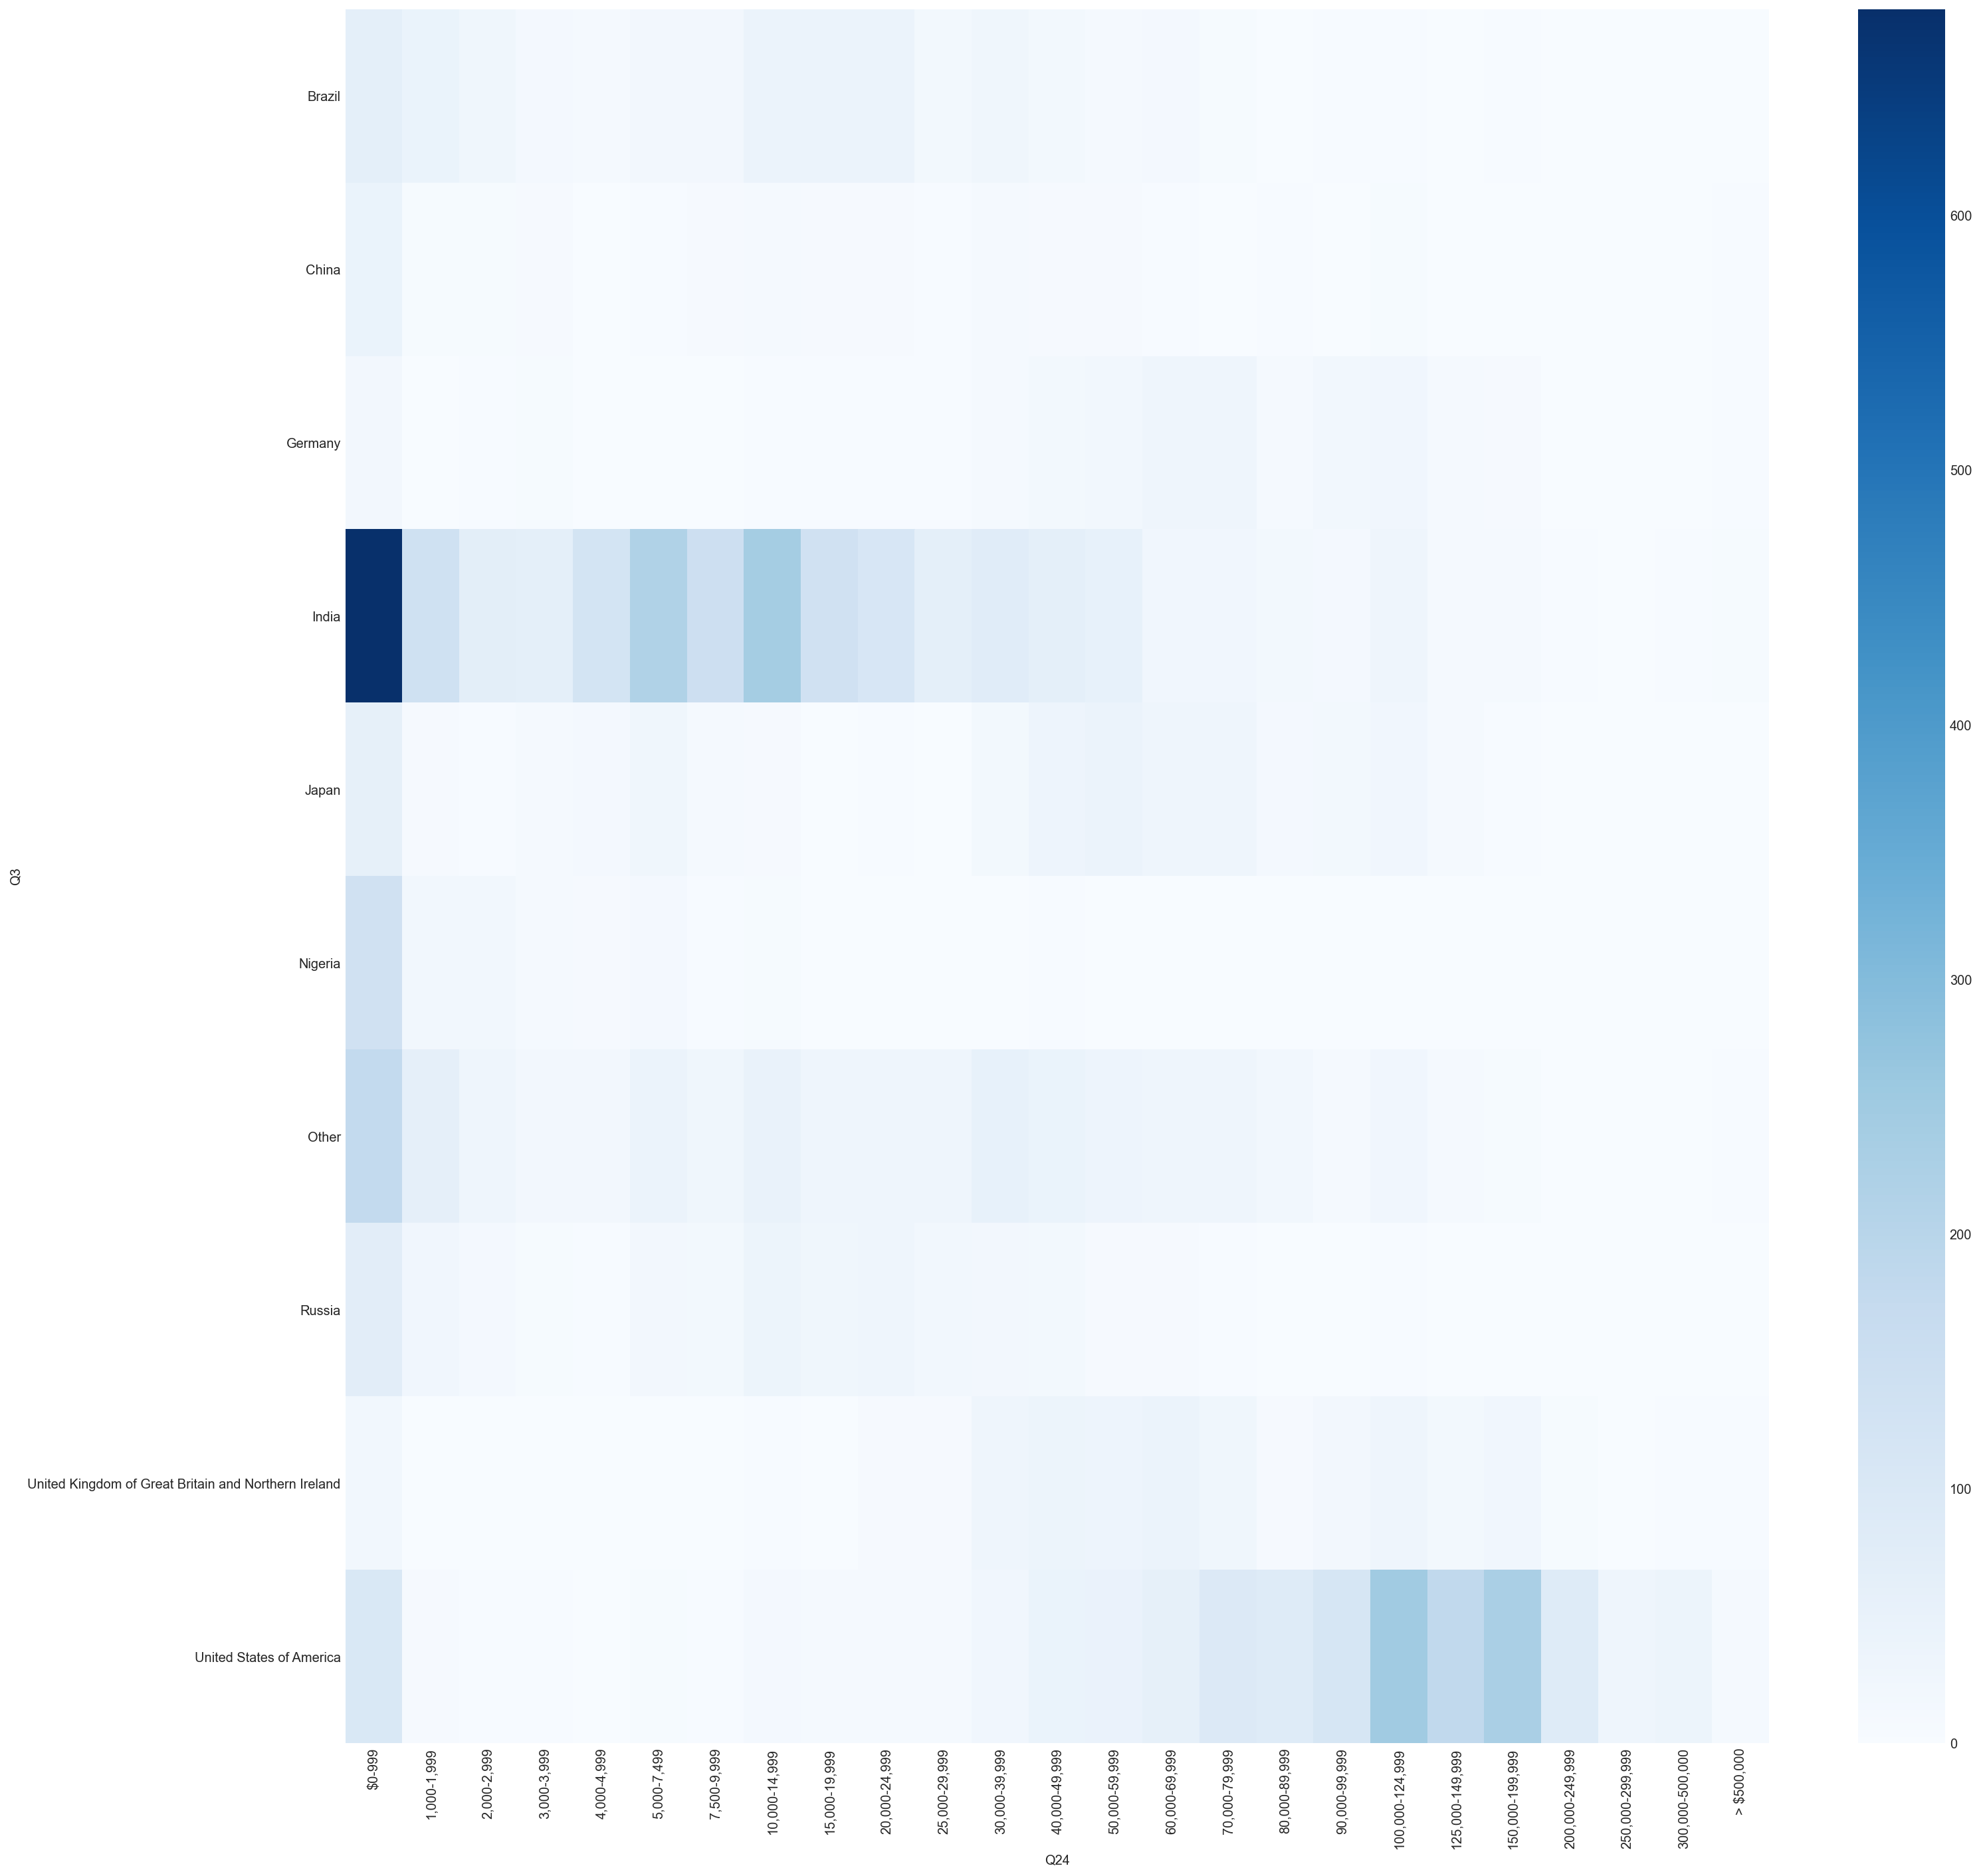

In [84]:
plt.figure(figsize=(24, 24))
sns.heatmap(q3_q24, cmap="Blues")

## Q25 Approximately how much money have you (or your team) spent on machine learning and/or cloud computing services at home (or at work) in the past 5 years (approximate $USD)?

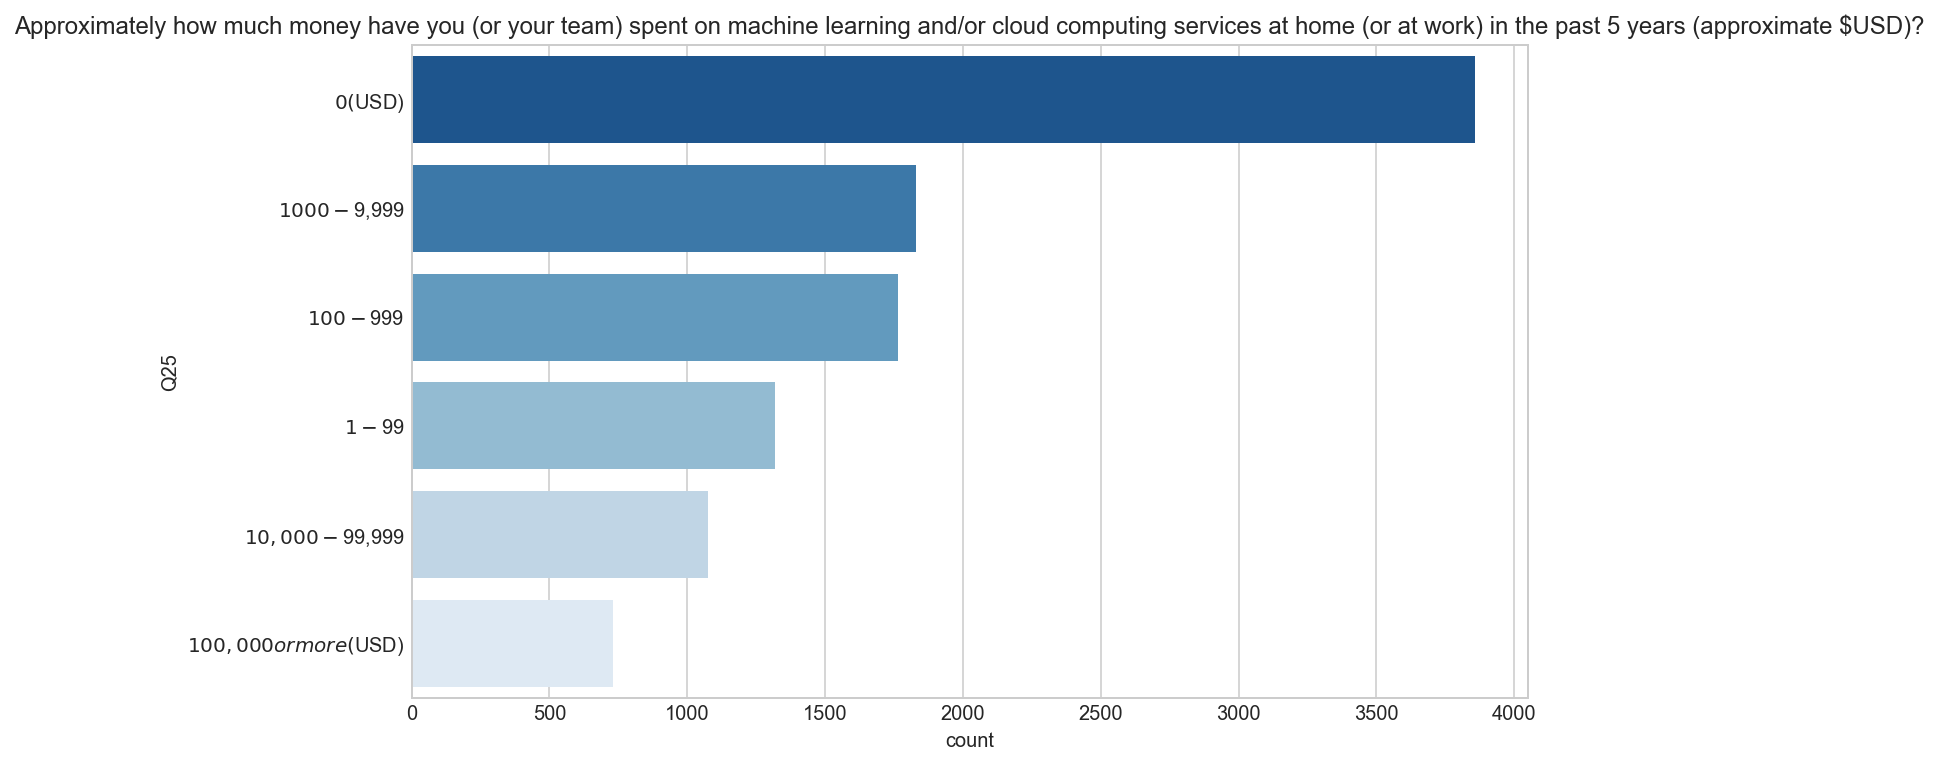

In [85]:
show_plot_by_qno("Q25")

## Q26 cloud computing platforms
### Q26_A Which of the following cloud computing platforms do you use on a regular basis? (Select all that apply)

In [86]:
question_no = "Q26_A"
q26_count = get_multiple_choice_answer_by_qno(question_no)
q26_count

count
top                                
 Amazon Web Services (AWS)     2806
 Google Cloud Platform (GCP)   2286
None                           1837
 Microsoft Azure               1705
 IBM Cloud / Red Hat            441
 Oracle Cloud                   286
 VMware Cloud                   248
Other                           245
 Salesforce Cloud               192
 SAP Cloud                      169
 Alibaba Cloud                  115
 Tencent Cloud                   76

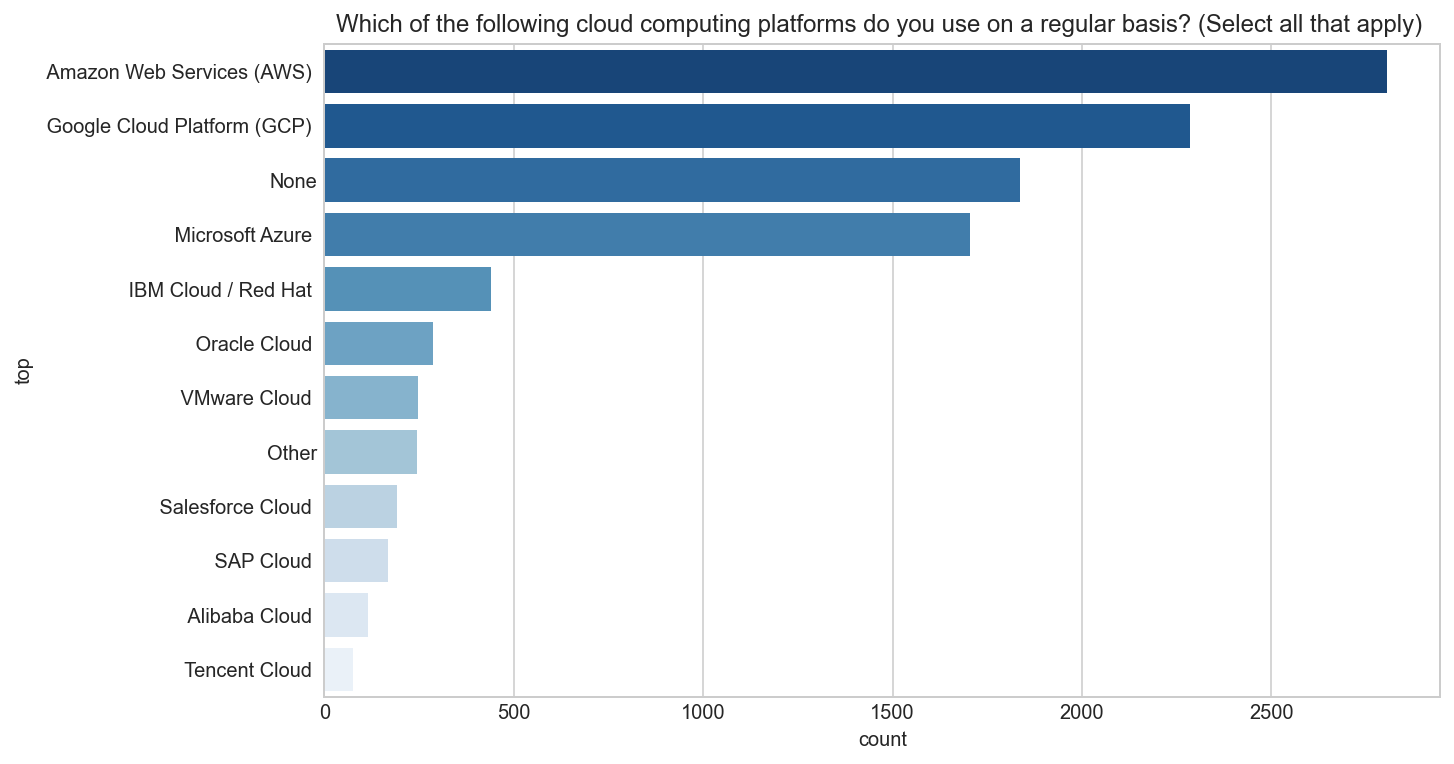

In [87]:
show_plot_by_qno("Q26_A")

### Q26_B Which of the following cloud computing platforms do you hope to become more familiar with in the next 2 years?

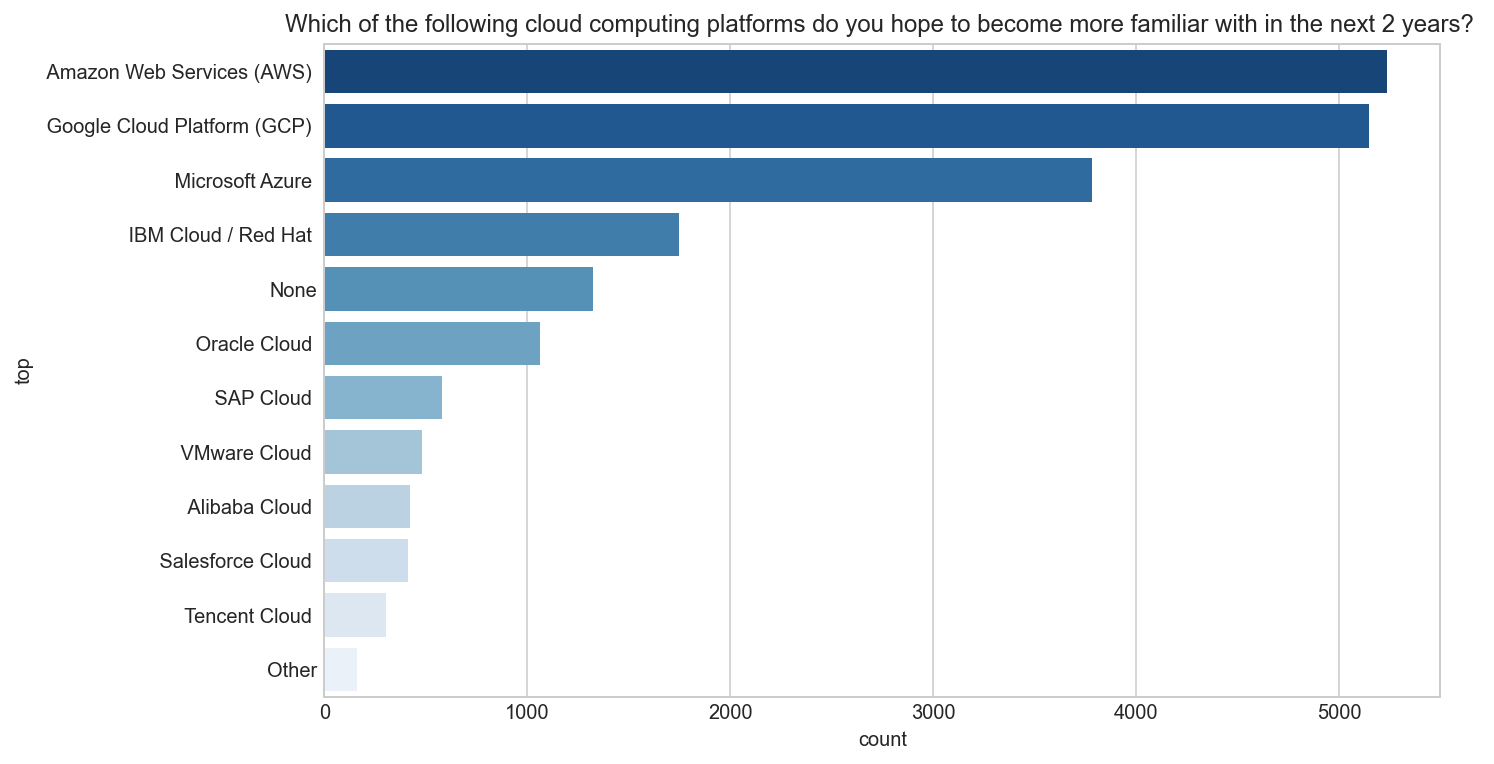

In [88]:
show_plot_by_qno("Q26_B")

In [89]:
question_no = "Q26_B"
q26b_count = get_multiple_choice_answer_by_qno(question_no)
q26b_count

count
top                                
 Amazon Web Services (AWS)     5236
 Google Cloud Platform (GCP)   5146
 Microsoft Azure               3779
 IBM Cloud / Red Hat           1746
None                           1324
 Oracle Cloud                  1060
 SAP Cloud                      579
 VMware Cloud                   481
 Alibaba Cloud                  424
 Salesforce Cloud               414
 Tencent Cloud                  304
Other                           163

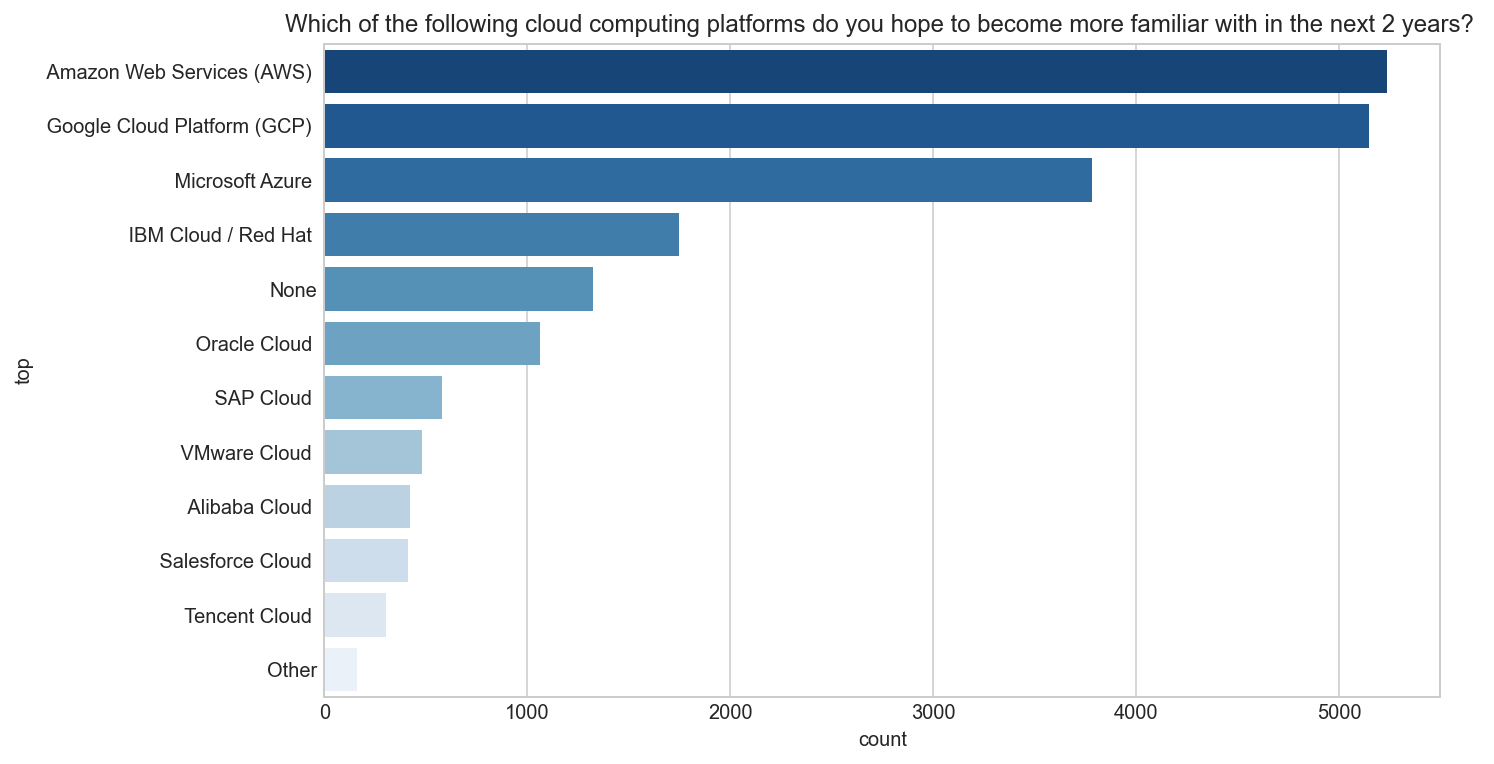

In [90]:
show_plot_by_qno("Q26_B")

## Q27 cloud computing products

### Q27_A Do you use any of the following cloud computing products on a regular basis? (Select all that apply)

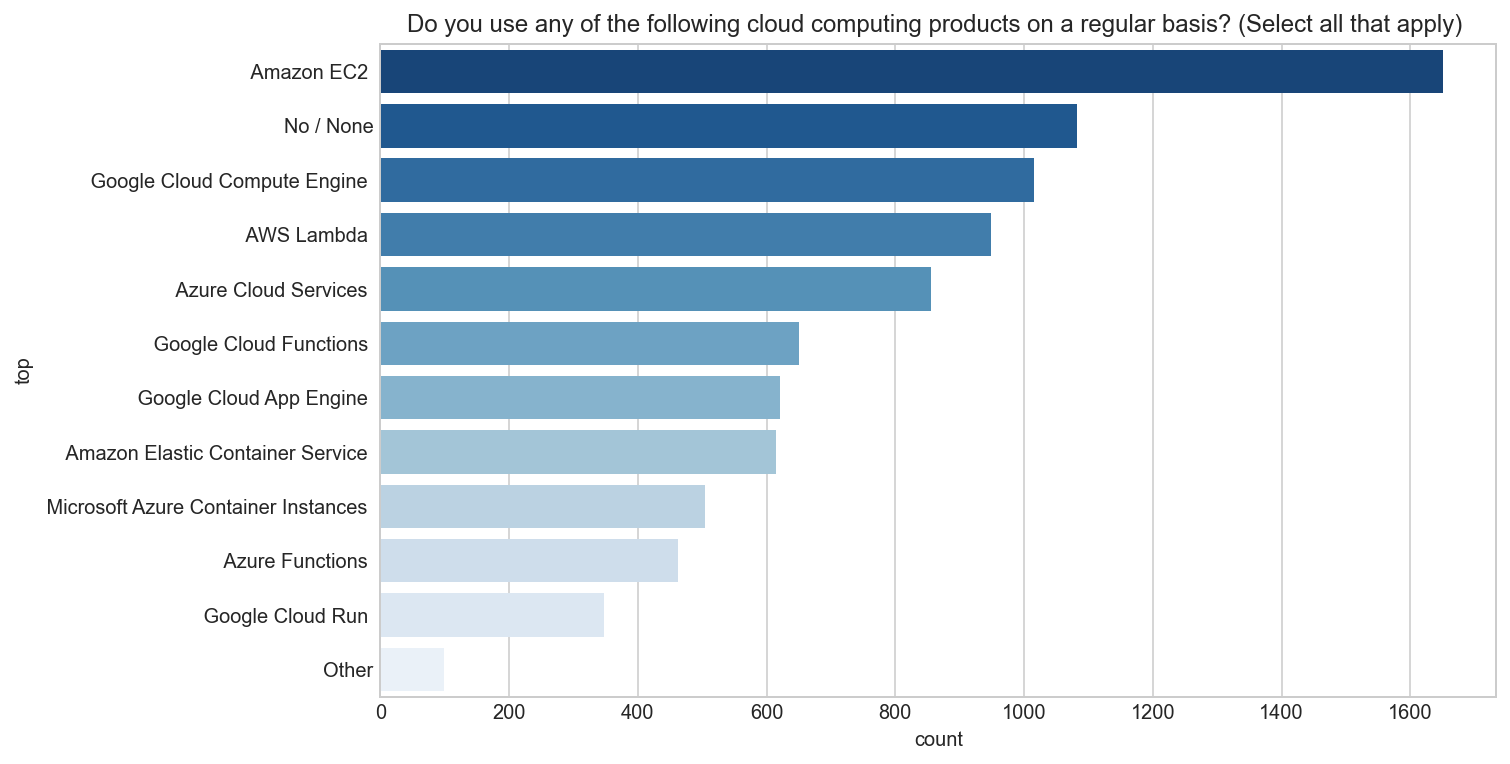

In [91]:
show_plot_by_qno("Q27_A")

### Q27_B In the next 2 years, do you hope to become more familiar with any of these specific cloud computing products? (Select all that apply)

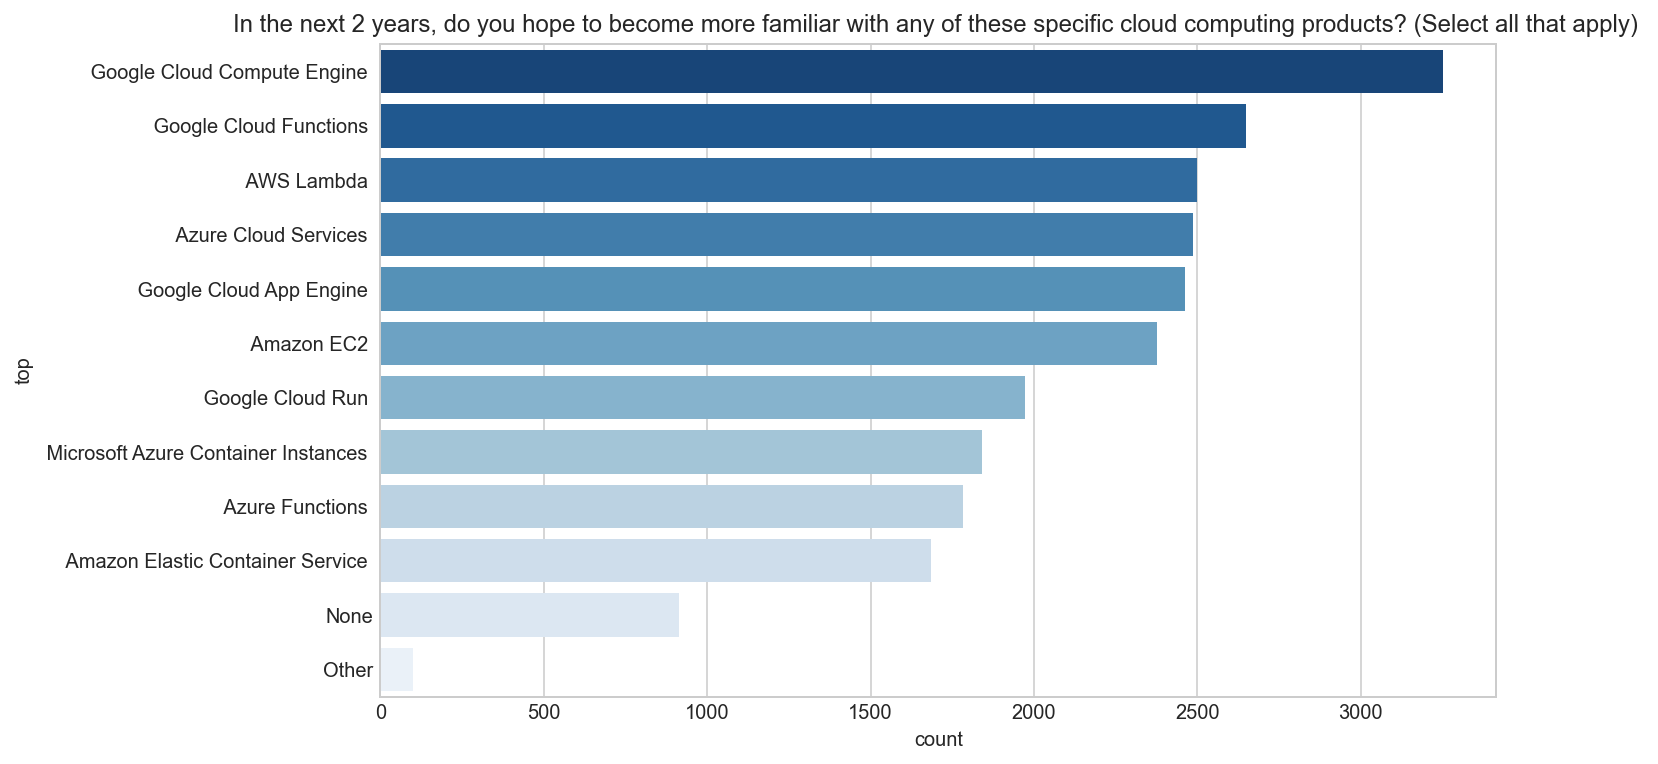

In [92]:
show_plot_by_qno("Q27_B")

## Q28 machine learning products 
### Q28_A Do you use any of the following machine learning products on a regular basis? (Select all that apply)

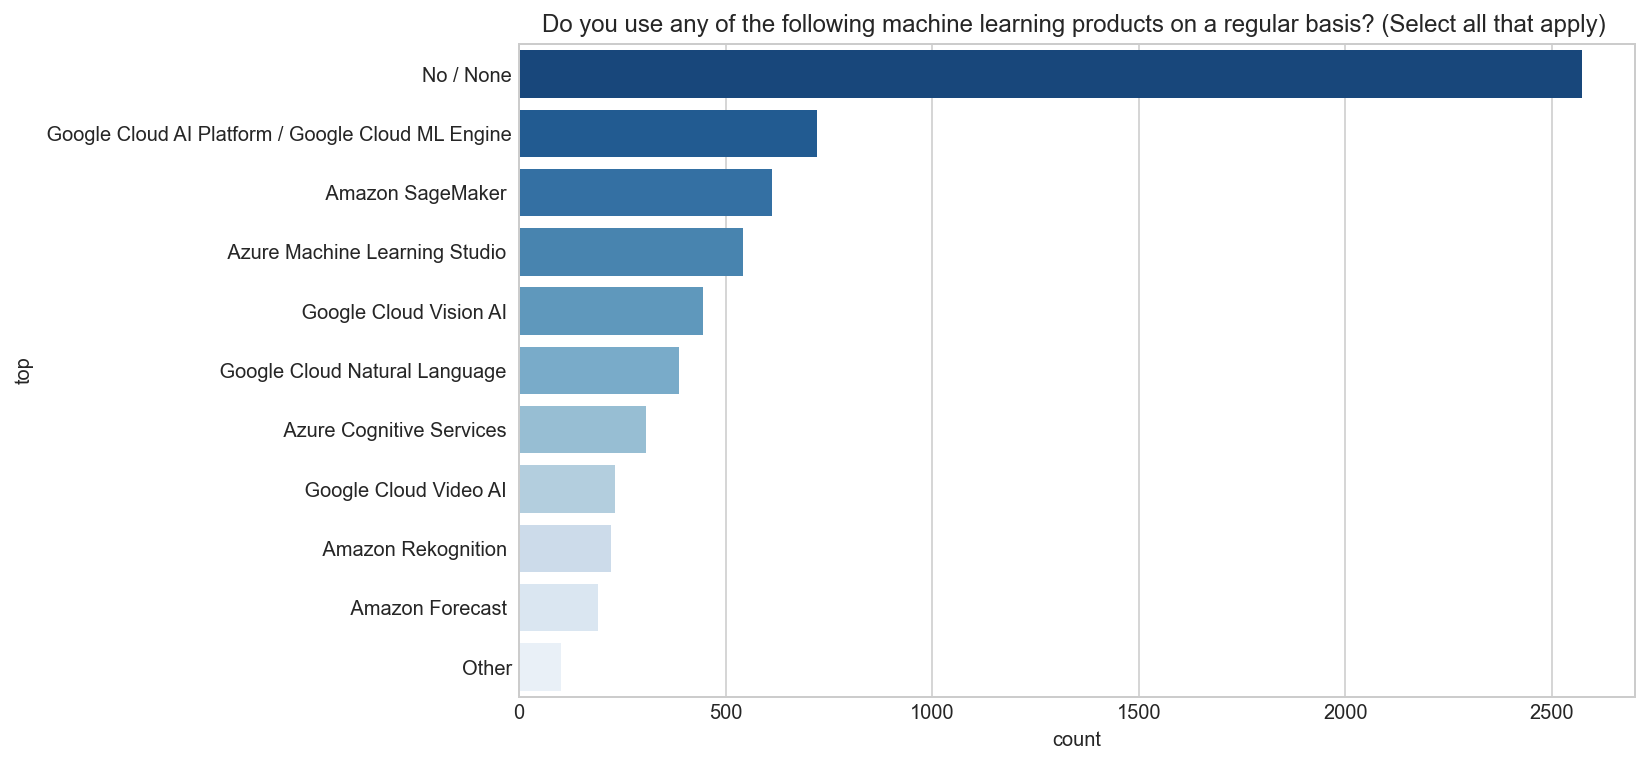

In [93]:
show_plot_by_qno("Q28_A")

### Q28_B In the next 2 years, do you hope to become more familiar with any of these specific machine learning products? (Select all that apply) 

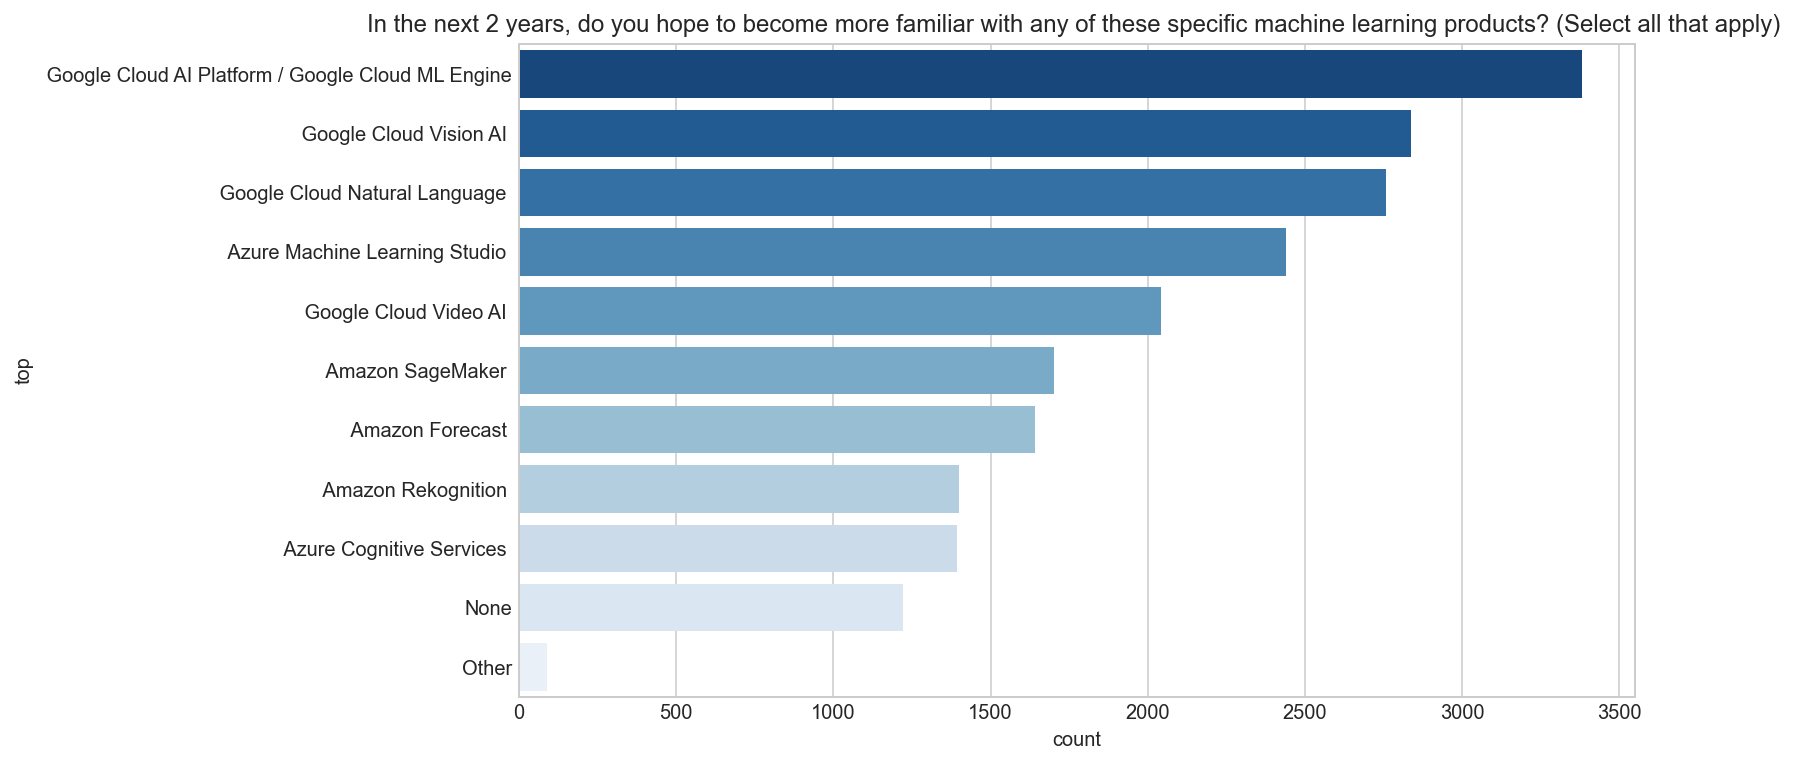

In [94]:
show_plot_by_qno("Q28_B")

## Q29  big data products

### Q29_A Which of the following big data products (relational databases, data warehouses, data lakes, or similar) do you use on a regular basis? (Select all that apply) 

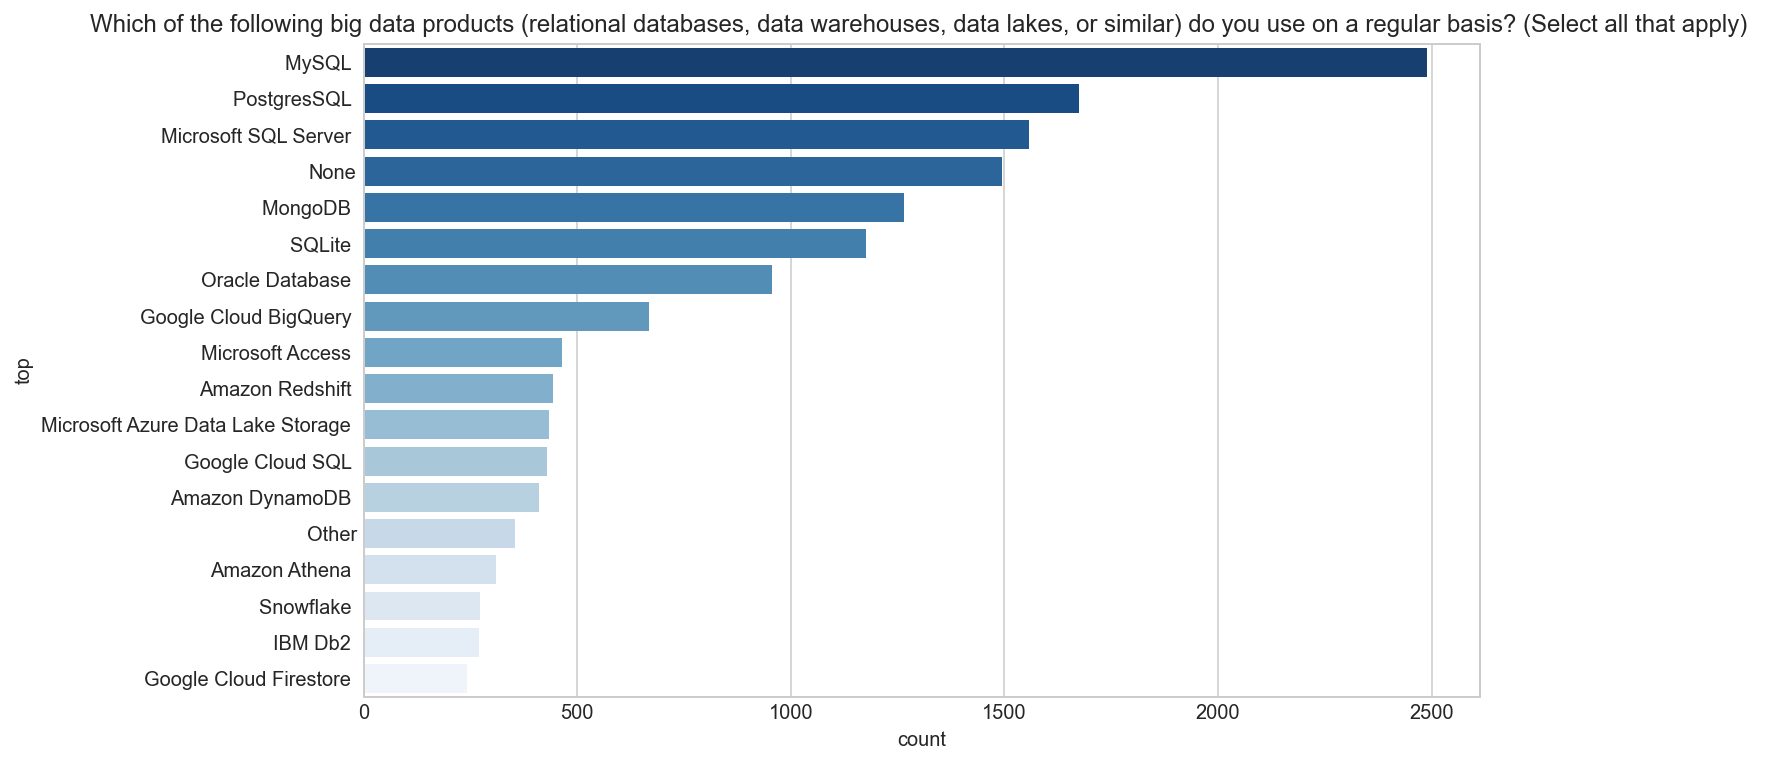

In [95]:
show_plot_by_qno("Q29_A")

### Q29_B Which of the following big data products (relational databases, data warehouses, data lakes, or similar) do you hope to become more familiar with in the next 2 years? (Select all that apply)

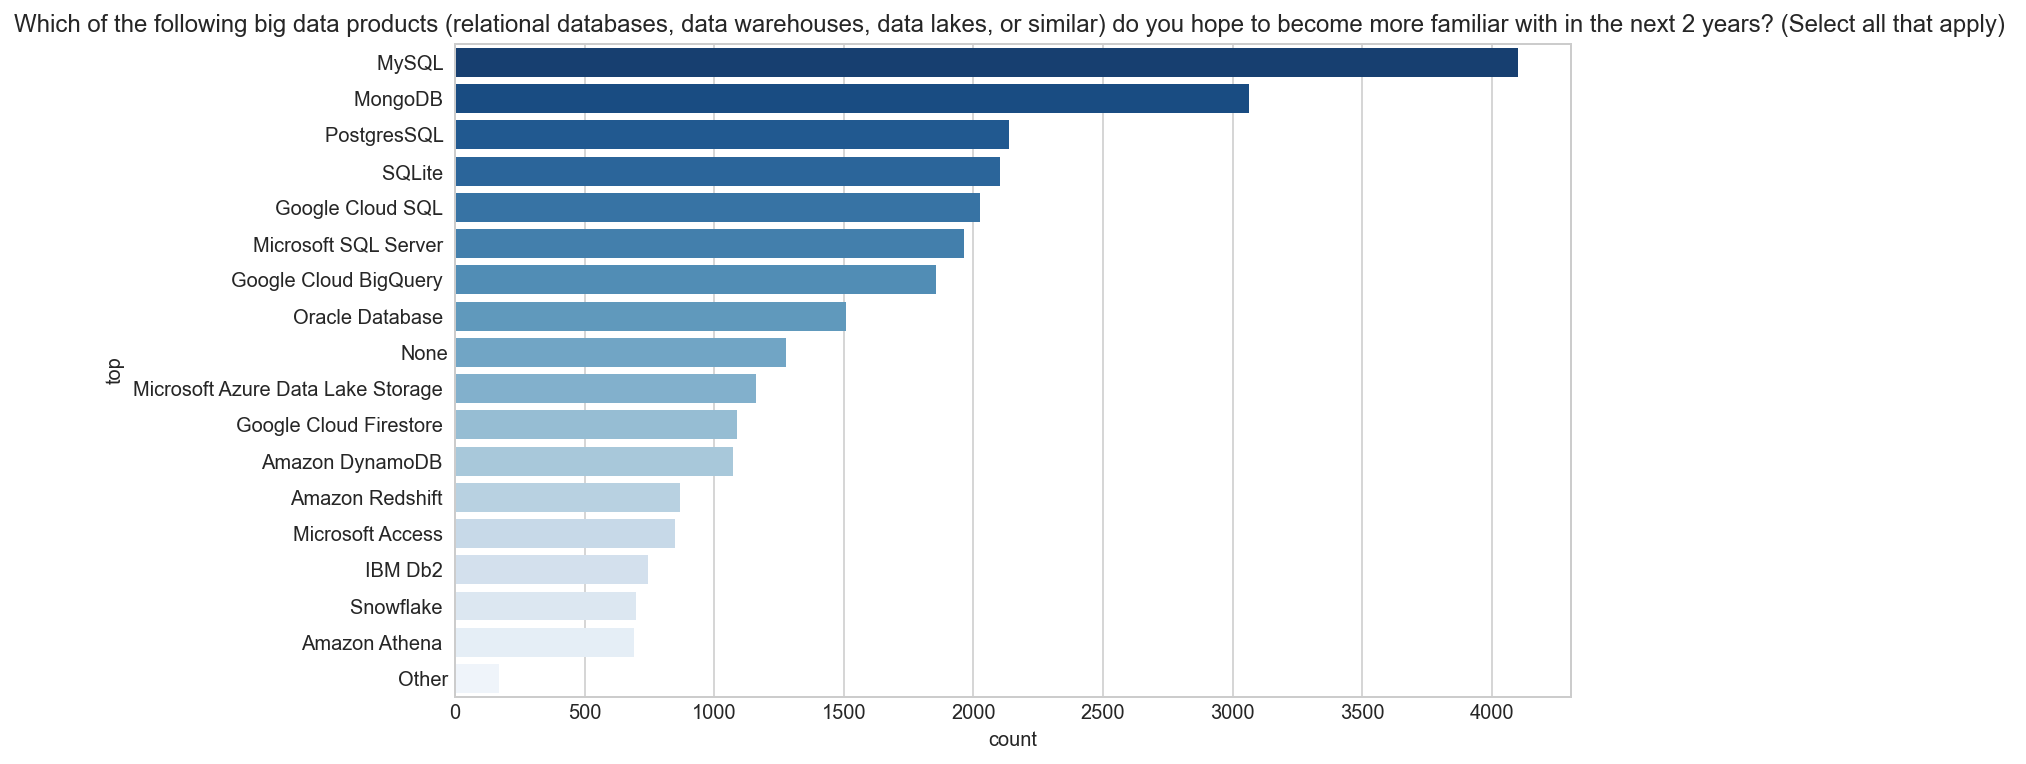

In [96]:
show_plot_by_qno("Q29_B")

## Q30 Which of the following big data products (relational database, data warehouse, data lake, or similar) do you use most often? - Selected Choice

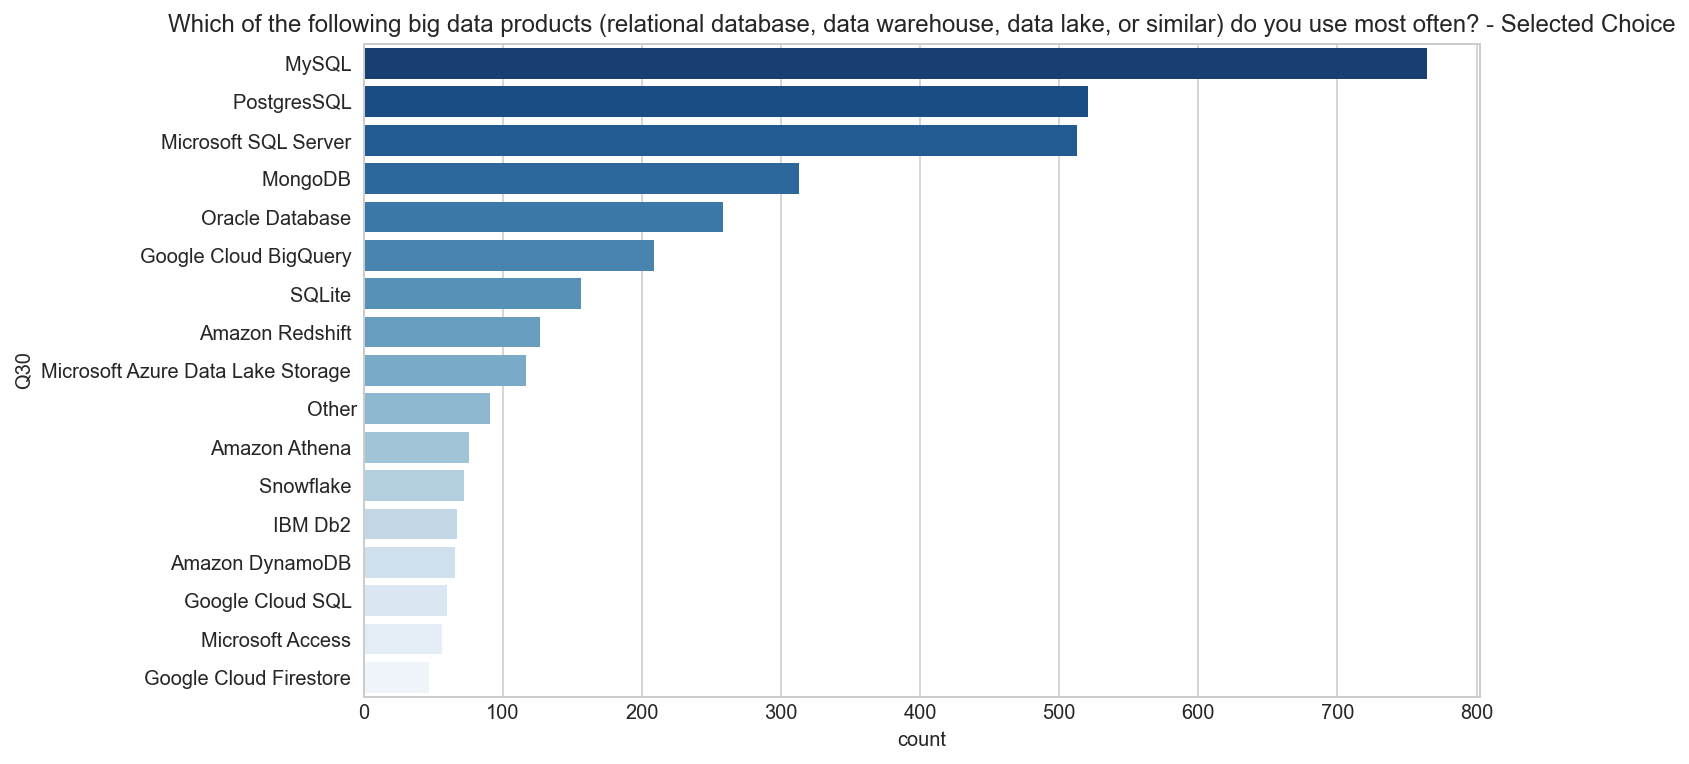

In [97]:
show_plot_by_qno("Q30")

## Q31 business intelligence tools

### Q31_A Which of the following business intelligence tools do you use on a regular basis? (Select all that apply)

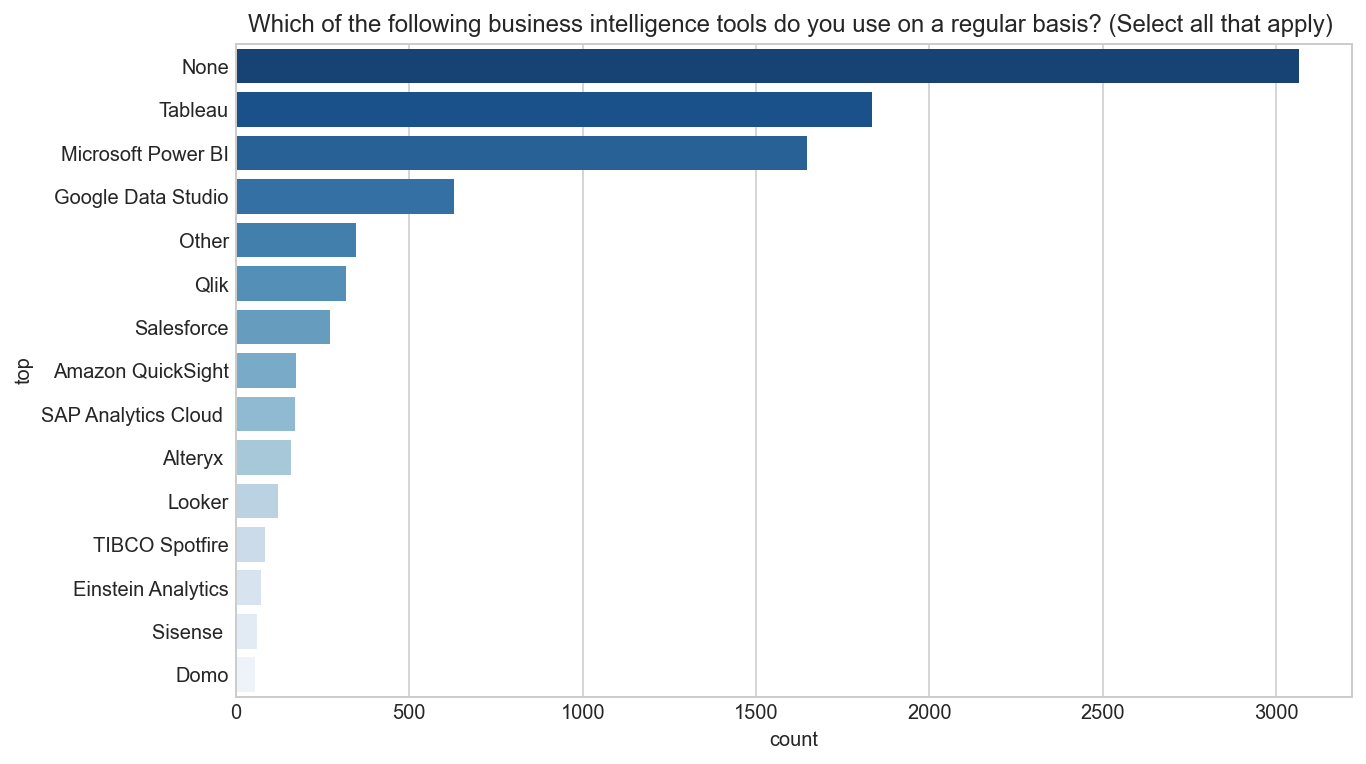

In [98]:
show_plot_by_qno("Q31_A")

### Q31_B Which of the following business intelligence tools do you hope to become more familiar with in the next 2 years? (Select all that apply)

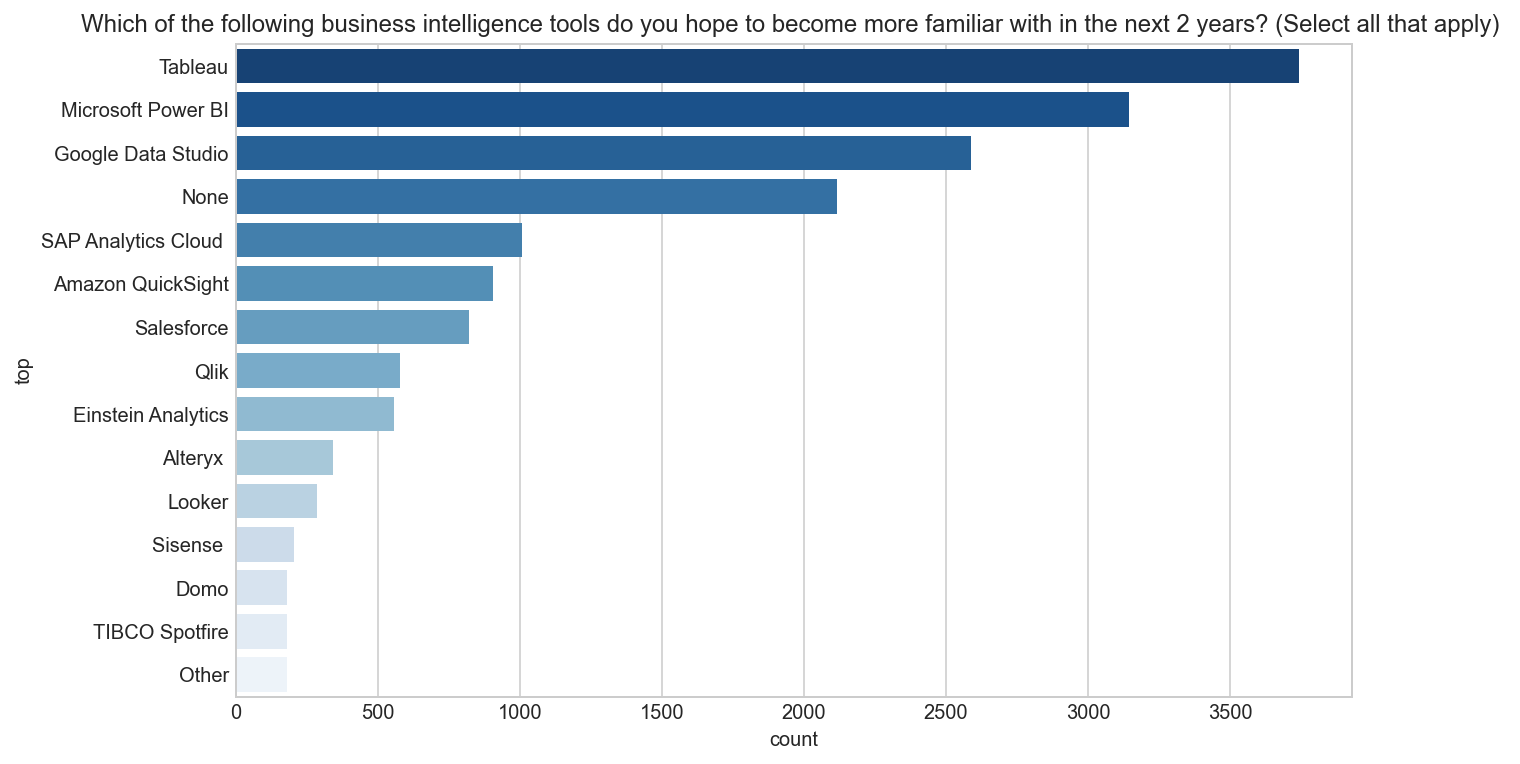

In [99]:
show_plot_by_qno("Q31_B")

## Q32 Which of the following business intelligence tools do you use most often? - Selected Choice

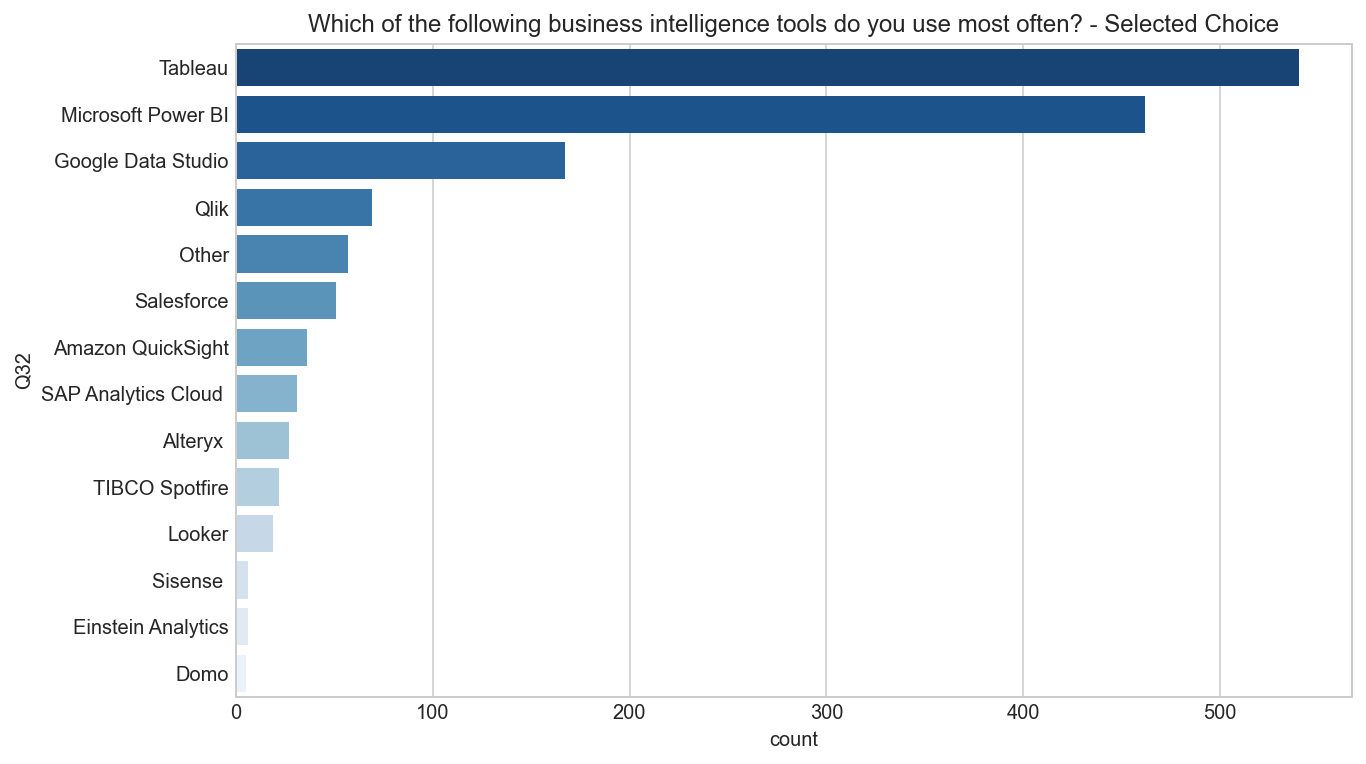

In [100]:
show_plot_by_qno("Q32")

## Q33 automated machine learning tools (or partial AutoML tools)
### Q33_A Do you use any automated machine learning tools (or partial AutoML tools) on a regular basis?  (Select all that apply)

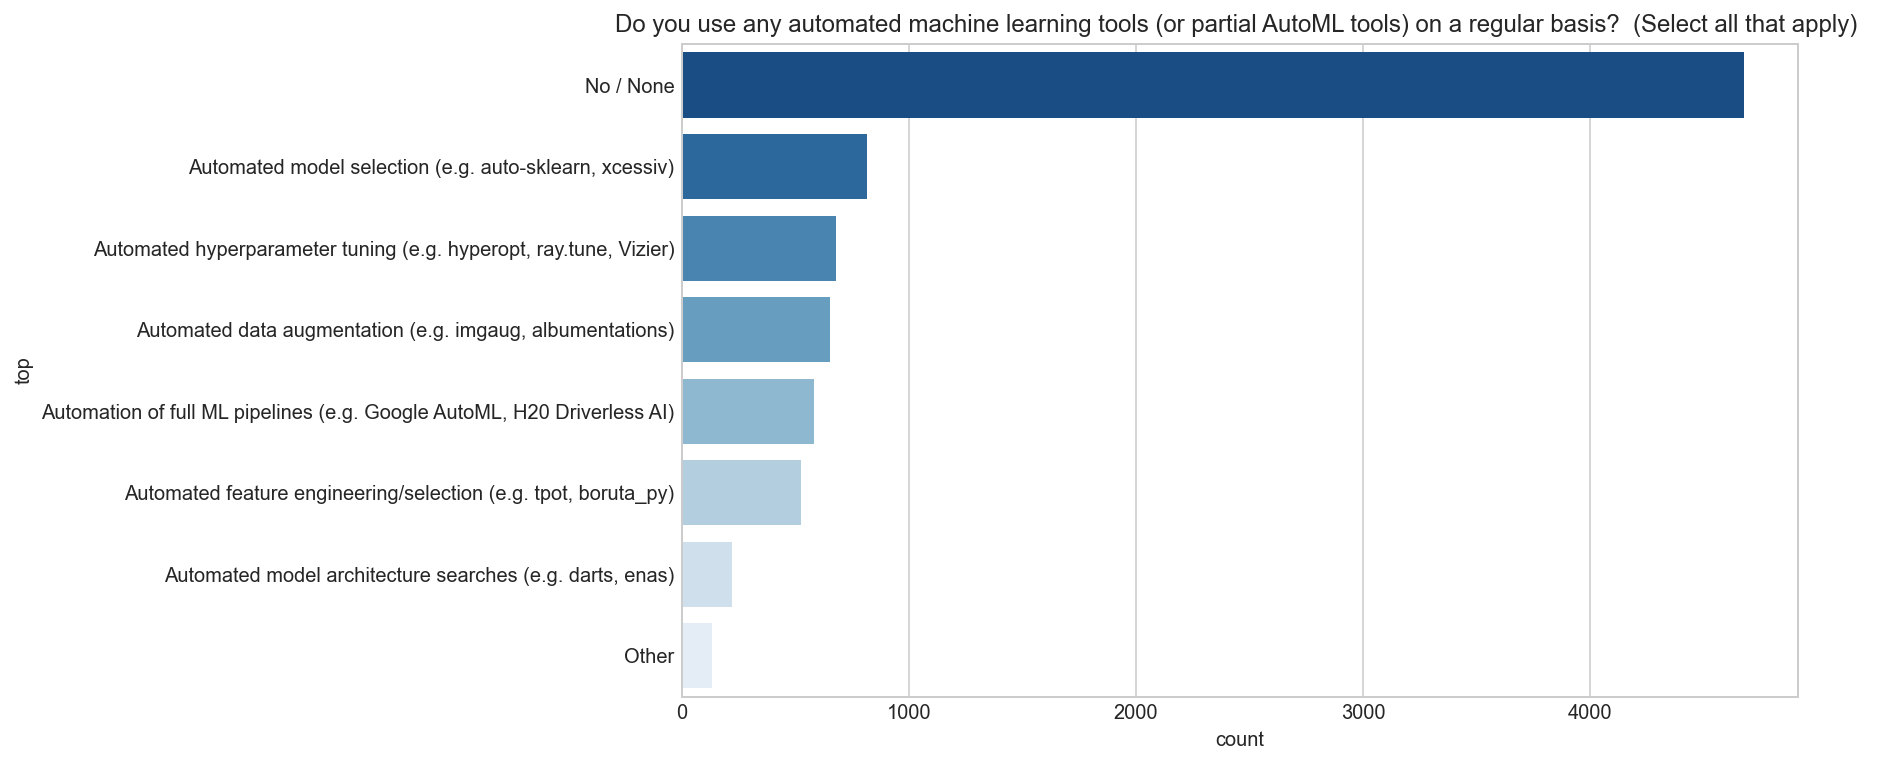

In [101]:
show_plot_by_qno("Q33_A")

### Q33_B Which categories of automated machine learning tools (or partial AutoML tools) do you hope to become more familiar with in the next 2 years?  (Select all that apply)

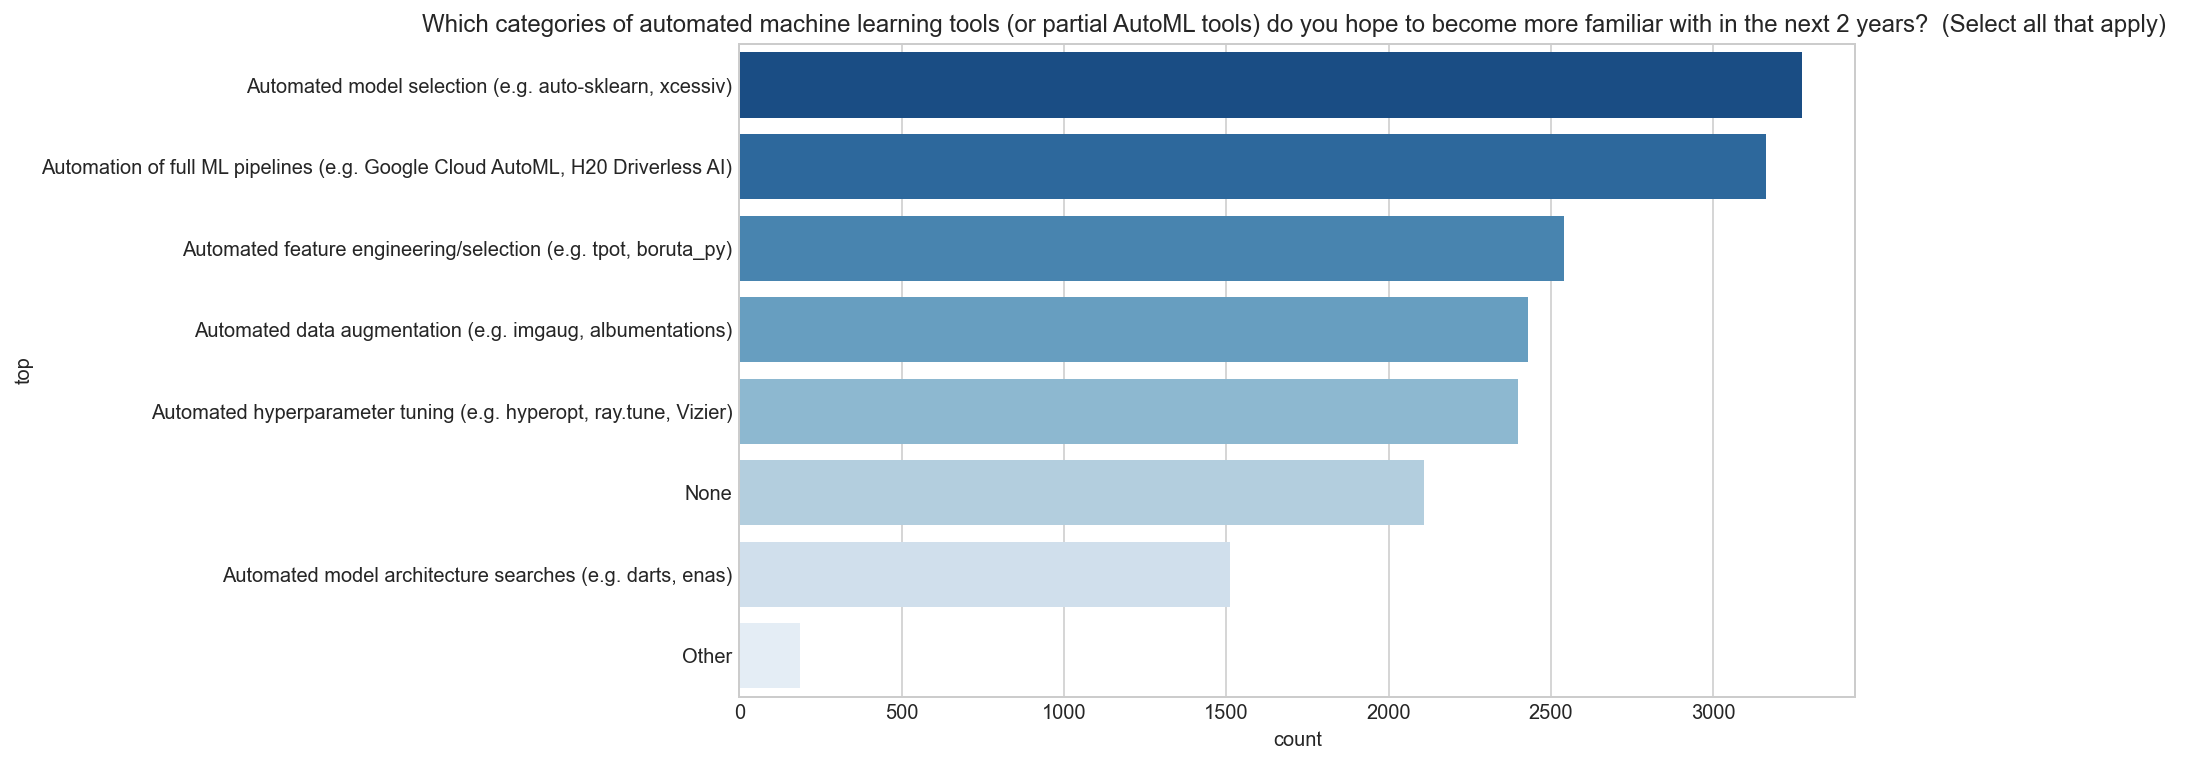

In [102]:
show_plot_by_qno("Q33_B")

## Q34 automated machine learning tools (or partial AutoML tools)
### Q34_A Which of the following automated machine learning tools (or partial AutoML tools) do you use on a regular basis?  (Select all that apply) 

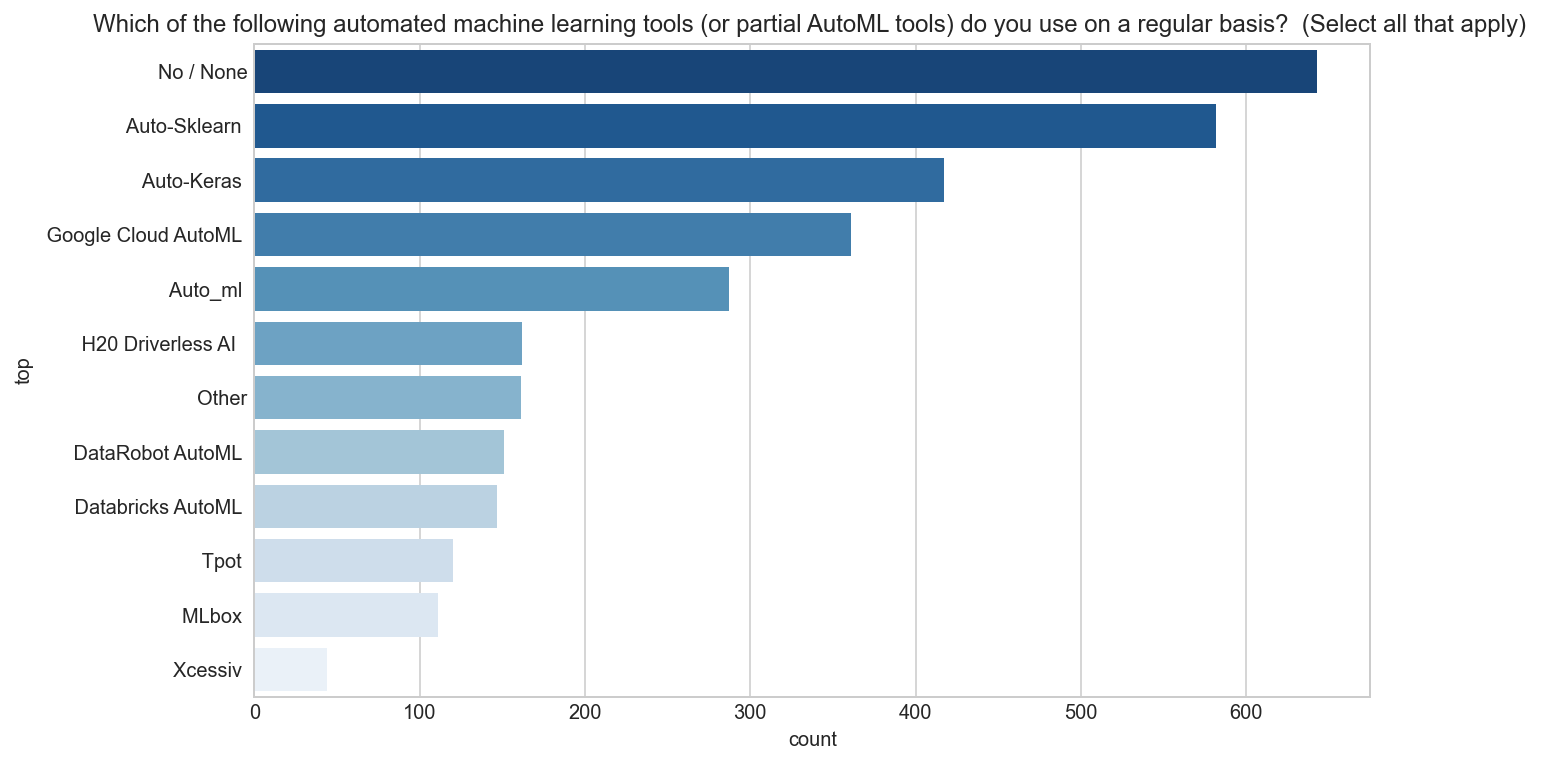

In [103]:
show_plot_by_qno("Q34_A")

### Q34_B Which specific automated machine learning tools (or partial AutoML tools) do you hope to become more familiar with in the next 2 years?  (Select all that apply)

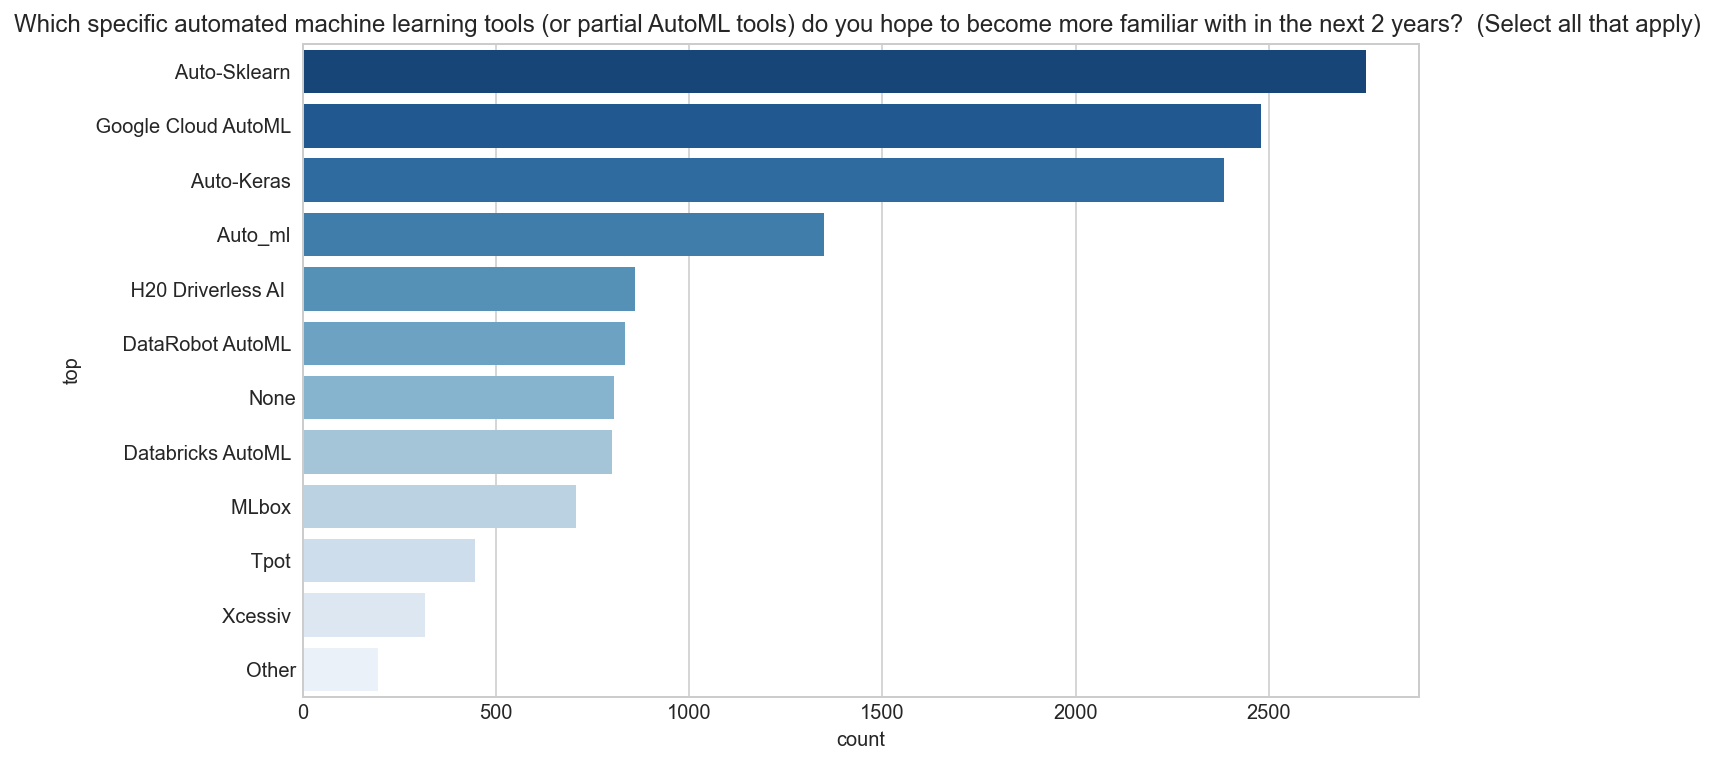

In [104]:
show_plot_by_qno("Q34_B")

## Q35 Do you use any tools to help manage machine learning experiments? (Select all that apply)

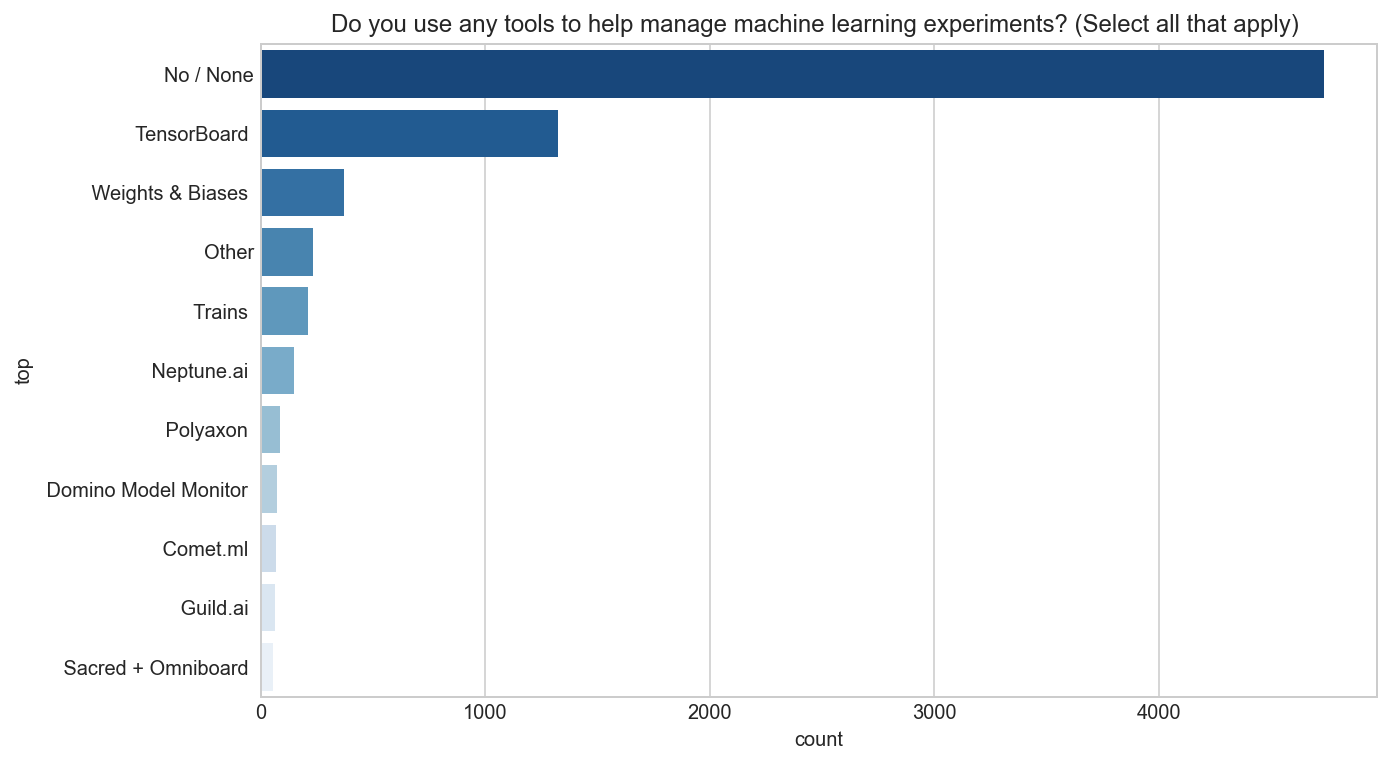

In [110]:
show_plot_by_qno("Q35_A")

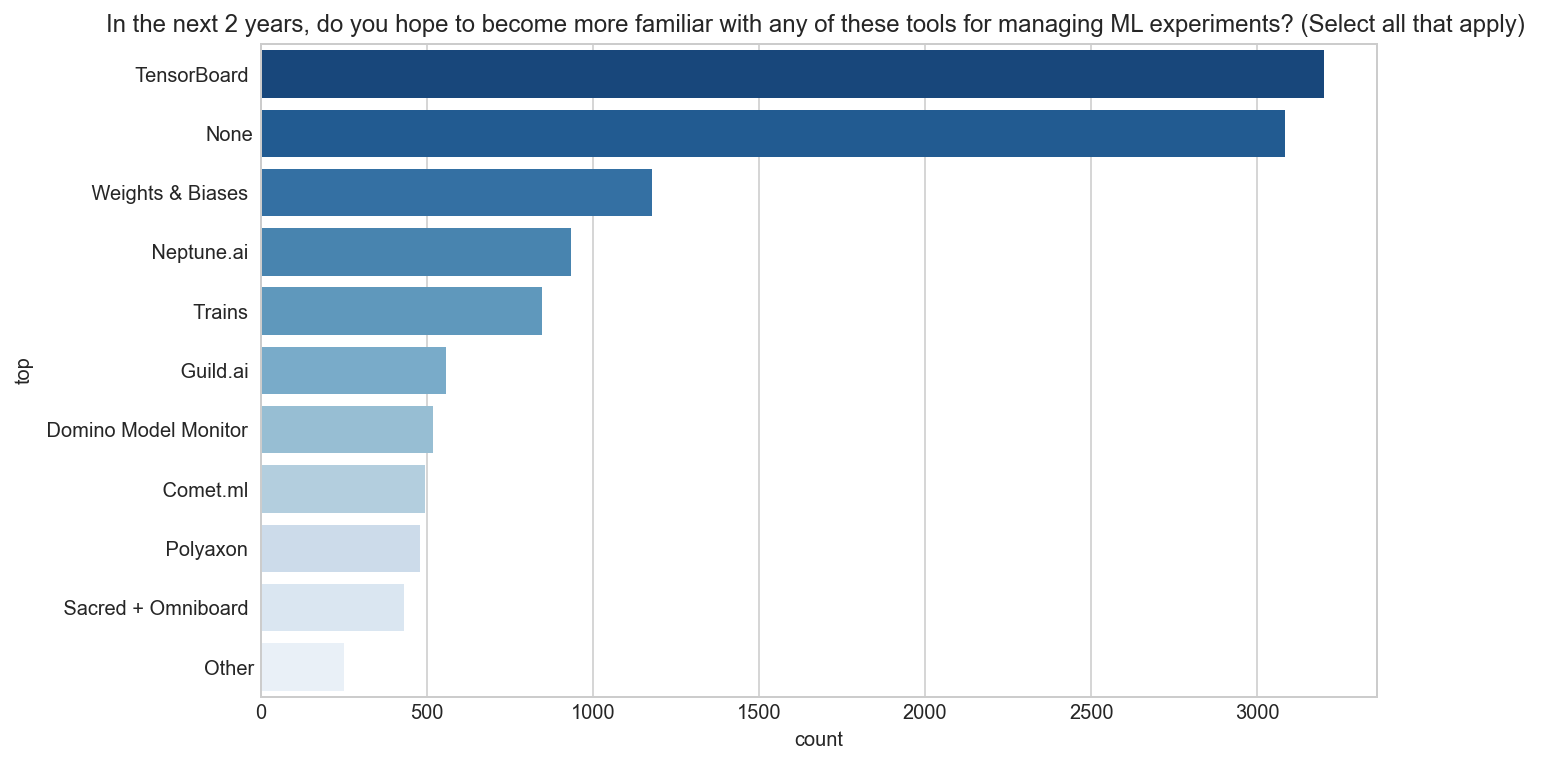

In [111]:
show_plot_by_qno("Q35_B")

## Q36 Where do you publicly share or deploy your data analysis or machine learning applications? (Select all that apply)

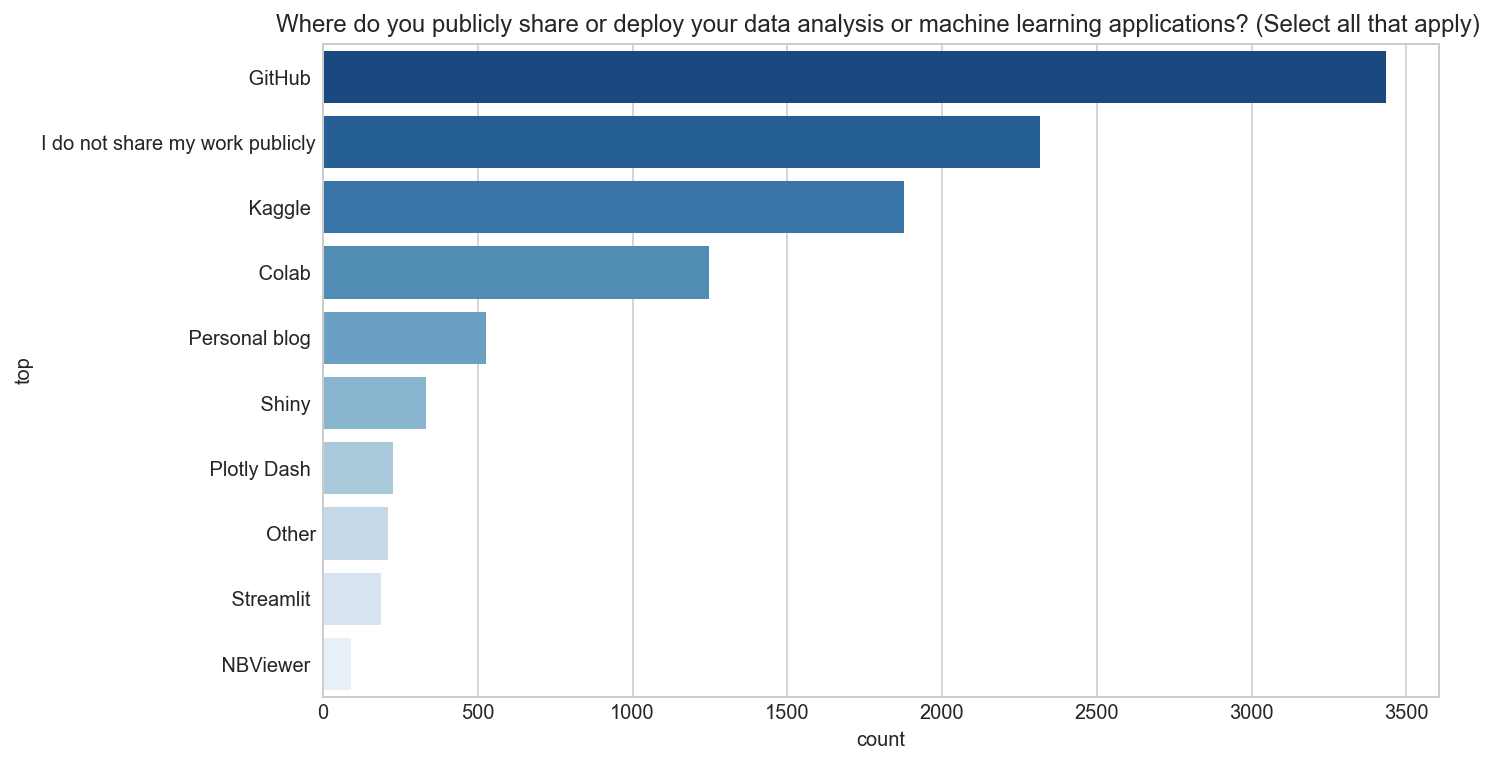

In [106]:
show_plot_by_qno("Q36")

## Q37 On which platforms have you begun or completed data science courses? (Select all that apply)

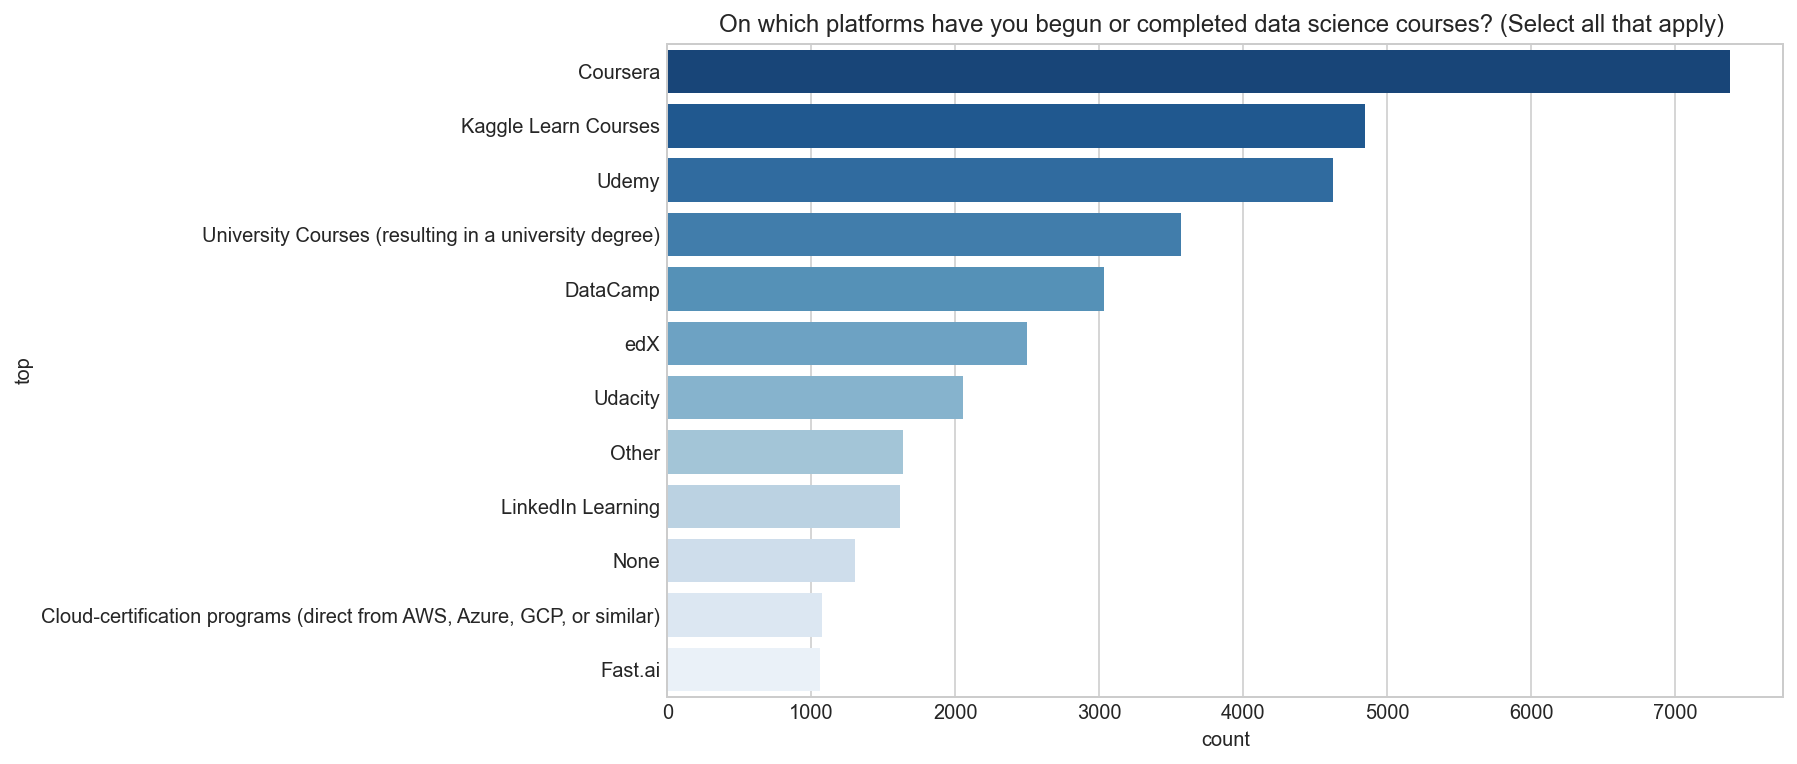

In [107]:
show_plot_by_qno("Q37")

## Q38 What is the primary tool that you use at work or school to analyze data? (Include text response) - Selected Choice

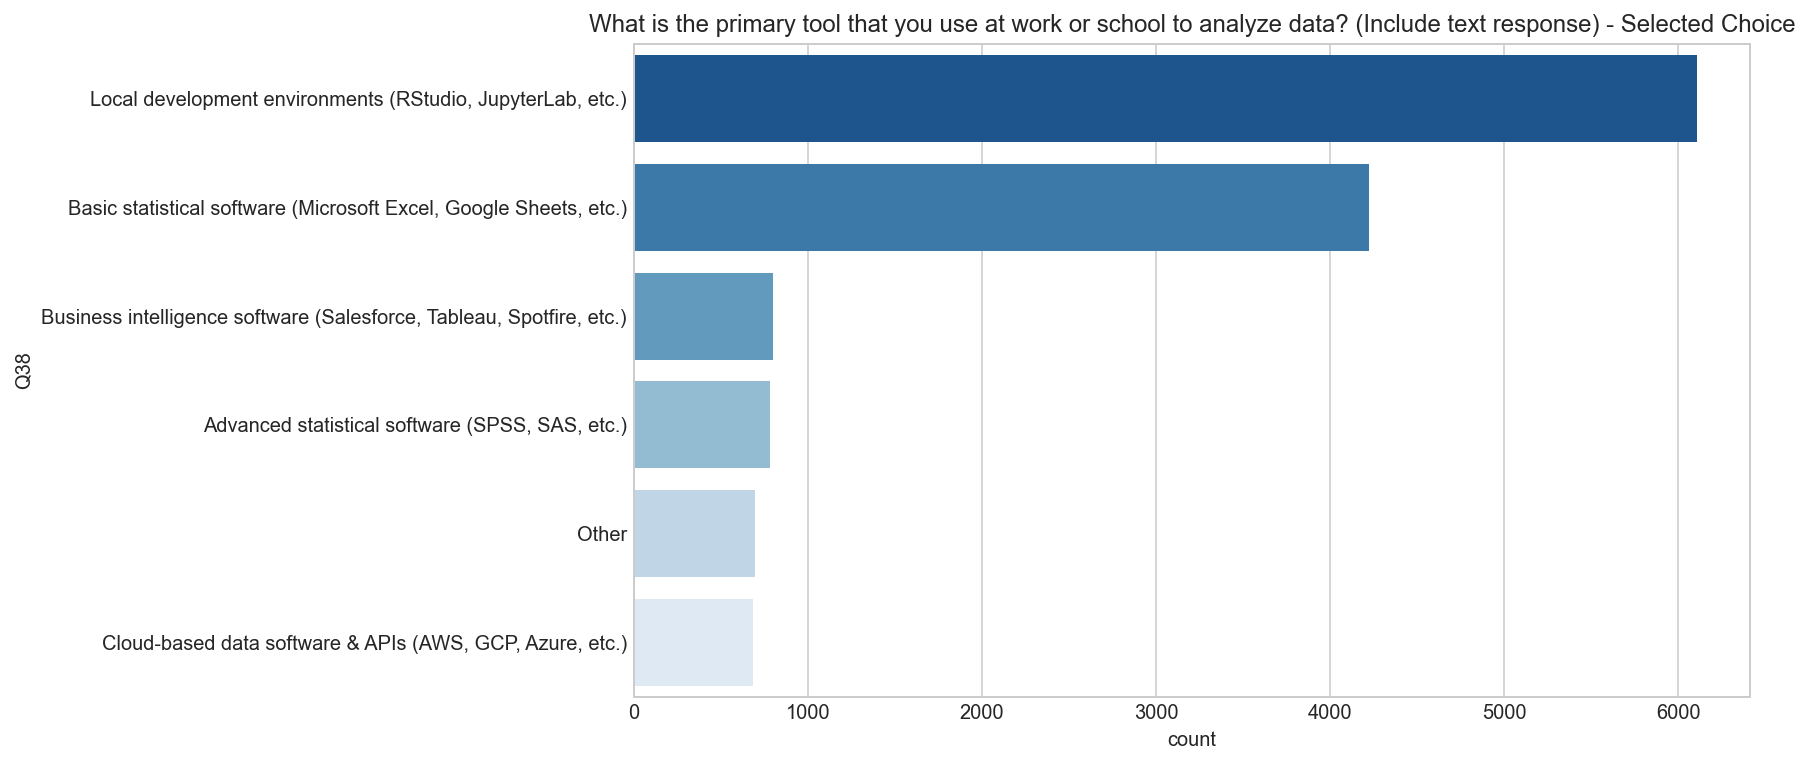

In [108]:
show_plot_by_qno("Q38")

## Q39 Who/what are your favorite media sources that report on data science topics? (Select all that apply) 

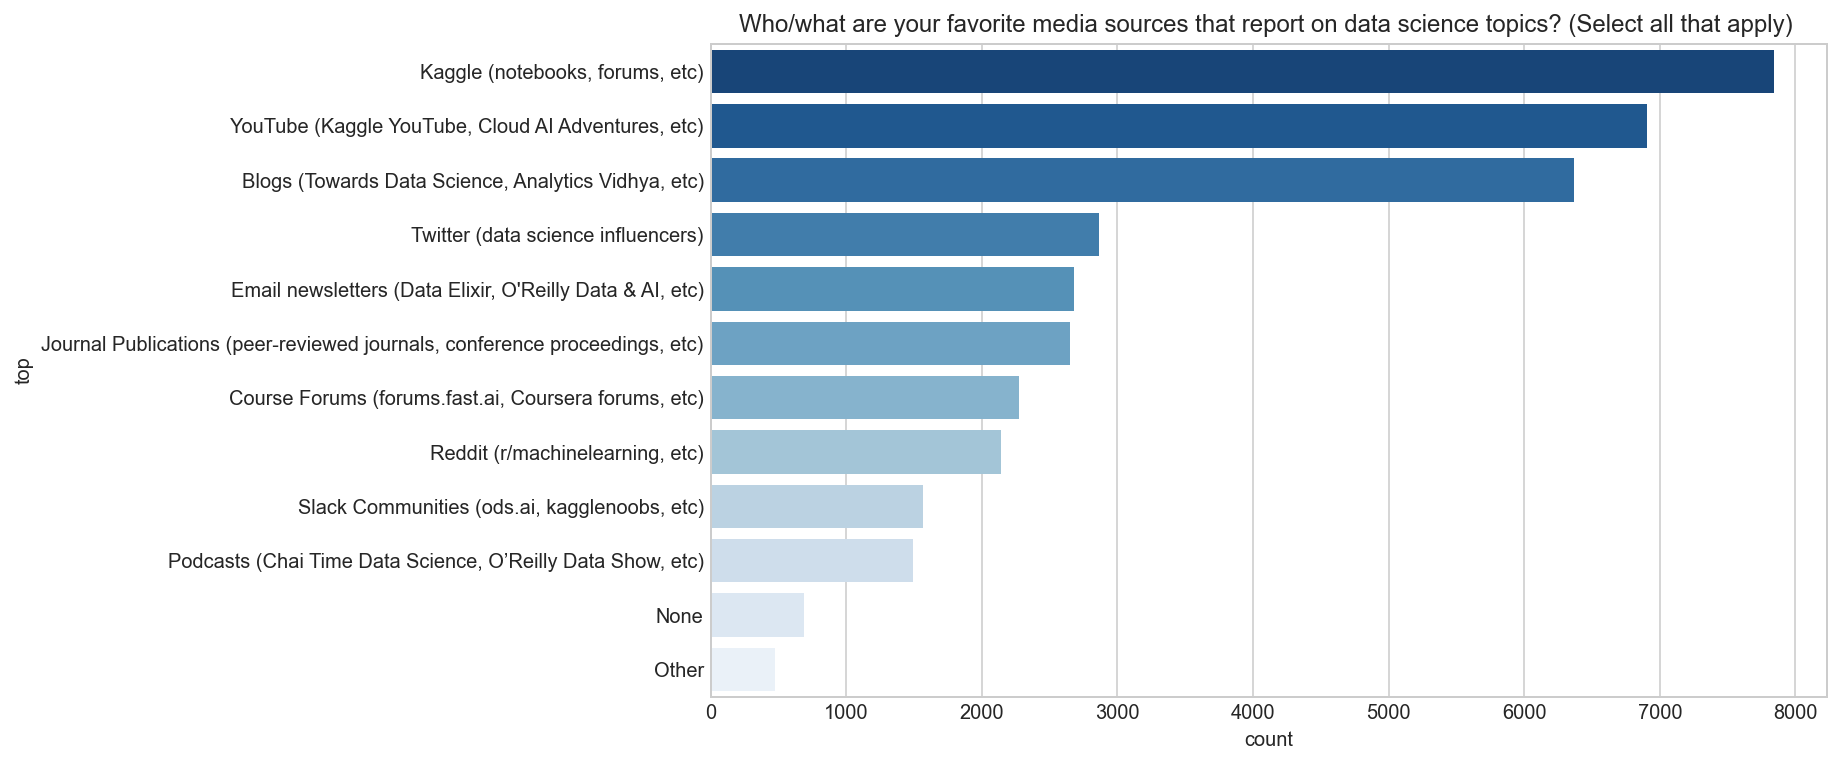

In [109]:
show_plot_by_qno("Q39")